In [1]:
# importing tool functions
import numpy as np
import matplotlib.pyplot as plt
from tools import utils, ml_tools
import pandas as pd
import numpy as np

In [2]:
# machine learning imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils

In [3]:
# graphing tools
import seaborn as sns
from scipy.stats import sem
import matplotlib
import scienceplots

plt.style.use(['science', 'ieee','no-latex'])
matplotlib.rc('font', family='times new roman')

# time
import time 

In [4]:
from NN_tools import NN_data, NN_optimised_parameters, NN_default_parameters, NN_data_iteration, one_hot_enc_labels_bow, one_hot_enc_labels_tf

# Year 1 & 2 Data

### 1. Import the year 1 & 2 Data

In [5]:
dir_name_e = r'C:\Users\EfiaA\OneDrive - Imperial College London\Imperial academic work\University life\Y4\MSci project\Project_Coding\nlp-physicseducation\Pickledfiles'

In [6]:
# import the yr2 labels
dir_csv3 = 'outputs/labels_cleaned_y1y2.csv'
df3 = pd.read_csv(dir_csv3, encoding='utf-8')

### 1.1 Apply TF-IDF on year 1 & 2 Data

In [7]:
# Epistemology (Reasoning Level)

# X_data -> Content of Lab report
X_y1y2_tf_rl             = np.array(ml_tools.tf_idf(df3['Content'].tolist()), dtype = object) # object
X_y1y2_tf_rl               = X_y1y2_tf_rl [1]
print(X_y1y2_tf_rl.shape)

# y_data ->  Epistemology label 
df_y =np.array(df3['ReasoningLevel'].tolist(), dtype=object)
lb   = LabelBinarizer()
lb.fit(df_y)
y_y1y2_tf_rl = lb.transform(df_y)
#y_y1y2_tf_rl = one_hot_enc_labels_tf(df3, 'ReasoningLevel')



(178, 7563)


In [8]:
# Argument Level

# X_data -> same as above
X_y1y2_tf_al               = X_y1y2_tf_rl
print(X_y1y2_tf_al.shape)

# y_data -> argument level
y_y1y2_tf_al= one_hot_enc_labels_tf(df3, 'ArgumentLevel')



(178, 7563)


### 1.2 Apply BOW on year 1 & 2 Data

In [9]:
# Epistemology (Reasoning Level)

# X_data -> Content of Lab report 
wordvec_names, X_y1y2_bow_rl = ml_tools.BoW(df3['Content'].tolist())

# y_data -> Epistemology label 
y_y1y2_bow_rl = one_hot_enc_labels_tf(df3, 'ReasoningLevel')

In [10]:
# Argument Level

# X_data -> Content of Lab report 
X_y1y2_bow_al       = X_y1y2_bow_rl

# y_data -> Argument level labels 
y_y1y2_bow_al = one_hot_enc_labels_bow(df3, 'ArgumentLevel')

# Neural Network Functions

### 2.1 Epistomology - TFIDF

In [11]:
# train and split the data
# Choose a 0.7 train size
# 5000
# X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_y1y2_tf_rl, y_y1y2_tf_rl , train_size = 0.7)
# input = X_train_t.shape[1]
# print(input)


ephs = 2 #no of epochs 
train_sizes = [0.5,0.6,0.7,0.8,0.9] 
time_array =[]
# str_dataname,str_featext, str_year, dir
from time import time

start = time() # start time

# train nn for: Epistemology (reasoning level) data - bow - y1y2
trial_data_tf_rl = NN_data(NN_optimised_parameters,X_y1y2_tf_rl, y_y1y2_tf_rl,train_sizes,ephs, 'EPISTEMOLOGY', 'TFIDF', 'y1y2', dir_name_e )
print('Time- NN_bow_rl_y1y2:', (time() - start)/60, 's') 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                90768     
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
 flatten (Flatten)           (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
3/3 [==============================] - 1s 103ms/step - loss: 0.6810 - accuracy: 0.6152 - val_loss: 0.6606 - val_accuracy: 0.7500
Epoch 2/2
3/3 [==============================

In [12]:
df_unpic = utils.load_pickle_file_to_df('W5_NN_5_iteration_y1y2_TFIDF_EPISTEMOLOGY_2', dir_name_e)
print(df_unpic)

   trainsize  accuracy       sem      loss   valloss
0        0.5  0.674719  0.037640  0.687528  0.687528
1        0.6  0.710944  0.019528  0.682493  0.682493
2        0.7  0.709447  0.020277  0.682289  0.682289
3        0.8  0.713071  0.018464  0.682081  0.682081
4        0.9  0.717207  0.016397  0.679447  0.679447


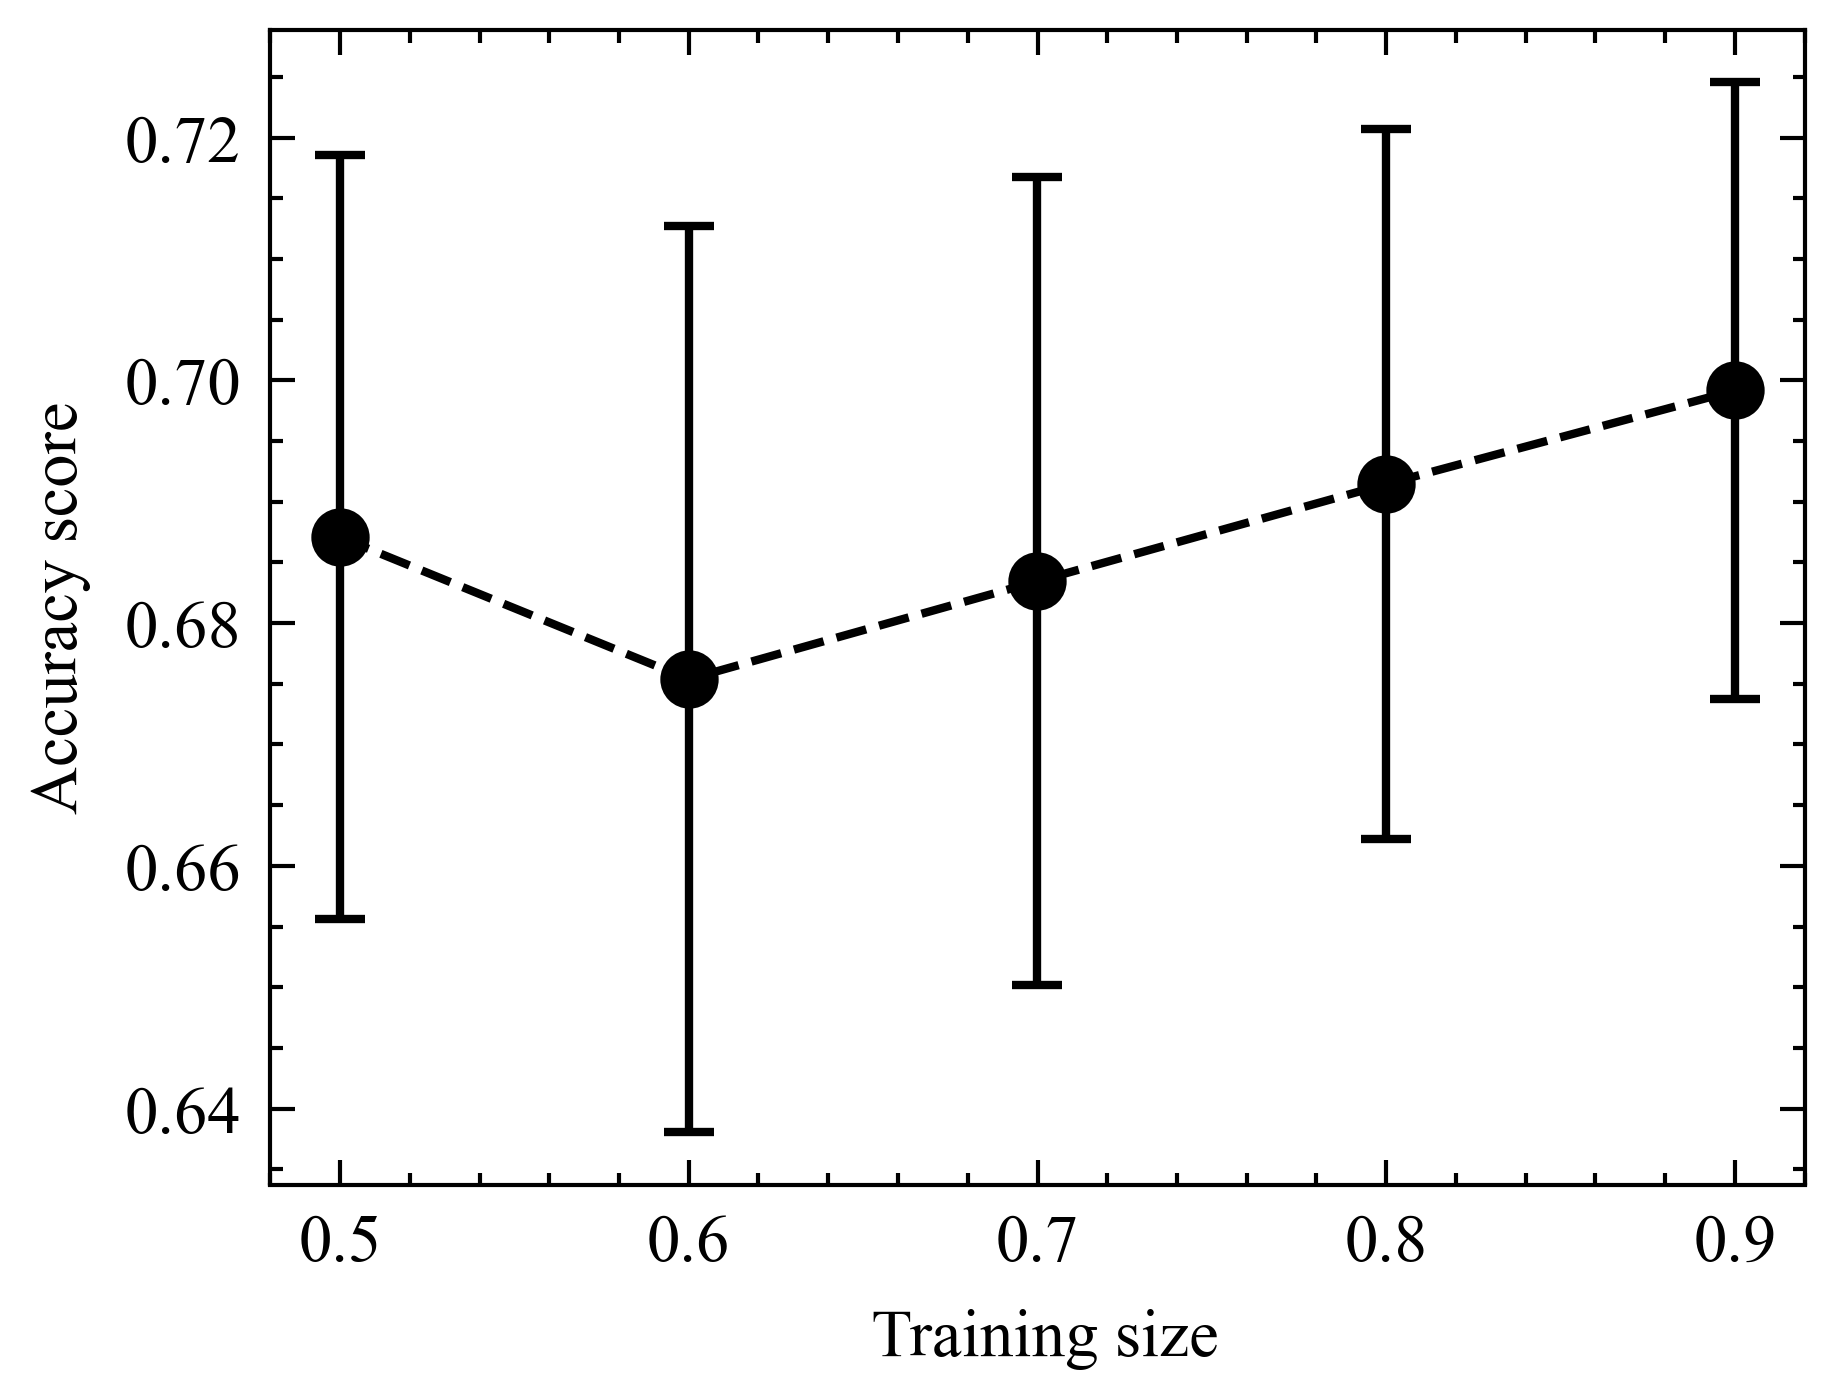

In [64]:

plot(df_unpic['trainsize'], df_unpic['accuracy'], df_unpic['sem'])

In [26]:
# Training the neural network

ephs = 20 #no of epochs 
train_sizes = [0.5,0.6,0.7,0.8,0.9] 

# str_dataname,str_featext, str_year, dir
from time import time

start = time() # start time

# train nn for: Epistemology (reasoning level) data - bow - y1y2
Epist_data_tf_rl = NN_data(NN_optimised_parameters,X_y1y2_tf_rl, y_y1y2_tf_rl,train_sizes,ephs, 'EPISTEMOLOGY', 'TFIDF', 'y1y2', dir_name_e )
print('Time- NN_bow_rl_y1y2:', time() - start) 


TypeError: Dimension value must be integer or None or have an __index__ method, got value '<bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x0000018F890700A0>>' with type '<class 'method'>'

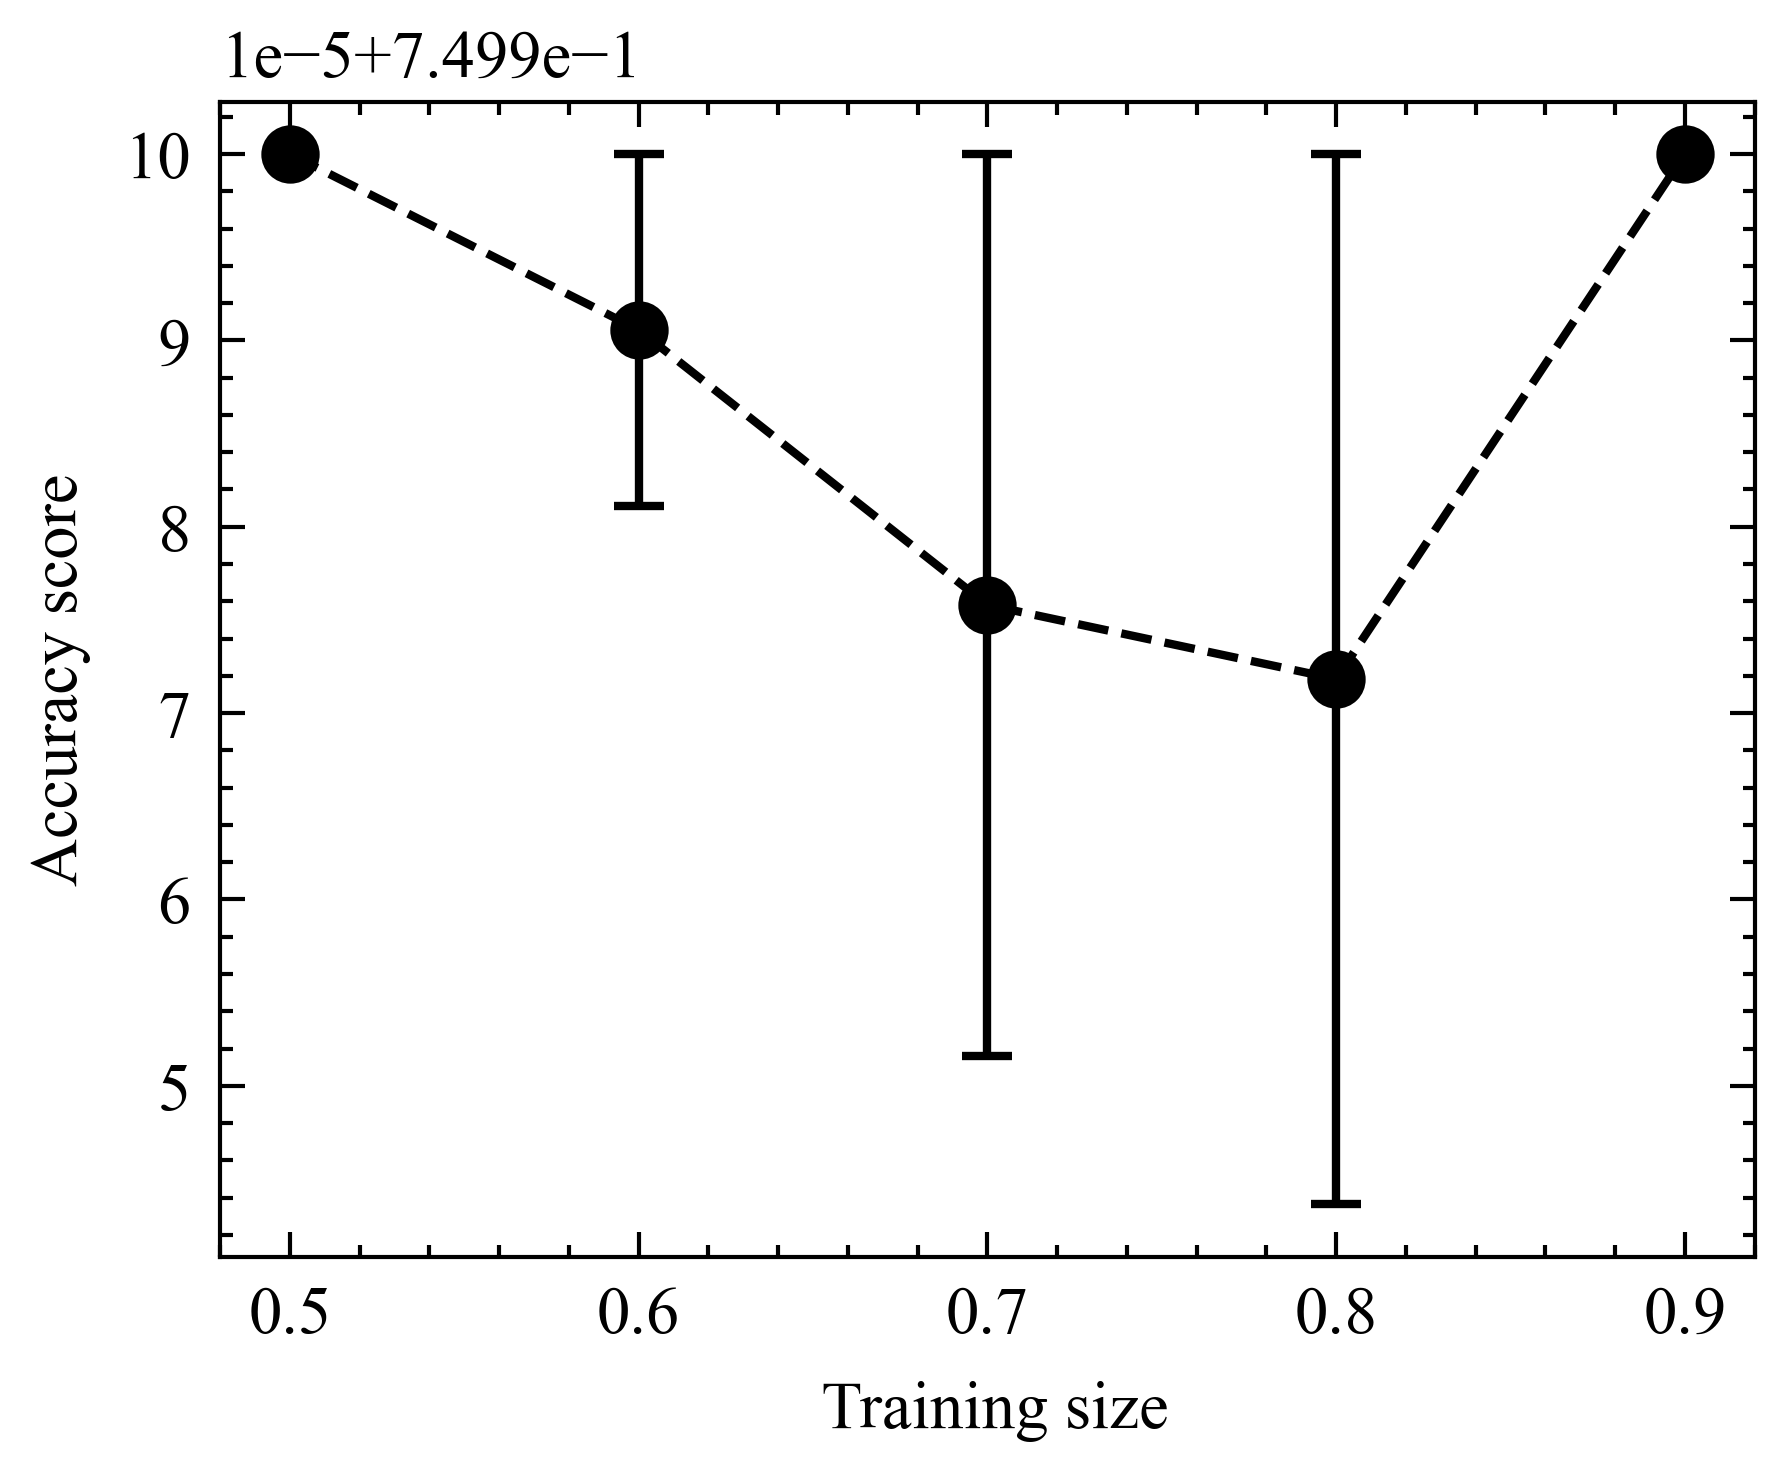

In [ ]:

df_unpic_epist_tf_rl = utils.load_pickle_file_to_df('NN_y1y2_TFIDF_EPISTEMOLOGY_1000ephs_recent', dir_name_e)
plot(df_unpic_epist_tf_rl['trainsize'], df_unpic_epist_tf_rl['accuracy'], df_unpic_epist_tf_rl['sem'])

### 2.2 Epistomology - BOW

In [13]:
# str_dataname,str_featext, str_year, dir
from time import time

start = time() # start time

# train nn for: Epistemology (reasoning level) data - bow - y1y2
Epist_data_bow_rl = NN_data(NN_optimised_parameters,X_y1y2_bow_rl, y_y1y2_bow_rl,train_sizes,ephs, 'EPISTEMOLOGY', 'BOW', 'y1y2', dir_name_e)
print('Time- NN_bow_rl_y1y2:', time() - start) 

TypeError: Dimension value must be integer or None or have an __index__ method, got value '<bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x0000024B2F2300A0>>' with type '<class 'method'>'

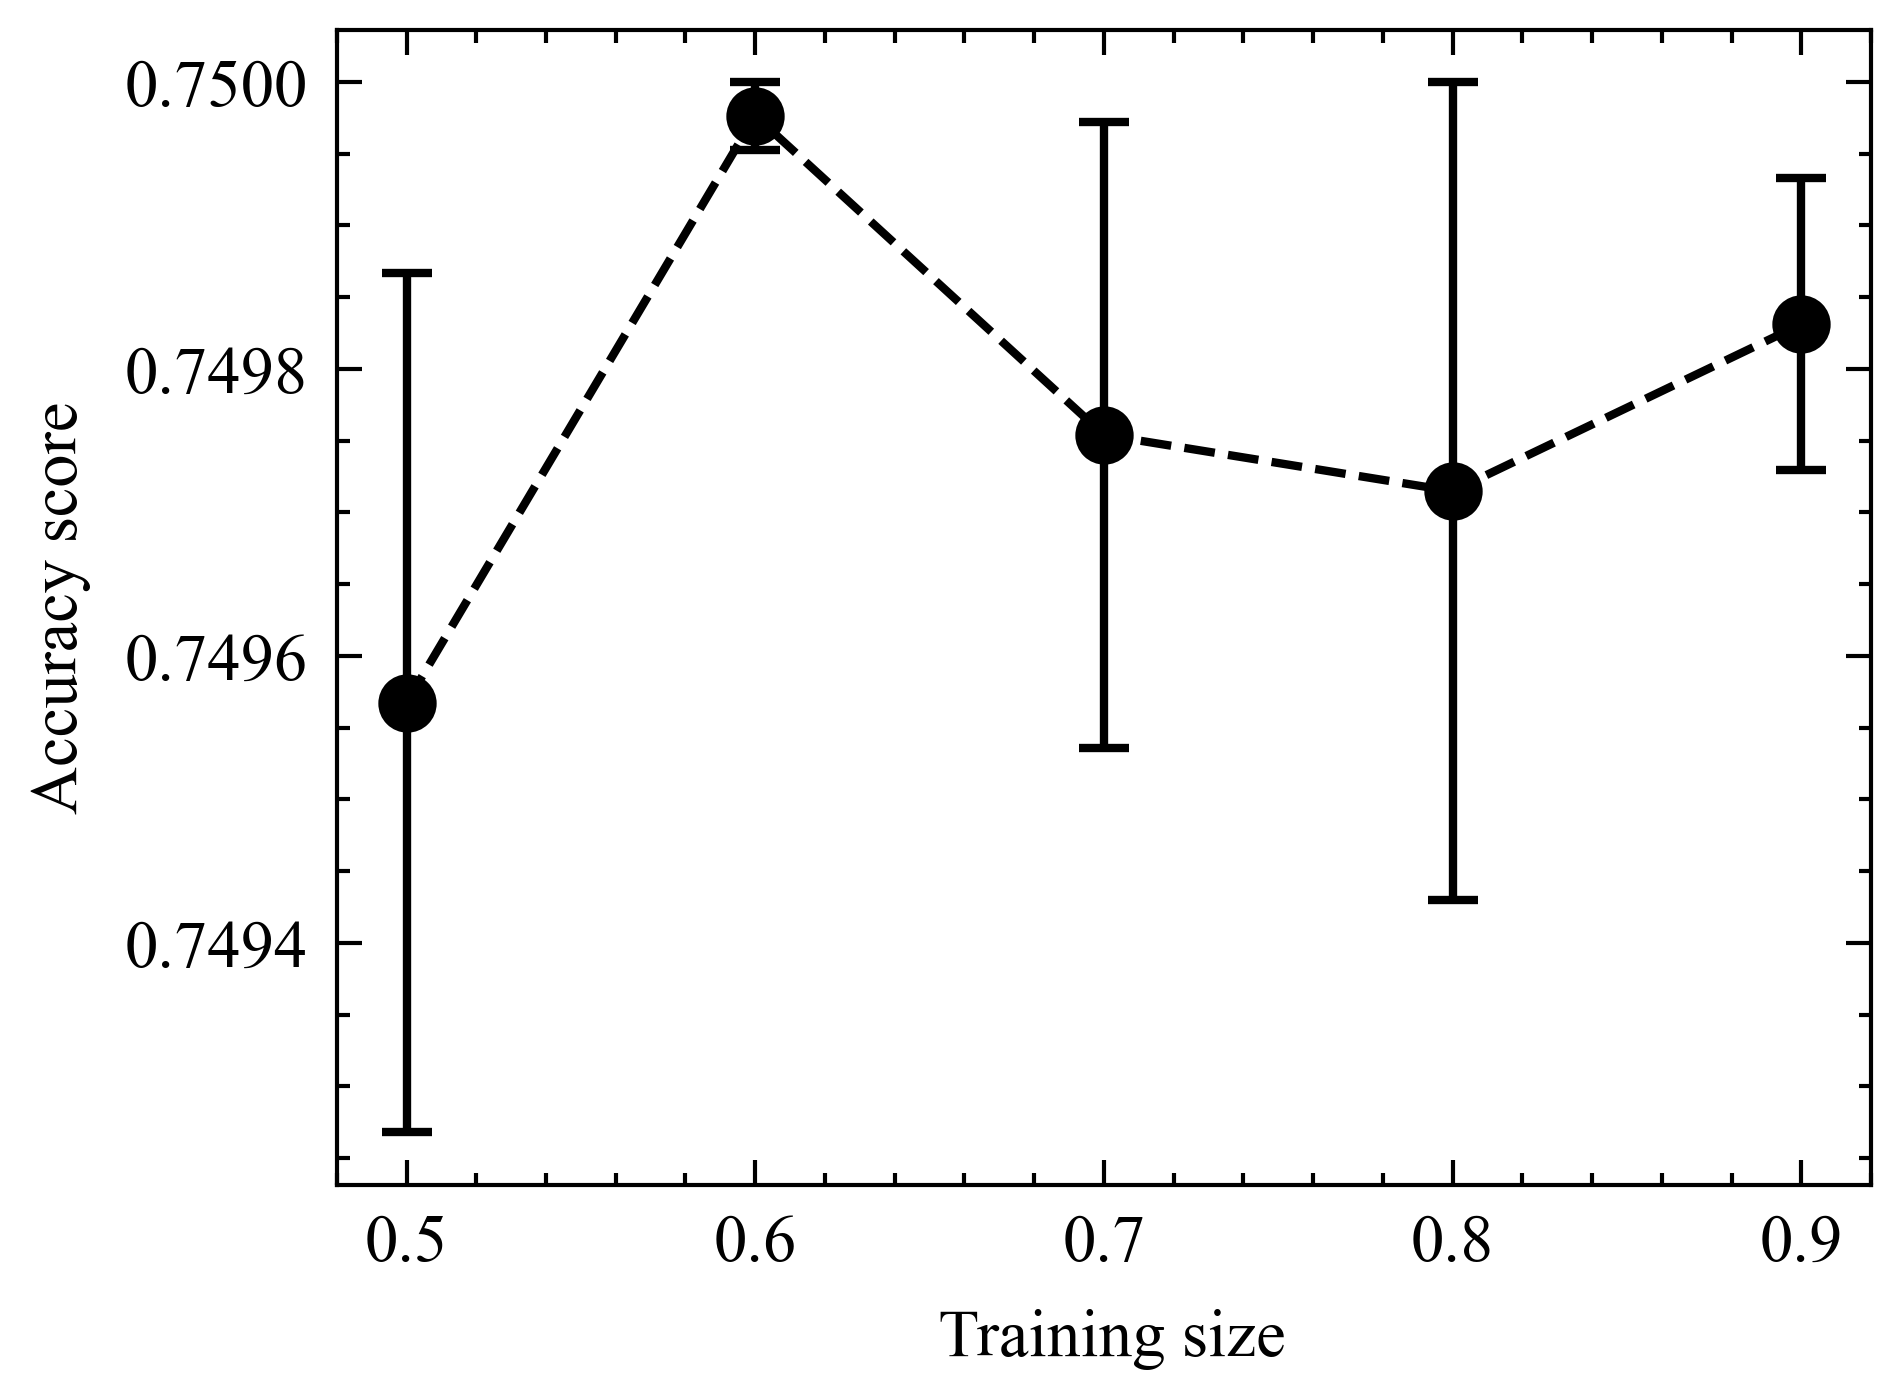

In [ ]:
df_unpic_epist_bow_rl = utils.load_pickle_file_to_df('NN_y1y2_BOW_EPISTEMOLOGY_1000ephs_recent', dir_name_e)
plot(df_unpic_epist_bow_rl['trainsize'], df_unpic_epist_bow_rl['accuracy'], df_unpic_epist_bow_rl['sem'])

### 2.3 Argument Level - TFIDF

In [71]:
# str_dataname,str_featext, str_year, dir
from time import time

start = time() # start time
Arg_data_tfidf = NN_data(X_y1y2_tf_al, y_y1y2_tf_al, train_sizes, ephs, 'ARGUMENTLEVEL', 'TFIDF', 'y1y2', dir_name_e)
print('Time- NN_bow_rl_y1y2:', time() - start) 


NameError: name 'train_sizes' is not defined

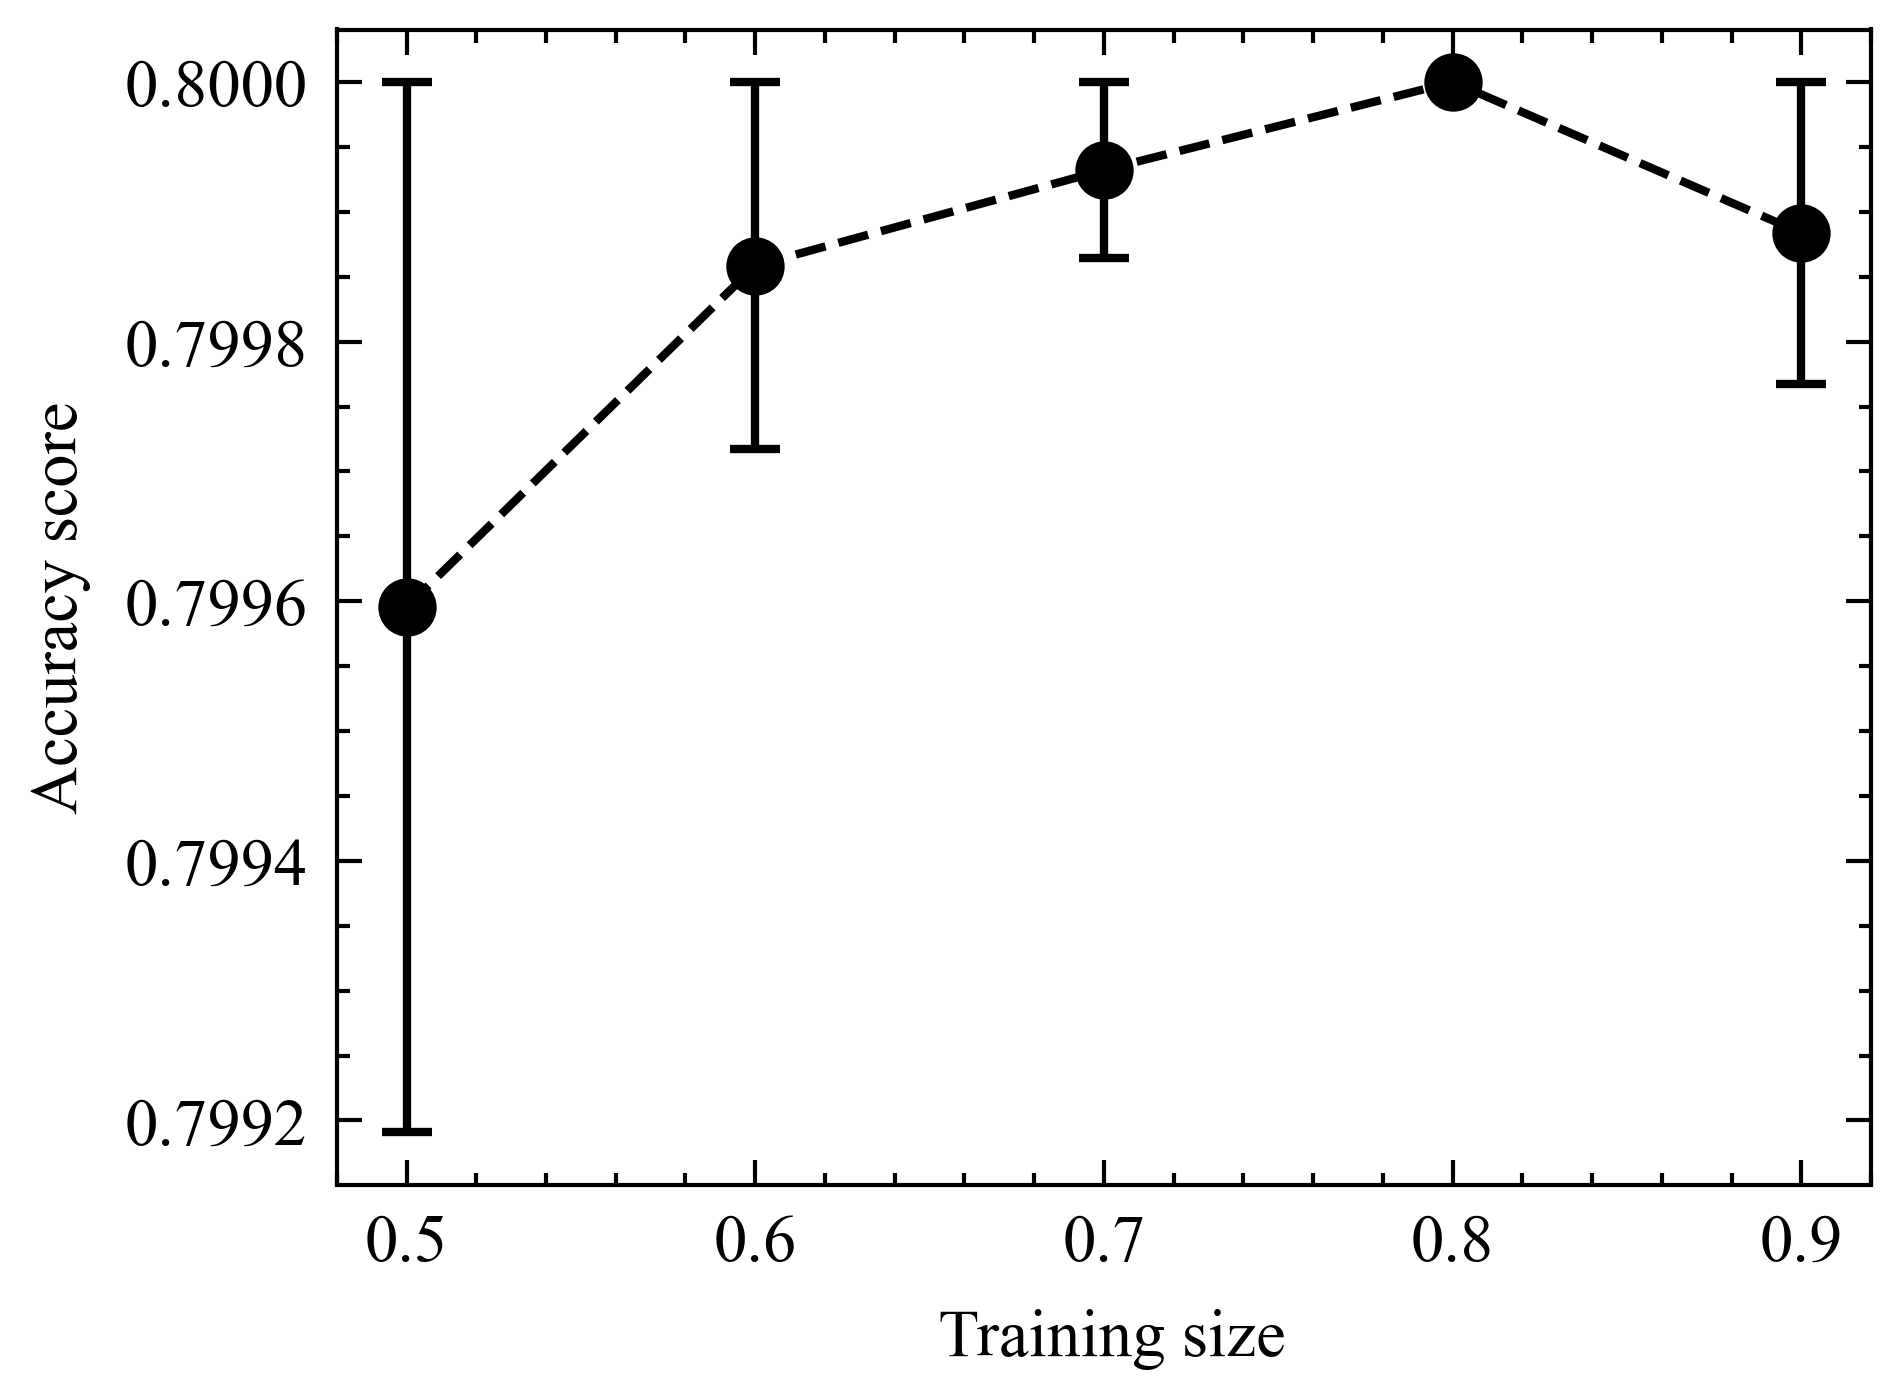

In [ ]:
df_unpic_arg_tfidf_al = utils.load_pickle_file_to_df('NN_y1y2_TFIDF_ARGUMENTLEVEL_1000ephs_recent', dir_name_e)
plot(df_unpic_arg_tfidf_al['trainsize'], df_unpic_arg_tfidf_al['accuracy'],df_unpic_arg_tfidf_al['sem'])

### 2.4 Argument Level - BOW

In [ ]:
# str_dataname,str_featext, str_year, dir
from time import time

start = time() # start time
Arg_data_bow = NN_data(X_y1y2_bow_al, y_y1y2_bow_al,train_sizes, ephs, 'ARGUMENTLEVEL', 'BOW', 'y1y2', dir_name_e)
print('Time- NN_tf_al_y1y2:', time() - start) 

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 12)                90768     
                                                                 
 dense_155 (Dense)           (None, 8)                 104       
                                                                 
 dense_156 (Dense)           (None, 1)                 9         
                                                                 
 flatten_52 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 1s 164ms/step - loss: 0.6343 - accuracy: 0.7596 - val_loss: 0.5926 - val_accuracy: 0.8000
Epoch 2/1000
3/3 [=====================

KeyboardInterrupt: 

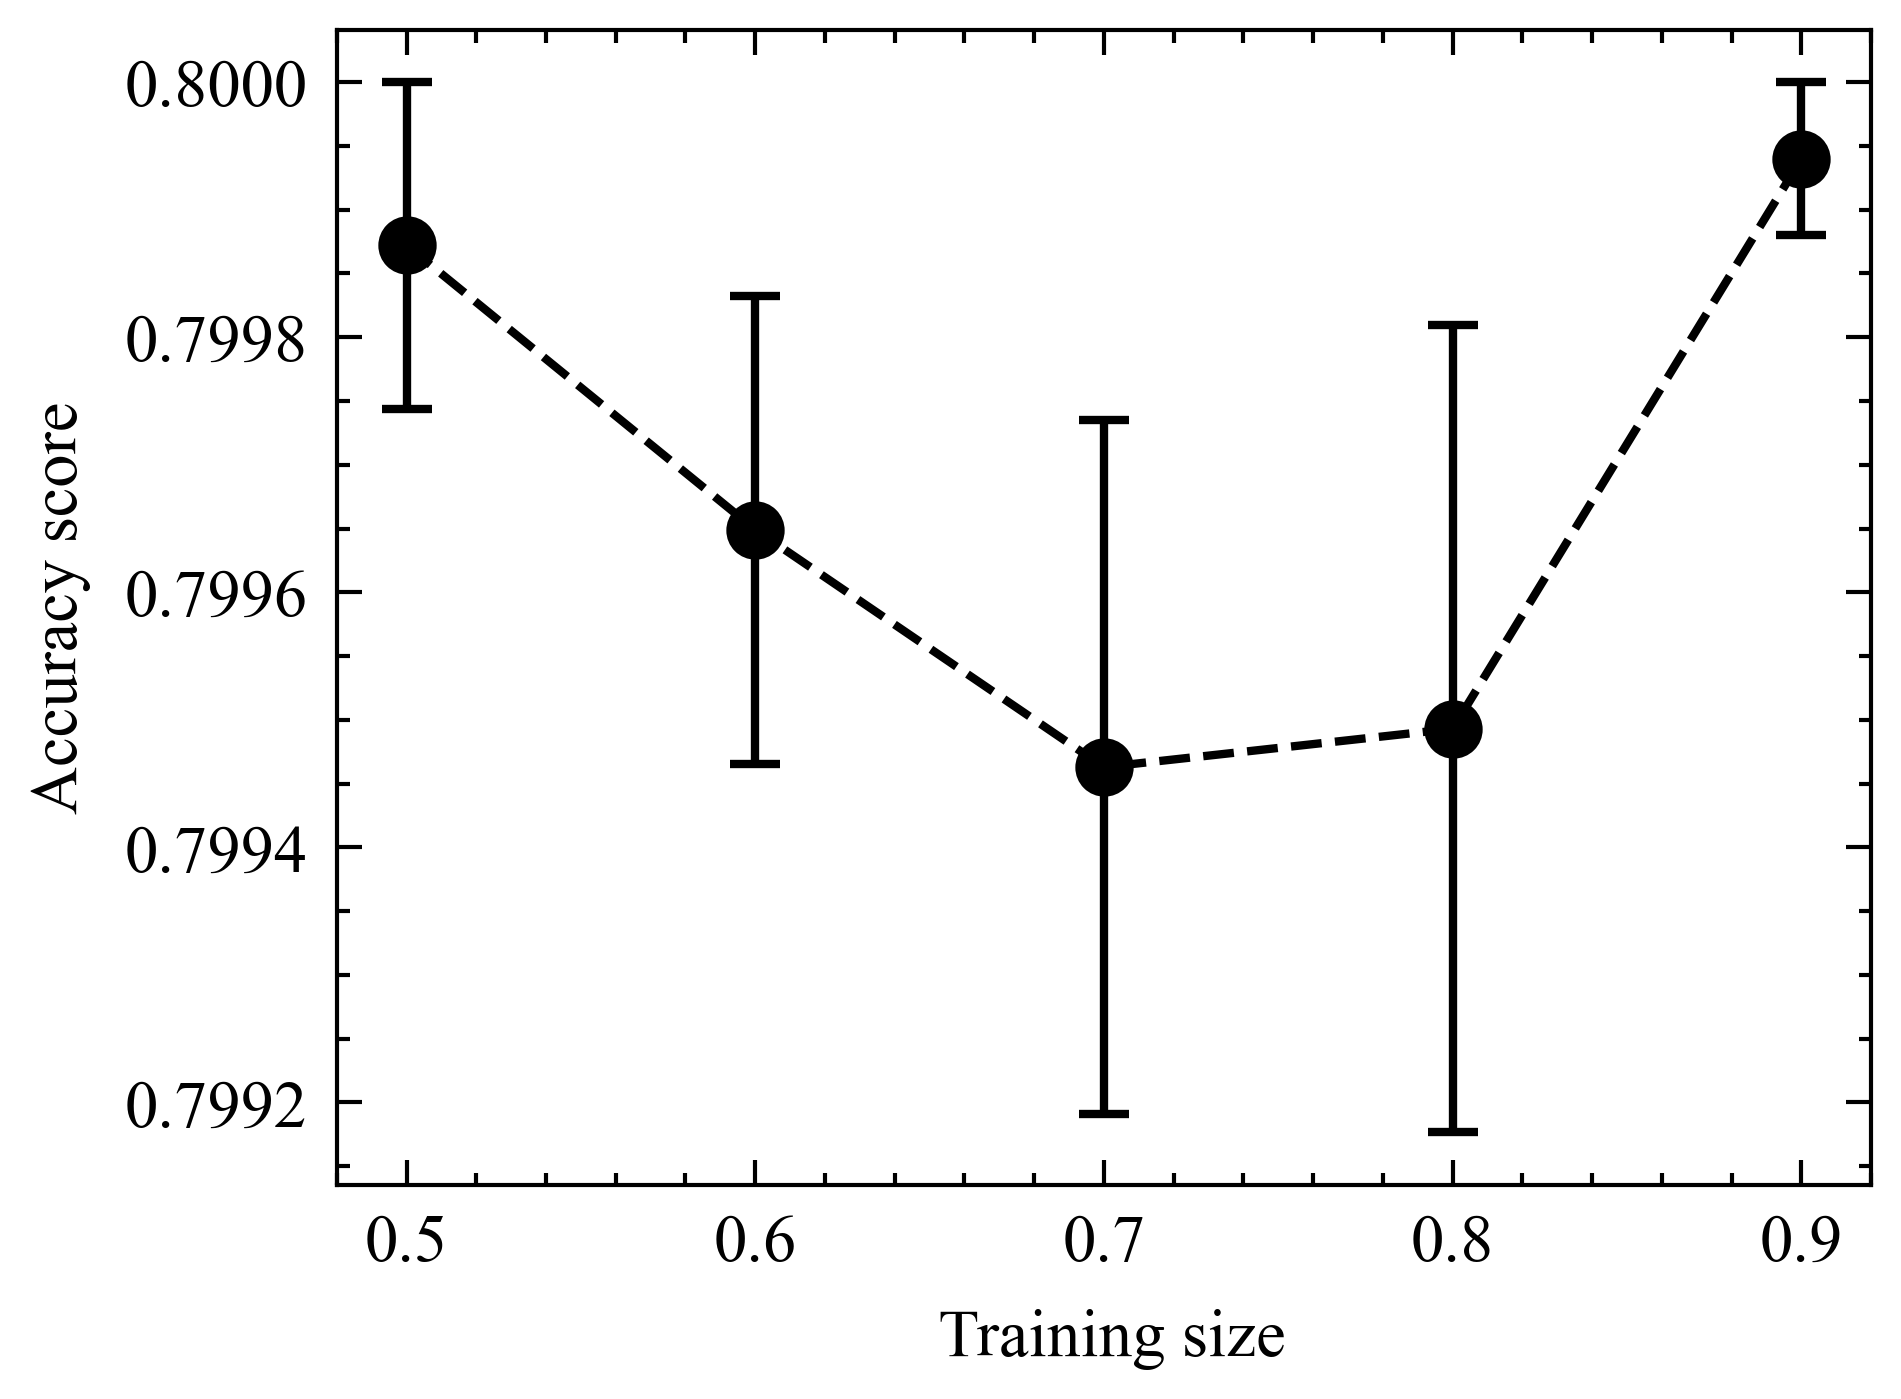

In [ ]:
df_unpic_arg_bow_rl = utils.load_pickle_file_to_df('NN_y1y2_BOW_ARGUMENTLEVEL_1000ephs_recent', dir_name_e)
plot(df_unpic_arg_bow_rl['trainsize'], df_unpic_arg_bow_rl['accuracy'], df_unpic_arg_bow_rl['sem'])

# All Y1 & Y2 Feature Extracted Data

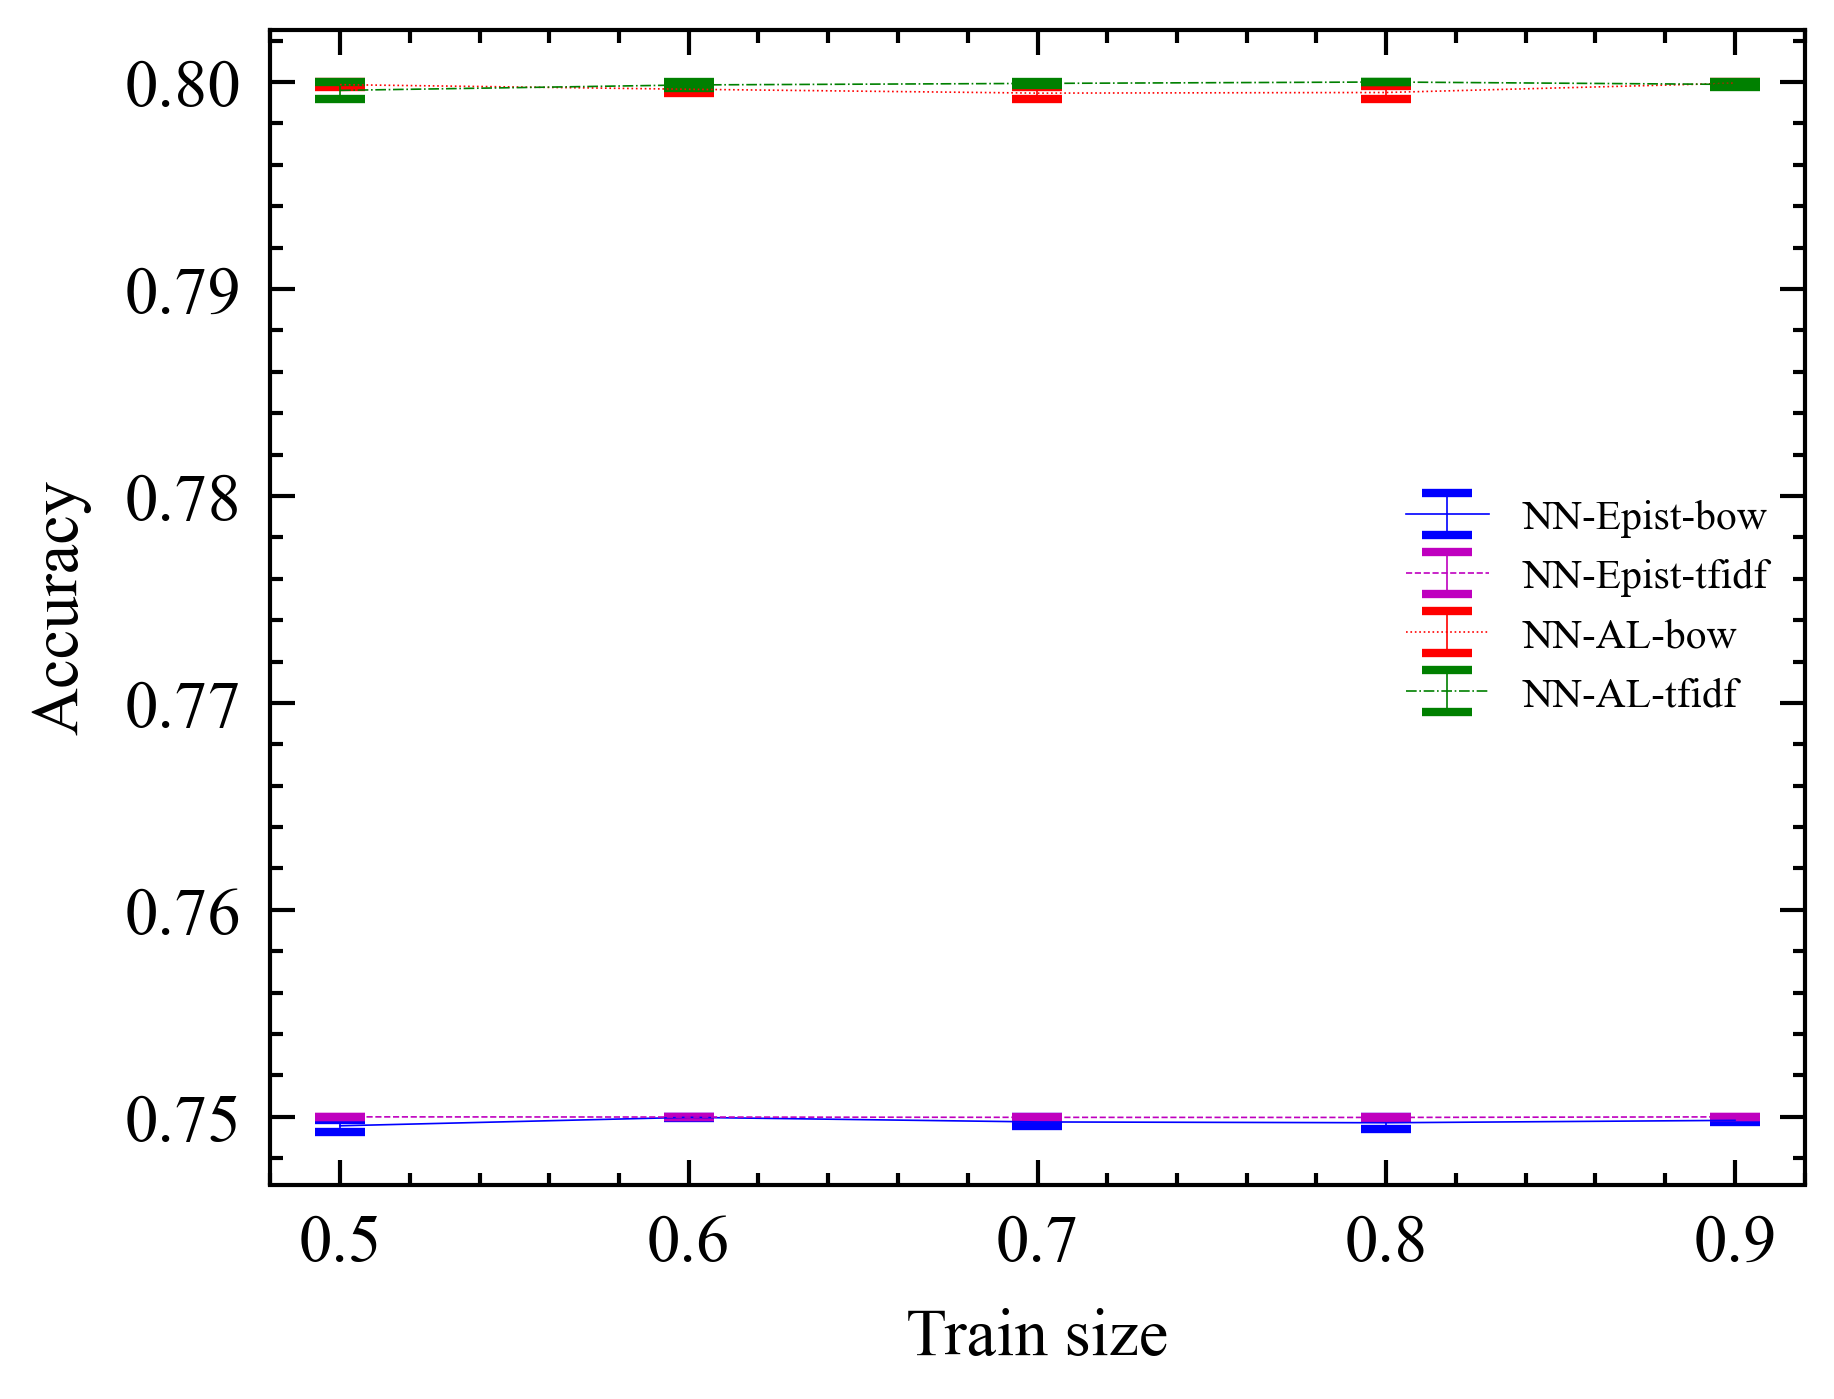

In [ ]:
#plt.plot(df_unpic_epist_bow_rl['trainsize'], df_unpic_epist_bow_rl['accuracy'], label = 'NN-Epist-bow', c ='m')
plt.errorbar(df_unpic_epist_bow_rl['trainsize'], df_unpic_epist_bow_rl['accuracy'], yerr = df_unpic_epist_bow_rl['sem'],  markersize=0.2, capsize=3, linewidth = 0.2, c = 'b', label = 'NN-Epist-bow')
#plt.plot(df_unpic_epist_tf_rl['trainsize'],df_unpic_epist_tf_rl['accuracy'], label = 'NN-Epist-tfidf', c = 'g')
plt.errorbar(df_unpic_epist_tf_rl['trainsize'], df_unpic_epist_tf_rl['accuracy'], yerr = df_unpic_epist_tf_rl['sem'], markersize=0.2, capsize=3, linewidth = 0.2, c = 'm', label = 'NN-Epist-tfidf')
#plt.plot(df_unpic_arg_bow_rl['trainsize'], df_unpic_arg_bow_rl['accuracy'], label = 'NN-AL-bow', c = 'r')
plt.errorbar(df_unpic_arg_bow_rl['trainsize'], df_unpic_arg_bow_rl['accuracy'], yerr = df_unpic_arg_bow_rl['sem'], markersize=0.2, capsize=3, capthick= 1, linewidth = 0.2, c = 'r', elinewidth= 0.2, label = 'NN-AL-bow')
#plt.plot(df_unpic_arg_tfidf_al['trainsize'], df_unpic_arg_tfidf_al['accuracy'], label = 'NN-AL-tfidf', c = 'b')
plt.errorbar(df_unpic_arg_tfidf_al['trainsize'],df_unpic_arg_tfidf_al['accuracy'], yerr = df_unpic_arg_tfidf_al['sem'], markersize=0.2, capsize=3, capthick = 1, linewidth = 0.2, c = 'g', label = 'NN-AL-tfidf')
plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.legend(prop={'size': 5})

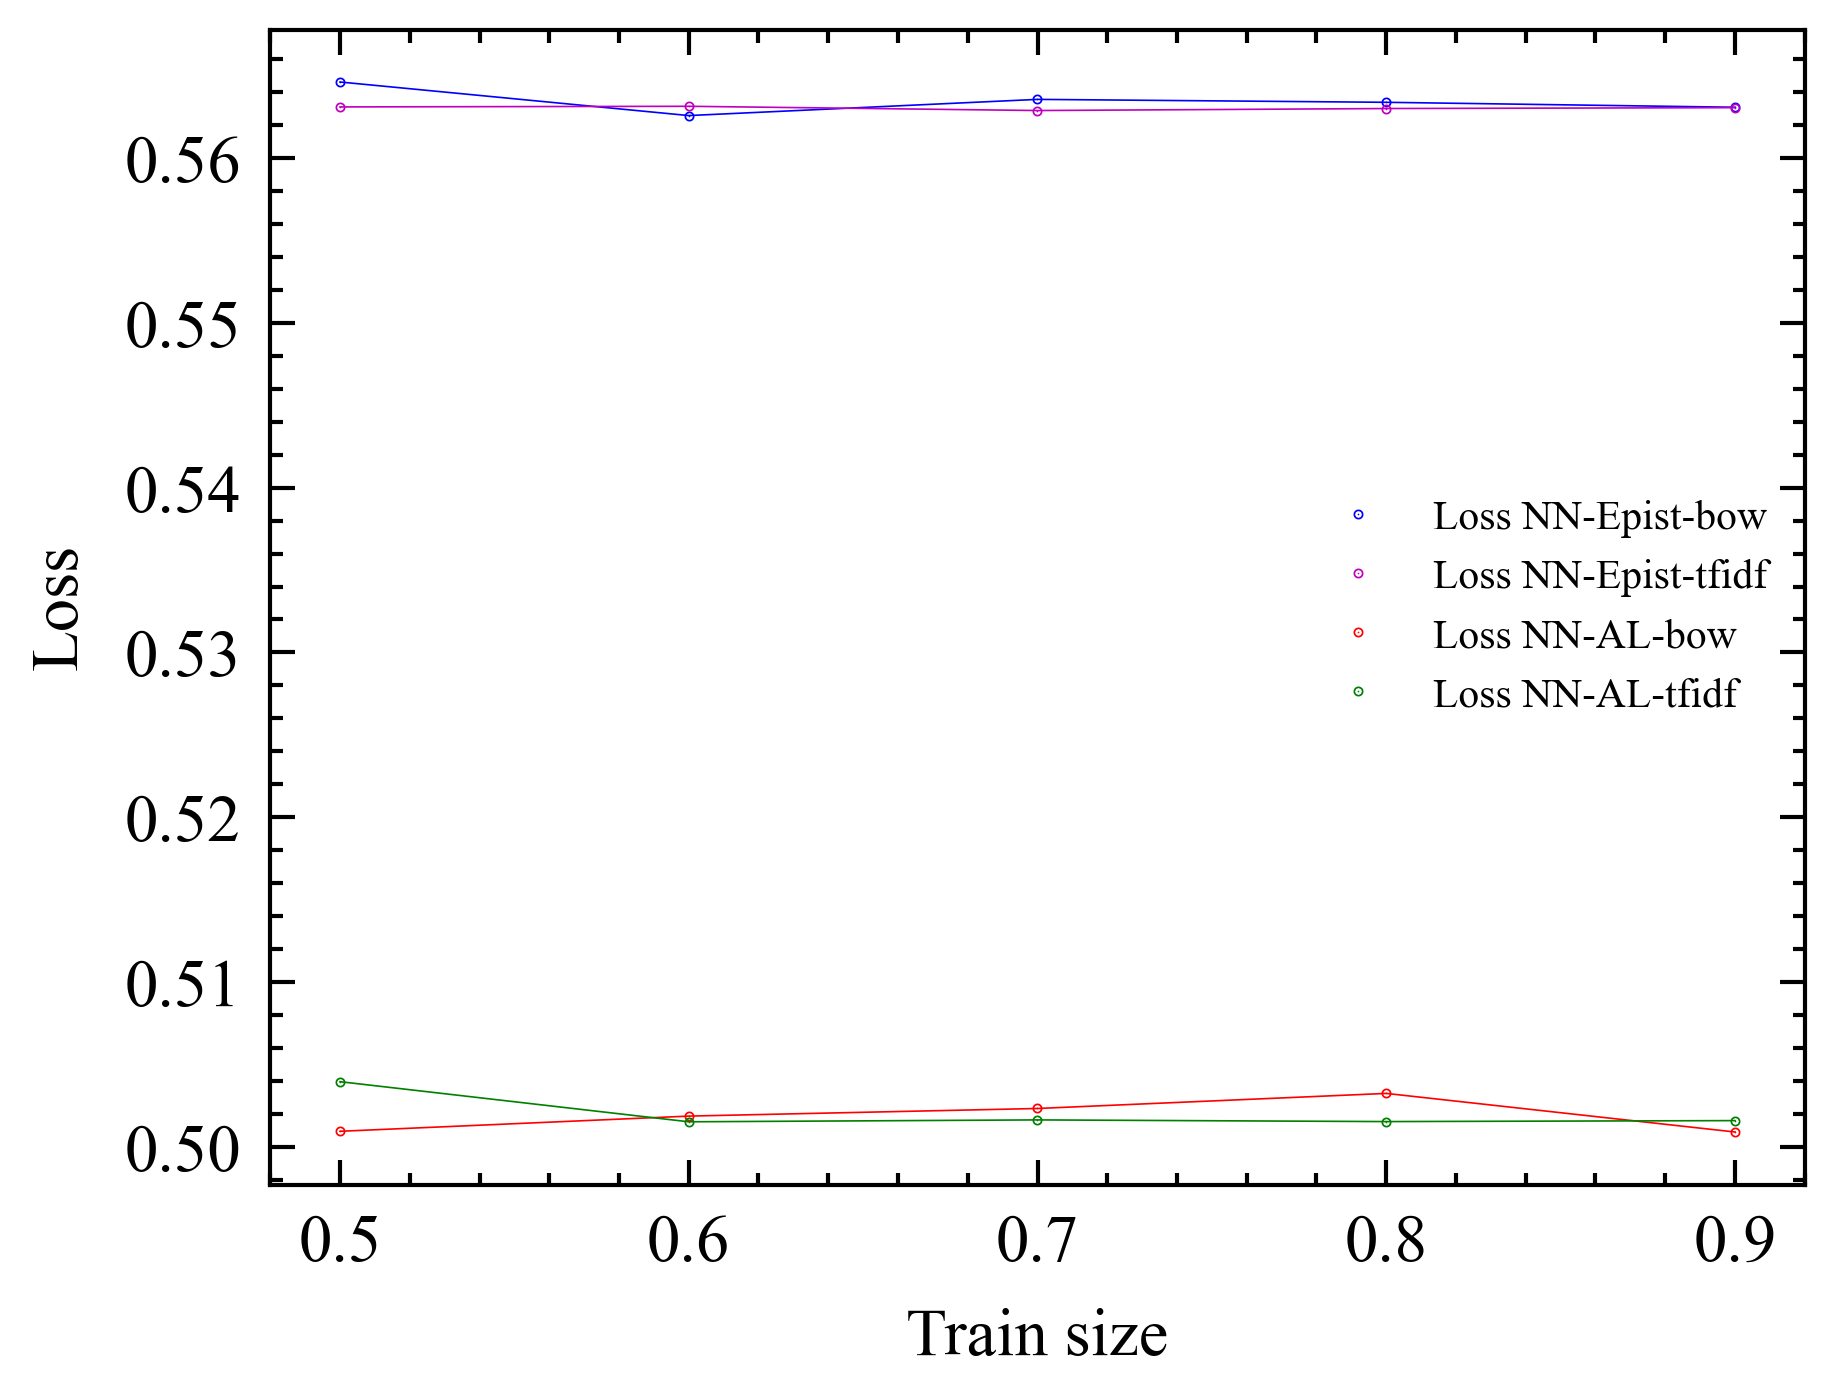

In [ ]:
plt.plot(df_unpic_epist_bow_rl['trainsize'], df_unpic_epist_bow_rl['loss'], 'o', markersize=0.2, linewidth = 0.2, c = 'b', label = 'Loss NN-Epist-bow')
plt.plot(df_unpic_epist_bow_rl['trainsize'], df_unpic_epist_bow_rl['loss'], '-', linewidth = 0.2, c = 'b')
plt.plot(df_unpic_epist_tf_rl['trainsize'], df_unpic_epist_tf_rl['loss'],'o',  markersize=0.2,  linewidth = 0.2, c = 'm', label = 'Loss NN-Epist-tfidf')
plt.plot(df_unpic_epist_tf_rl['trainsize'], df_unpic_epist_tf_rl['loss'],'-',   linewidth = 0.2, c = 'm')
plt.plot(df_unpic_arg_bow_rl['trainsize'], df_unpic_arg_bow_rl['loss'], 'o', markersize=0.2, linewidth = 0.2, c = 'r', label = 'Loss NN-AL-bow')
plt.plot(df_unpic_arg_bow_rl['trainsize'], df_unpic_arg_bow_rl['loss'], '-',linewidth = 0.2, c = 'r' )
plt.plot(df_unpic_arg_tfidf_al['trainsize'],df_unpic_arg_tfidf_al['loss'], 'o',  markersize=0.2,   linewidth = 0.2, c = 'g', label = 'Loss NN-AL-tfidf')
plt.plot(df_unpic_arg_tfidf_al['trainsize'],df_unpic_arg_tfidf_al['loss'], '-',   linewidth = 0.2, c = 'g')
plt.xlabel('Train size')
plt.ylabel('Loss')
plt.legend(prop={'size': 5})

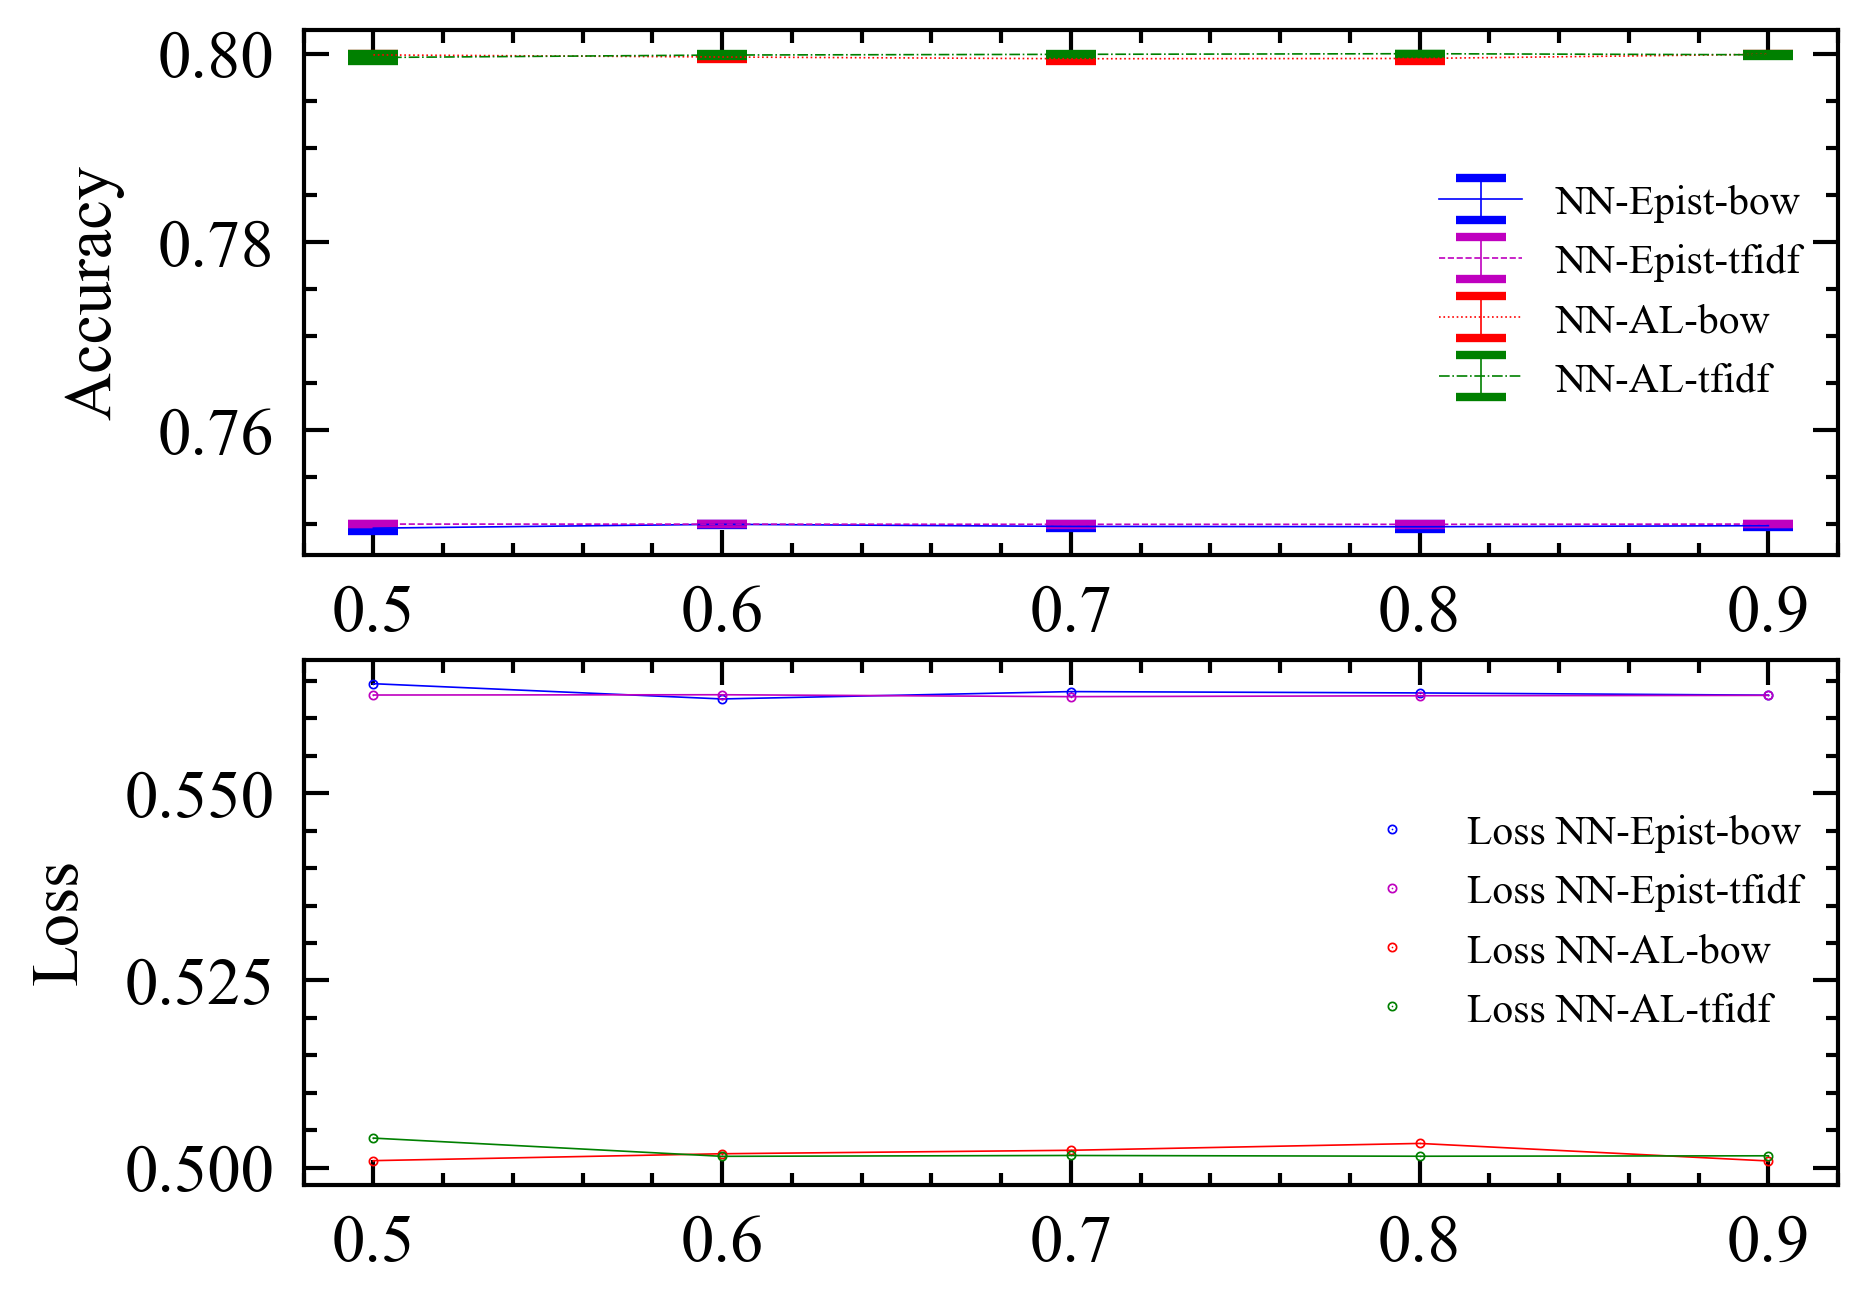

In [ ]:
plt.subplot(2,1,1)
#plt.plot(df_unpic_epist_bow_rl['trainsize'], df_unpic_epist_bow_rl['accuracy'], label = 'NN-Epist-bow', c ='m')
plt.errorbar(df_unpic_epist_bow_rl['trainsize'], df_unpic_epist_bow_rl['accuracy'], yerr = df_unpic_epist_bow_rl['sem'],  markersize=0.2, capsize=3, linewidth = 0.2, c = 'b', label = 'NN-Epist-bow')
#plt.plot(df_unpic_epist_tf_rl['trainsize'],df_unpic_epist_tf_rl['accuracy'], label = 'NN-Epist-tfidf', c = 'g')
plt.errorbar(df_unpic_epist_tf_rl['trainsize'], df_unpic_epist_tf_rl['accuracy'], yerr = df_unpic_epist_tf_rl['sem'], markersize=0.2, capsize=3, linewidth = 0.2, c = 'm', label = 'NN-Epist-tfidf')
#plt.plot(df_unpic_arg_bow_rl['trainsize'], df_unpic_arg_bow_rl['accuracy'], label = 'NN-AL-bow', c = 'r')
plt.errorbar(df_unpic_arg_bow_rl['trainsize'], df_unpic_arg_bow_rl['accuracy'], yerr = df_unpic_arg_bow_rl['sem'], markersize=0.2, capsize=3, capthick= 1, linewidth = 0.2, c = 'r', elinewidth= 0.2, label = 'NN-AL-bow')
#plt.plot(df_unpic_arg_tfidf_al['trainsize'], df_unpic_arg_tfidf_al['accuracy'], label = 'NN-AL-tfidf', c = 'b')
plt.errorbar(df_unpic_arg_tfidf_al['trainsize'],df_unpic_arg_tfidf_al['accuracy'], yerr = df_unpic_arg_tfidf_al['sem'], markersize=0.2, capsize=3, capthick = 1, linewidth = 0.2, c = 'g', label = 'NN-AL-tfidf')
plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.legend(prop={'size': 5})

plt.subplot(2,1,2)
plt.plot(df_unpic_epist_bow_rl['trainsize'], df_unpic_epist_bow_rl['loss'], 'o', markersize=0.2, linewidth = 0.2, c = 'b', label = 'Loss NN-Epist-bow')
plt.plot(df_unpic_epist_bow_rl['trainsize'], df_unpic_epist_bow_rl['loss'], '-', linewidth = 0.2, c = 'b')
plt.plot(df_unpic_epist_tf_rl['trainsize'], df_unpic_epist_tf_rl['loss'],'o',  markersize=0.2,  linewidth = 0.2, c = 'm', label = 'Loss NN-Epist-tfidf')
plt.plot(df_unpic_epist_tf_rl['trainsize'], df_unpic_epist_tf_rl['loss'],'-',   linewidth = 0.2, c = 'm')
plt.plot(df_unpic_arg_bow_rl['trainsize'], df_unpic_arg_bow_rl['loss'], 'o', markersize=0.2, linewidth = 0.2, c = 'r', label = 'Loss NN-AL-bow')
plt.plot(df_unpic_arg_bow_rl['trainsize'], df_unpic_arg_bow_rl['loss'], '-',linewidth = 0.2, c = 'r' )
plt.plot(df_unpic_arg_tfidf_al['trainsize'],df_unpic_arg_tfidf_al['loss'], 'o',  markersize=0.2,   linewidth = 0.2, c = 'g', label = 'Loss NN-AL-tfidf')
plt.plot(df_unpic_arg_tfidf_al['trainsize'],df_unpic_arg_tfidf_al['loss'], '-',   linewidth = 0.2, c = 'g')
plt.ylabel('Loss')
plt.legend(prop={'size': 5})


# NEURAL NETWORK INVESTIGATIONS

In [132]:
def NN_invest(model1, input1, ephs, X_t, y_t, X_test, y_test, node1, node2, node3):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(node1, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(node2, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(node3 ,activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=30 )
    return history



def NN_data_invest(X, y, tsize,  epoch_no, node1, node2, node3):
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = tsize )
    input = X_train_b.shape[1] 
    nn1 = NN_invest(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b, node1, node2, node3)
    return pd.DataFrame(nn1.history)




### 1. Changing the number of nodes

In [ ]:
'''
node1: 12
node2: 8
node3: 1
'''
df_y1y2_bow_al = NN_data_invest(X_y1y2_bow_al,y_y1y2_bow_al , 0.8,  20, 12, 8, 1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                90768     
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
 flatten_1 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 1s 95ms/step - loss: 1.3900 - accuracy: 0.2254 - val_loss: 0.9025 - val_accuracy: 0.2333
Epoch 2/20
5/5 [===========================

In [76]:
# 12,8,1
#df_pickle_y1y2_bow_al = utils.save_as_pickle_file(df_y1y2_bow_al,'NN_investigations_y1y2_20ephs_12_8_1', dir_name_e)
df_unpickle_y1y2_bow_al = utils.load_pickle_file_to_df('NN_investigations_y1y2_20ephs_12_8_1', dir_name_e)


In [77]:
# 150,8,1
#df_y1y2_bow_al_l1only = NN_data_invest(X_y1y2_bow_al,y_y1y2_bow_al , 0.8,  20, 150, 8, 1)
#df_pickle_y1y2_bow_al_l1only = utils.save_as_pickle_file(df_y1y2_bow_al_l1only,'NN_investigations_y1y2_20ephs_150_8_1', dir_name_e)
df_unpickle_y1y2_bow_all1only = utils.load_pickle_file_to_df('NN_investigations_y1y2_20ephs_150_8_1', dir_name_e)

In [ ]:
# 150,100,1
df_y1y2_bow_al2 = NN_data_invest(X_y1y2_bow_al,y_y1y2_bow_al , 0.8, 20,150,100, 1)
df_pickle_y1y2_bow_al2 = utils.save_as_pickle_file(df_y1y2_bow_al2,'NN_investigations_y1y2_20ephs_150_100_1', dir_name_e)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 150)               1134600   
                                                                 
 dense_10 (Dense)            (None, 100)               15100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
 flatten_3 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 1,149,801
Trainable params: 1,149,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 1s 58ms/step - loss: 1.6841 - accuracy: 0.7366 - val_loss: 0.6529 - val_accuracy: 0.6500
Epoch 2/20
5/5 [=====================

In [78]:
# 150, 100, 1
df_unpickle_y1y2_bow_al2= utils.load_pickle_file_to_df('NN_investigations_y1y2_20ephs_150_100_1', dir_name_e)

In [ ]:
# 12,100,1
df_y1y2_bow_al2 = NN_data_invest(X_y1y2_bow_al,y_y1y2_bow_al , 0.8, 20,12,100, 1)
df_pickle_y1y2_bow_al2 = utils.save_as_pickle_file(df_y1y2_bow_al2,'NN_investigations_y1y2_20ephs_12_100_1', dir_name_e)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                90768     
                                                                 
 dense_13 (Dense)            (None, 100)               1300      
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
 flatten_4 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 92,169
Trainable params: 92,169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 1s 94ms/step - loss: 0.5884 - accuracy: 0.7324 - val_loss: 0.5747 - val_accuracy: 0.8000
Epoch 2/20
5/5 [===========================

In [83]:
# input dimension  = 7518
# neuron number is 2/3 
df_y1y2_bow_al3 = NN_data_invest(X_y1y2_bow_al,y_y1y2_bow_al , 0.8, 20, 5012,100, 1)
df_pickle_y1y2_bow_al3 = utils.save_as_pickle_file(df_y1y2_bow_al3,'NN_investigations_y1y2_20ephs_5012_100_1', dir_name_e)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 5012)              37910768  
                                                                 
 dense_22 (Dense)            (None, 100)               501300    
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
 flatten_7 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 38,412,169
Trainable params: 38,412,169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 3s 363ms/step - loss: 9.7990 - accuracy: 0.3268 - val_loss: 12.1994 - val_accuracy: 0.2000
Epoch 2/20
5/5 [=================

In [80]:
# 5012,100,1
df_unpickle_y1y2_bow_al3= utils.load_pickle_file_to_df('NN_investigations_y1y2_20ephs_5012_100_1', dir_name_e)

In [81]:
# input dimension  = 7518
# neuron number is 2/3 
# 5012, 2500, 1
df_y1y2_bow_al4 = NN_data_invest(X_y1y2_bow_al,y_y1y2_bow_al , 0.8, 20, 5012,2500, 1)
df_pickle_y1y2_bow_al4 = utils.save_as_pickle_file(df_y1y2_bow_al4,'NN_investigations_y1y2_20ephs_5012_2500_1', dir_name_e)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 5012)              37910768  
                                                                 
 dense_19 (Dense)            (None, 2500)              12532500  
                                                                 
 dense_20 (Dense)            (None, 1)                 2501      
                                                                 
 flatten_6 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 50,445,769
Trainable params: 50,445,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 4s 490ms/step - loss: 2.7551 - accuracy: 0.6859 - val_loss: 3.0850 - val_accuracy: 0.8000
Epoch 2/20
5/5 [==================

In [82]:
# 5012,2500,1
df_unpickle_y1y2_bow_al4= utils.load_pickle_file_to_df('NN_investigations_y1y2_20ephs_5012_2500_1', dir_name_e)


In [87]:
# 12, 100, 1
df_y1y2_bow_al4 = NN_data_invest(X_y1y2_bow_al,y_y1y2_bow_al , 0.8, 20, 12, 100, 1)
df_pickle_y1y2_bow_all2only = utils.save_as_pickle_file(df_y1y2_bow_al4,'NN_investigations_y1y2_20ephs_12_100_1', dir_name_e)
df_unpickle_y1y2_bow_all2only = utils.load_pickle_file_to_df('NN_investigations_y1y2_20ephs_12_100_1', dir_name_e)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 12)                90768     
                                                                 
 dense_25 (Dense)            (None, 100)               1300      
                                                                 
 dense_26 (Dense)            (None, 1)                 101       
                                                                 
 flatten_8 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 92,169
Trainable params: 92,169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 1s 59ms/step - loss: 0.5343 - accuracy: 0.8000 - val_loss: 0.5230 - val_accuracy: 0.8000
Epoch 2/20
5/5 [===========================

### Accuracy and loss graphs for  different number of neurons 


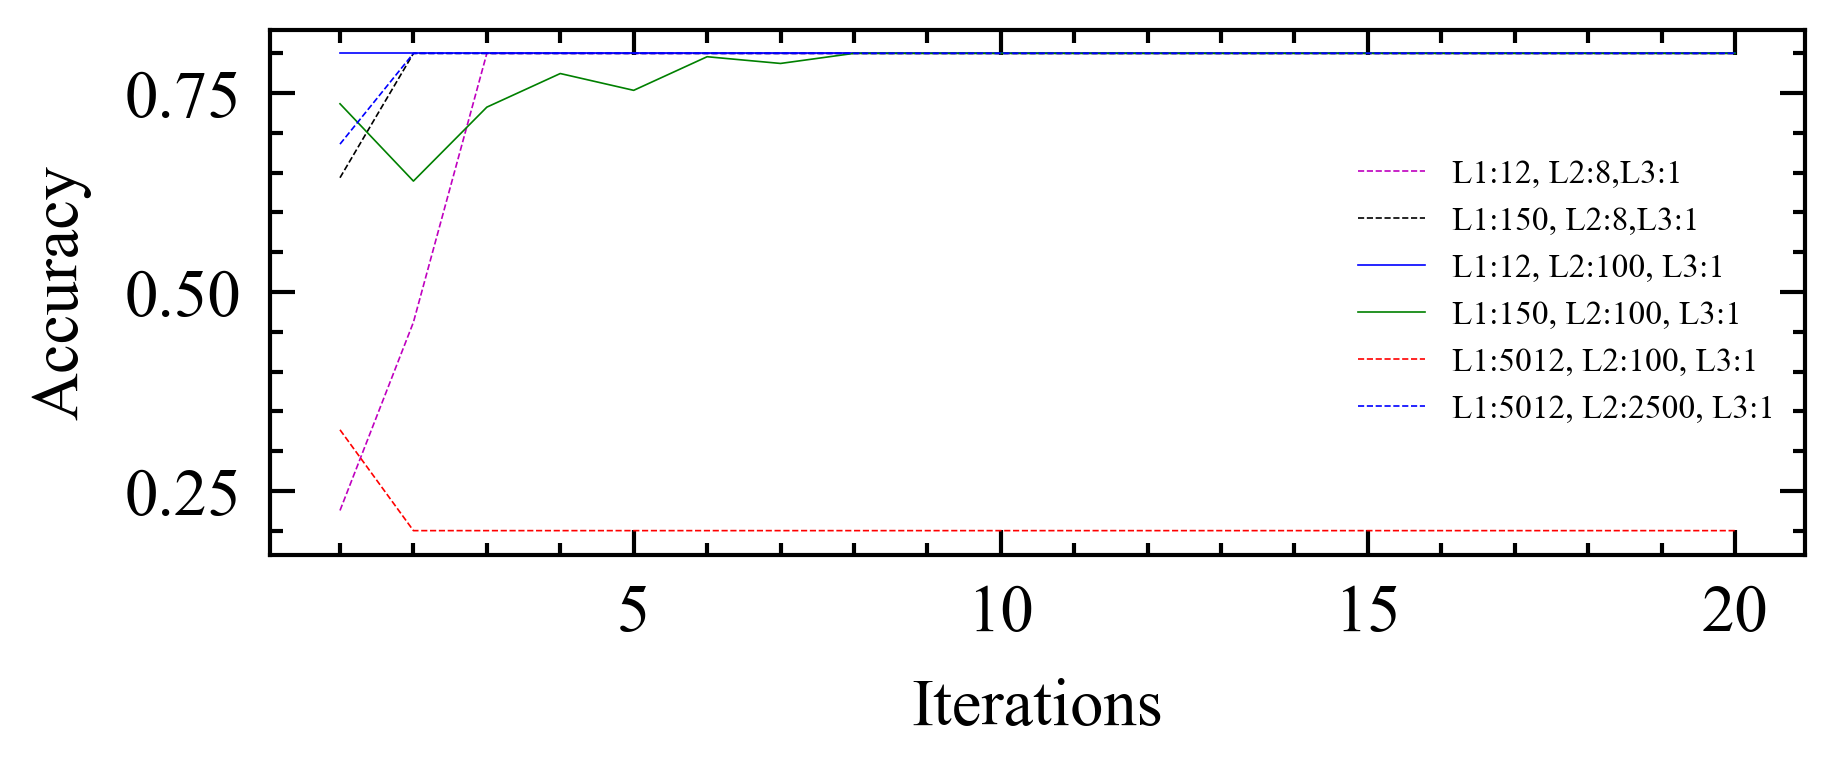

In [89]:
x = np.linspace(1,20,20)
plt.subplot(2,1,1)
plt.plot(x, df_unpickle_y1y2_bow_al['accuracy'], '--', label = 'L1:12, L2:8,L3:1', linewidth = 0.2, c = 'm')
plt.plot(x, df_unpickle_y1y2_bow_all1only['accuracy'], '--', label = 'L1:150, L2:8,L3:1', linewidth = 0.2)
plt.plot(x, df_unpickle_y1y2_bow_all2only['accuracy'], '-', label = 'L1:12, L2:100, L3:1', linewidth =0.2, c = 'b')
plt.plot(x, df_unpickle_y1y2_bow_al2['accuracy'], '-', label = 'L1:150, L2:100, L3:1', linewidth = 0.2, c = 'g')
plt.plot(x, df_unpickle_y1y2_bow_al3['accuracy'], '--', label = 'L1:5012, L2:100, L3:1', linewidth = 0.2)
plt.plot(x, df_unpickle_y1y2_bow_al4['accuracy'], '--', label = 'L1:5012, L2:2500, L3:1', linewidth = 0.2)
plt.legend(prop = {'size':4})
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.show()

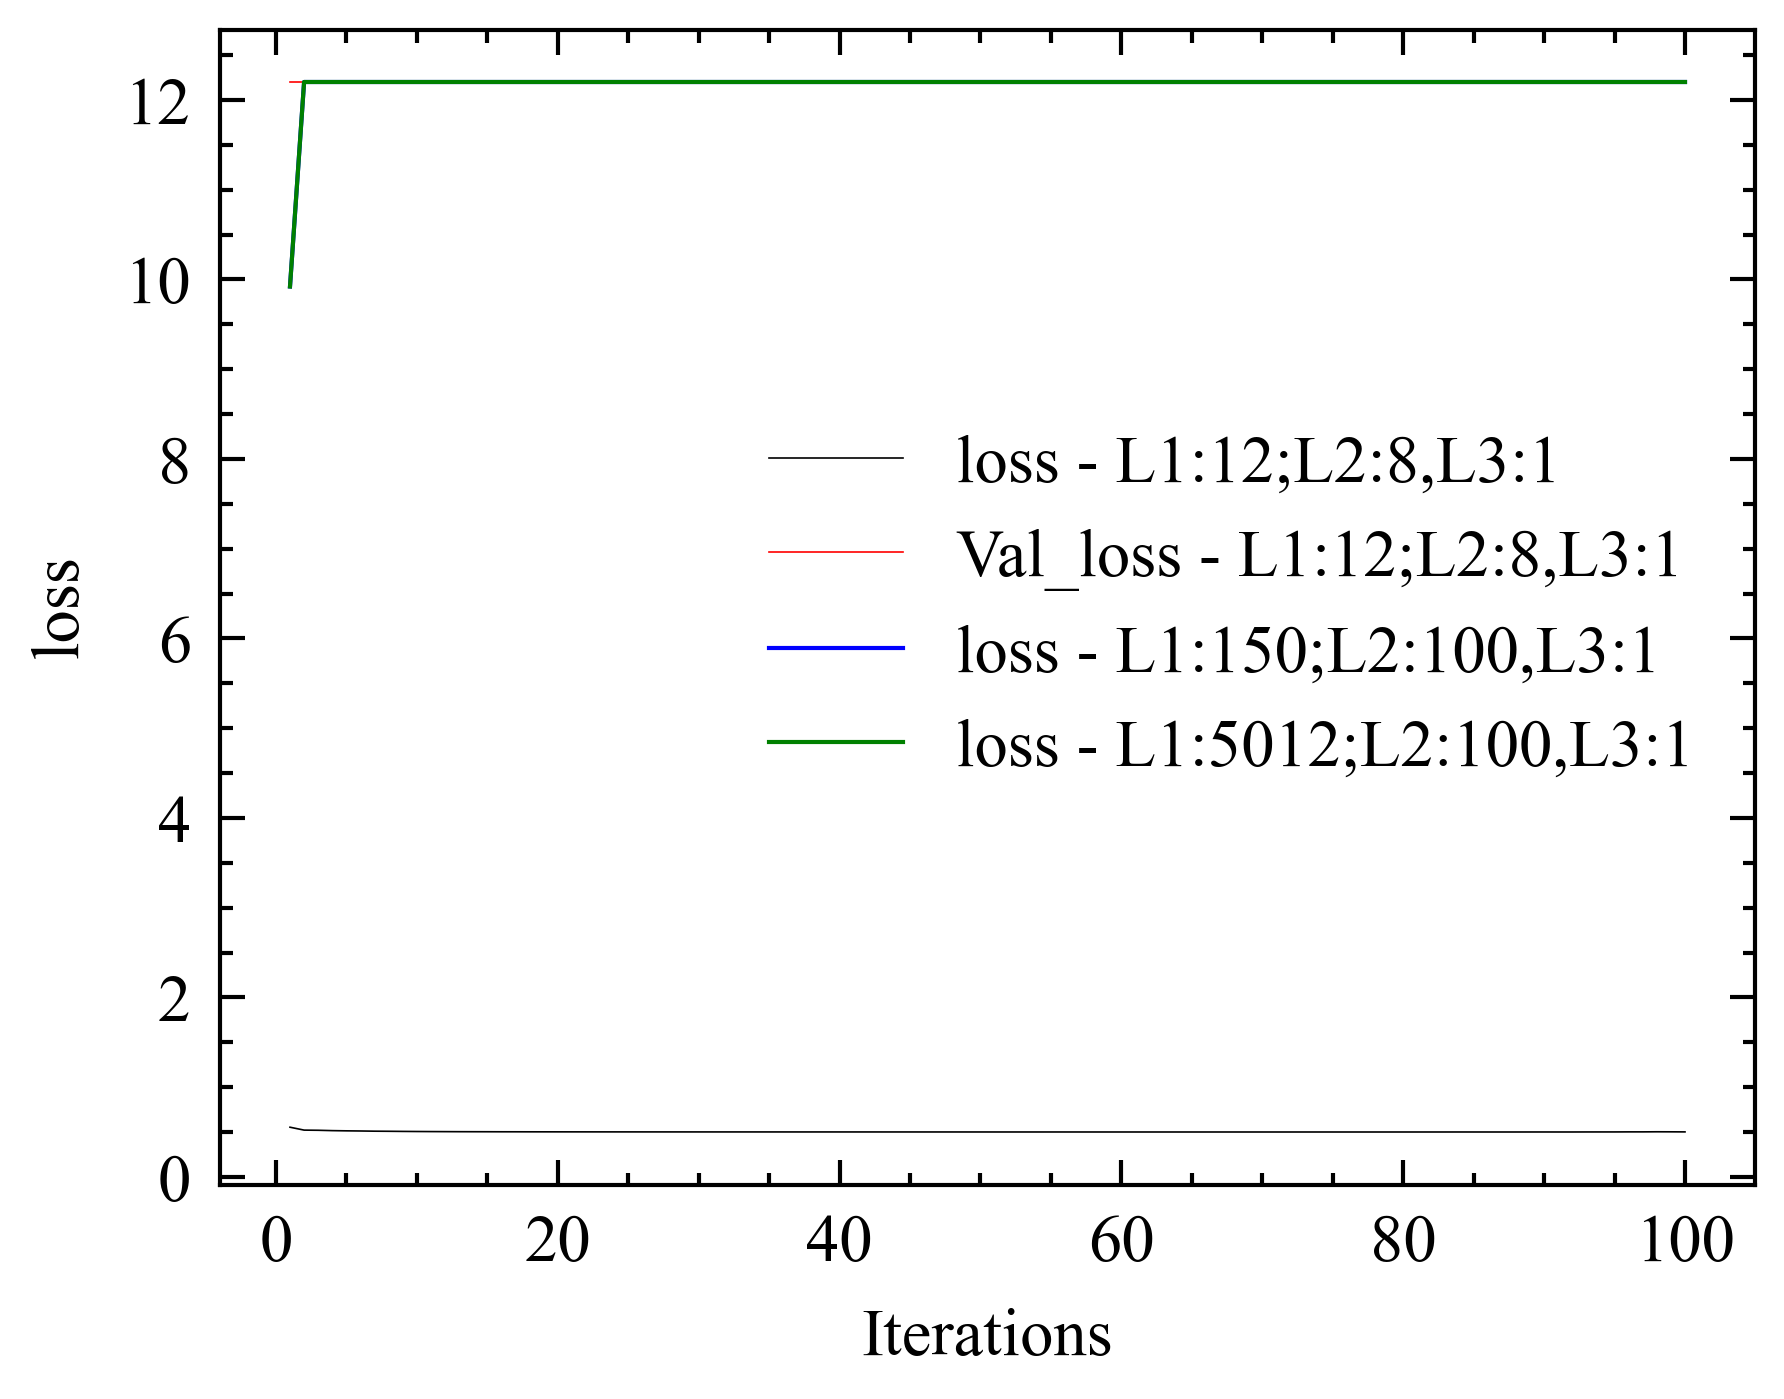

In [ ]:
plt.plot(x, df_unpickle_y1y2_bow_al['loss'], '-', label = 'loss - L1:12;L2:8,L3:1', linewidth = 0.2)
plt.plot(x, df_unpickle_y1y2_bow_al2['val_loss'], '-', label = 'Val_loss - L1:12;L2:8,L3:1', linewidth = 0.2)
plt.plot(x, df_unpickle_y1y2_bow_al2['loss'], '-', label = 'loss - L1:150;L2:100,L3:1', linewidth = 0.5)
plt.plot(x, df_unpickle_y1y2_bow_al3['loss'], '-', label = 'loss - L1:5012;L2:100,L3:1', linewidth = 0.5)
plt.legend()
plt.ylabel('loss')
plt.xlabel('Iterations')
plt.show()

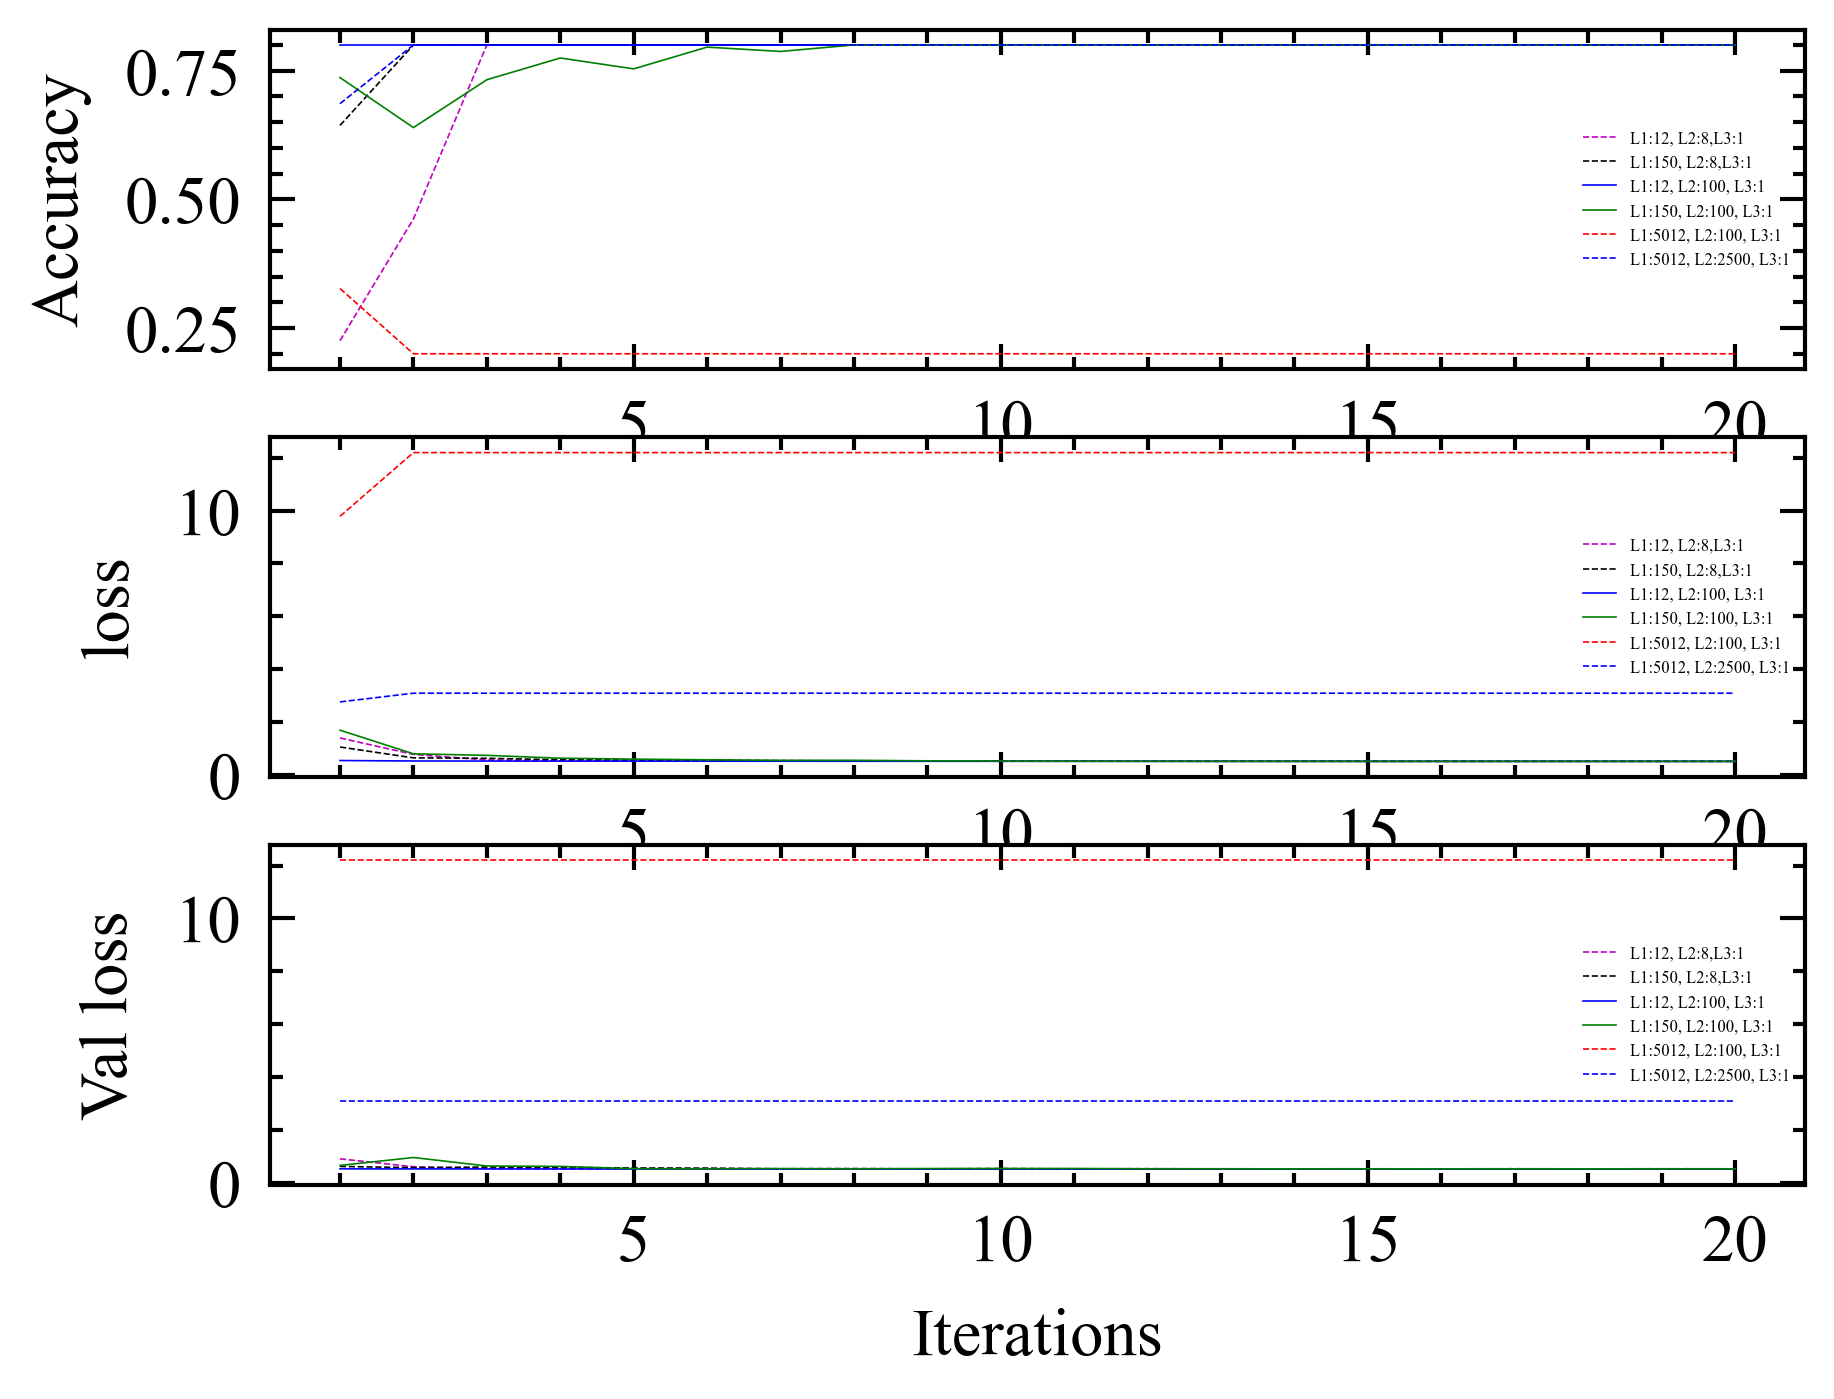

In [95]:
# Subplots of accuracy and loss graphs 
fig = plt.figure()
x = np.linspace(1,20,20)
plt.subplot(3,1,1)
plt.plot(x, df_unpickle_y1y2_bow_al['accuracy'], '--', label = 'L1:12, L2:8,L3:1', linewidth = 0.2, c = 'm')
#plt.plot(x, df_unpickle_y1y2_bow_al['accuracy'], 'o', label = 'L1:12, L2:8,L3:1', markersize = 0.7, c = 'm')
plt.plot(x, df_unpickle_y1y2_bow_all1only['accuracy'], '--', label = 'L1:150, L2:8,L3:1', linewidth = 0.2)
plt.plot(x, df_unpickle_y1y2_bow_all2only['accuracy'], '-', label = 'L1:12, L2:100, L3:1', linewidth =0.2, c = 'b')
plt.plot(x, df_unpickle_y1y2_bow_al2['accuracy'], '-', label = 'L1:150, L2:100, L3:1', linewidth = 0.2, c = 'g')
plt.plot(x, df_unpickle_y1y2_bow_al3['accuracy'], '--', label = 'L1:5012, L2:100, L3:1', linewidth = 0.2)
plt.plot(x, df_unpickle_y1y2_bow_al4['accuracy'], '--', label = 'L1:5012, L2:2500, L3:1', linewidth = 0.2)

plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend( prop = {'size':2})

plt.subplot(3,1,2)
plt.plot(x, df_unpickle_y1y2_bow_al['loss'], '--', label = 'L1:12, L2:8,L3:1', linewidth = 0.2, c = 'm')
plt.plot(x, df_unpickle_y1y2_bow_all1only['loss'], '--', label = 'L1:150, L2:8,L3:1', linewidth = 0.2)
plt.plot(x, df_unpickle_y1y2_bow_all2only['loss'], '-', label = 'L1:12, L2:100, L3:1', linewidth =0.2, c = 'b')
plt.plot(x, df_unpickle_y1y2_bow_al2['loss'], '-', label = 'L1:150, L2:100, L3:1', linewidth = 0.2, c = 'g')
plt.plot(x, df_unpickle_y1y2_bow_al3['loss'], '--', label = 'L1:5012, L2:100, L3:1', linewidth = 0.2)
plt.plot(x, df_unpickle_y1y2_bow_al4['loss'], '--', label = 'L1:5012, L2:2500, L3:1', linewidth = 0.2)
plt.legend(prop = {'size':2})
plt.ylabel('loss')
plt.xlabel('Iterations')

plt.subplot(3,1,3)
plt.plot(x, df_unpickle_y1y2_bow_al['val_loss'], '--', label = 'L1:12, L2:8,L3:1', linewidth = 0.2, c = 'm')
plt.plot(x, df_unpickle_y1y2_bow_all1only['val_loss'], '--', label = 'L1:150, L2:8,L3:1', linewidth = 0.2)
plt.plot(x, df_unpickle_y1y2_bow_all2only['val_loss'], '-', label = 'L1:12, L2:100, L3:1', linewidth =0.2, c = 'b')
plt.plot(x, df_unpickle_y1y2_bow_al2['val_loss'], '-', label = 'L1:150, L2:100, L3:1', linewidth = 0.2, c = 'g')
plt.plot(x, df_unpickle_y1y2_bow_al3['val_loss'], '--', label = 'L1:5012, L2:100, L3:1', linewidth = 0.2)
plt.plot(x, df_unpickle_y1y2_bow_al4['val_loss'], '--', label = 'L1:5012, L2:2500, L3:1', linewidth = 0.2)
plt.legend(prop = {'size':4})
plt.ylabel('Val loss')
plt.xlabel('Iterations')
plt.legend(prop = {'size':2})

plt.show()


#### 1.2 Changing the number of layers over a small range in LAYER 1

In [136]:
def NN_data_node(X, y, tsize,  epoch_no, node_arr, node2, node3):
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = tsize )
    input = X_train_b.shape[1] 
    acc_hist = []
    times    = []
    for i in node_arr:
        start_time = time()
        nn1 = NN_invest(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b, i, node2, node3)
        acc_hist.append(nn1)
        times.append(time() - start_time)
    
    return acc_hist, times

In [137]:
nodes = [8,10,12,14,16]
hist_node = NN_data_node(X_y1y2_bow_al, y_y1y2_bow_al, 0.8, 20, nodes, 8, 1)

Model: "sequential_105"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_315 (Dense)           (None, 8)                 60512     
                                                                 
 dense_316 (Dense)           (None, 8)                 72        
                                                                 
 dense_317 (Dense)           (None, 1)                 9         
                                                                 
 flatten_105 (Flatten)       (None, 1)                 0         
                                                                 
Total params: 60,593
Trainable params: 60,593
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 1s 74ms/step - loss: 2.2879 - accuracy: 0.3901 - val_loss: 0.6913 - val_accuracy: 0.7833
Epoch 2/20
5/5 [=========================

In [138]:
hist_node2 = hist_node[0]
time_of_nodes = hist_node[1]
print(hist_node2)

[<keras.callbacks.History object at 0x00000277F82CD430>, <keras.callbacks.History object at 0x00000277F7F42E20>, <keras.callbacks.History object at 0x00000277F4A08820>, <keras.callbacks.History object at 0x0000027781856700>, <keras.callbacks.History object at 0x00000277816CFC10>]


In [143]:
average_acc_nodes = []
std_nodes       = []

for i in range(len(hist_node2)):
    acc = hist_node2[i].history['accuracy']
    dummy_acc = []
    
    for val in acc:
        dummy_acc.append(val)
    
    acc = np.sum(dummy_acc)/len(dummy_acc)
    error2  = np.std(dummy_acc)
    average_acc_nodes.append(acc)
    std_nodes.append(error2)



In [146]:
print(average_acc_nodes)

[0.7795071110129357, 0.684859212487936, 0.797464856505394, 0.7976761251688004, 0.7822535842657089]


<ErrorbarContainer object of 3 artists>

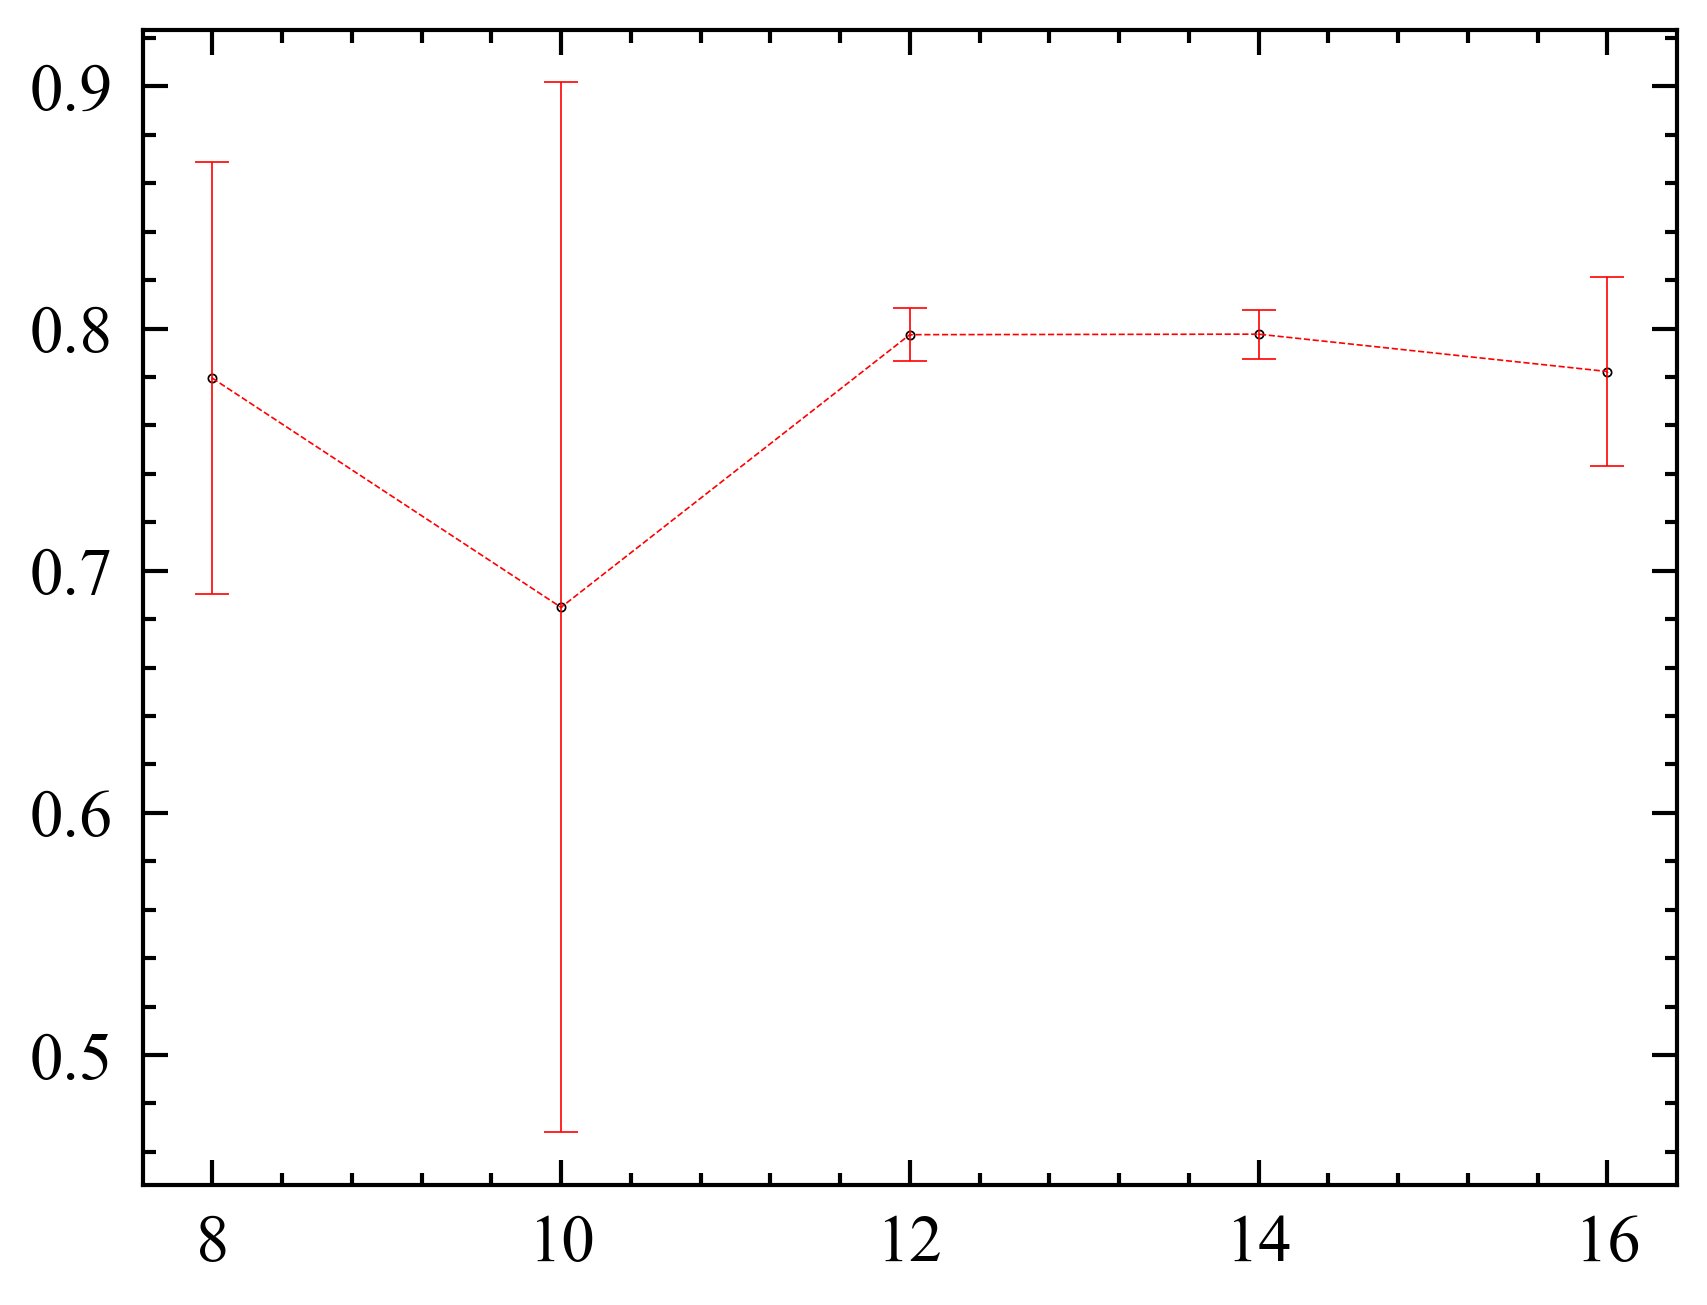

In [151]:
x_nodes = ['8','10','12','14','16']
plt.plot(x_nodes, average_acc_nodes, 'o', markersize = 0.2)
plt.errorbar(x_nodes, average_acc_nodes,yerr= std_nodes,  linewidth = 0.2, capsize= 2, capthick=0.2)



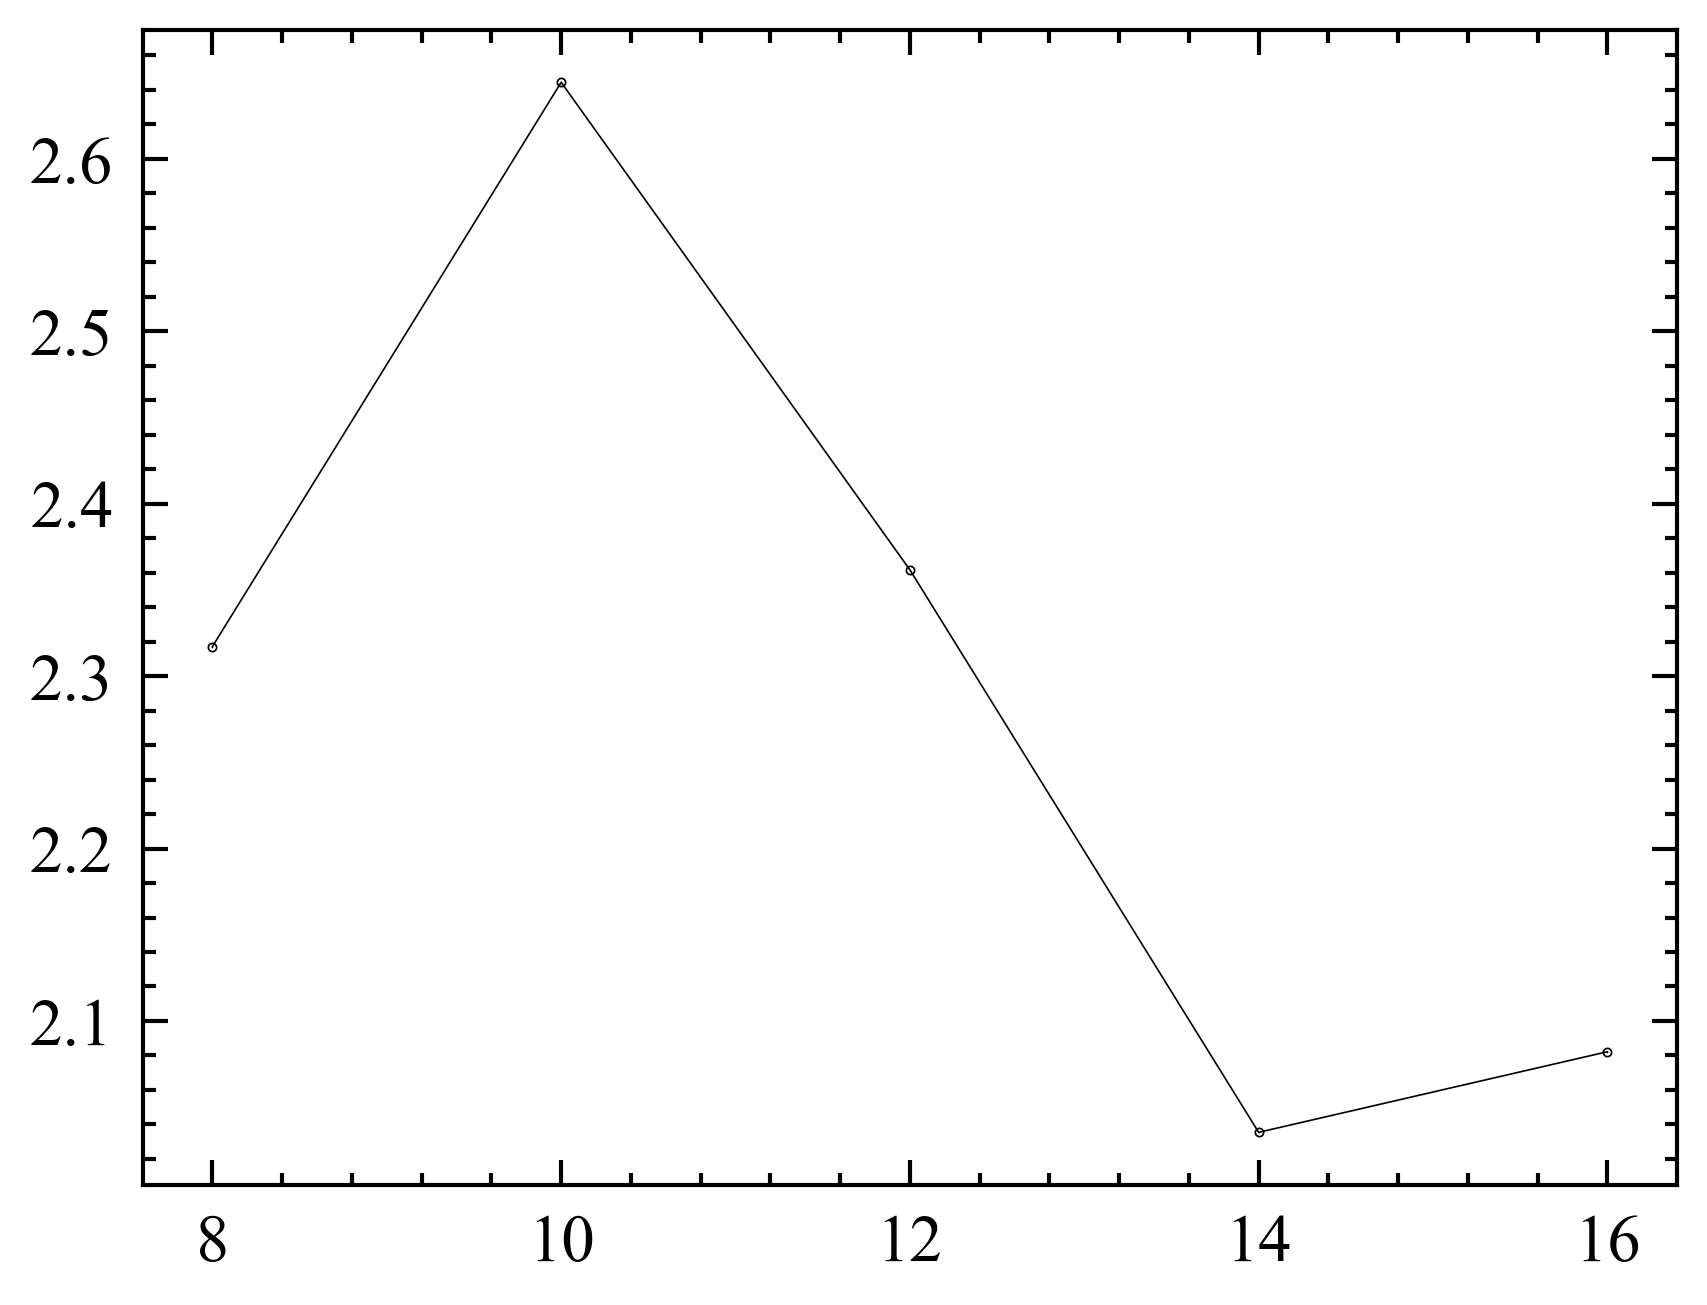

In [142]:

plt.plot(x_nodes, time_of_nodes, '-', linewidth = 0.2)
plt.plot(x_nodes, time_of_nodes, 'o', markersize = 0.2, c = 'black')

Text(0.5, 0, 'Node number layer 1')

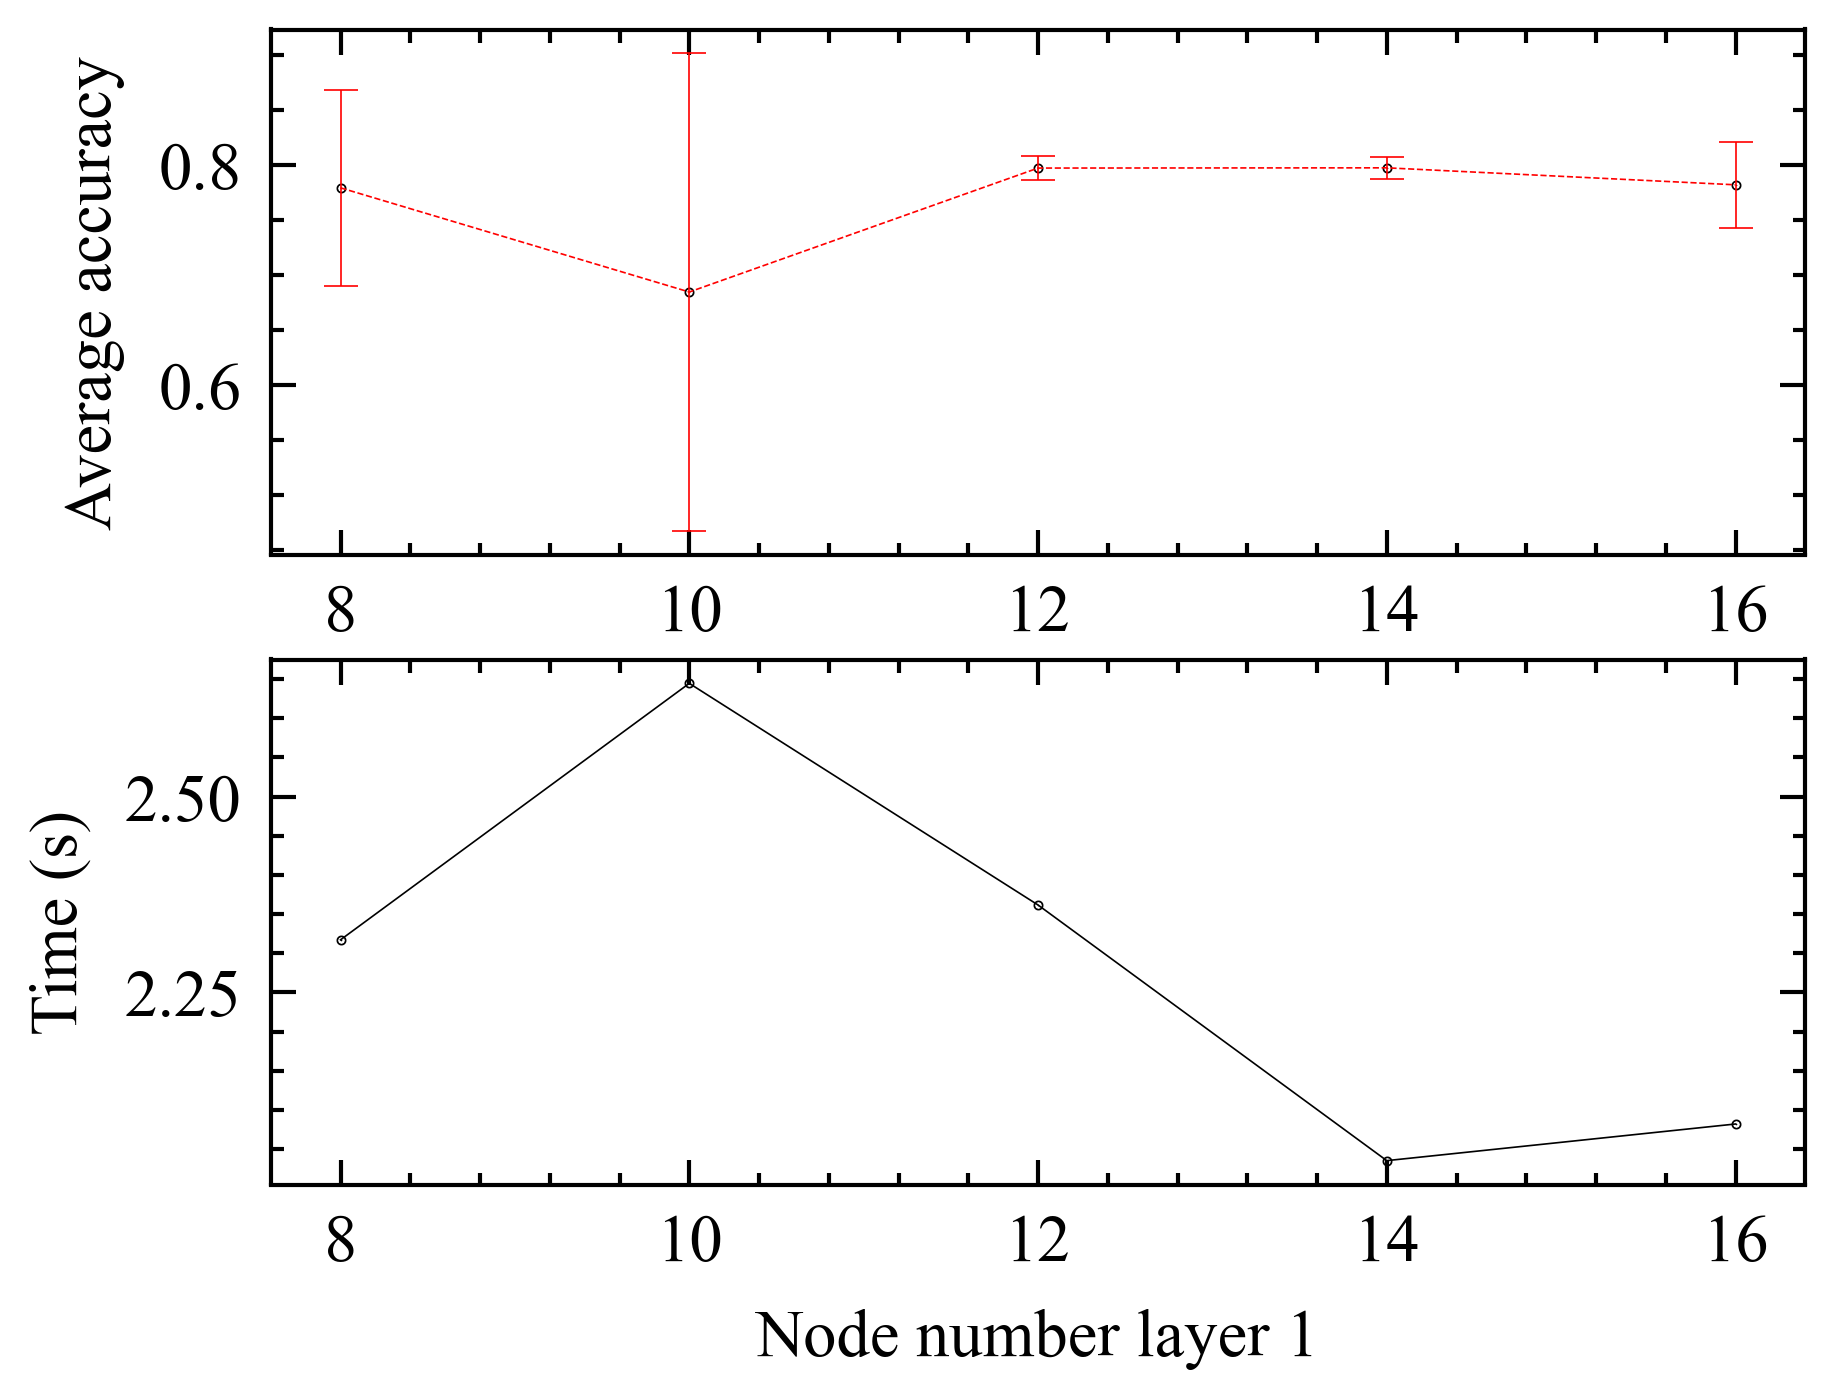

In [152]:
plt.subplot(2,1,1)
plt.plot(x_nodes, average_acc_nodes, 'o', markersize = 0.2)
plt.errorbar(x_nodes, average_acc_nodes,yerr= std_nodes,  linewidth = 0.2, capsize= 2, capthick=0.2)
plt.ylabel('Average accuracy')

plt.subplot(2,1,2)
plt.plot(x_nodes, time_of_nodes, '-', linewidth = 0.2)
plt.plot(x_nodes, time_of_nodes, 'o', markersize = 0.2, c = 'black')
plt.ylabel('Time (s)')
plt.xlabel('Node number  for layer 1')

In [153]:
average_acc_nodes_20 = []


for i in range(len(hist_node2)):
    acc = hist_node2[i].history['accuracy']
    dummy_acc = []
    
    for val in acc:
        dummy_acc.append(val)
    
    acc = dummy_acc
    average_acc_nodes_20.append(acc)


Text(0, 0.5, 'Accuracy')

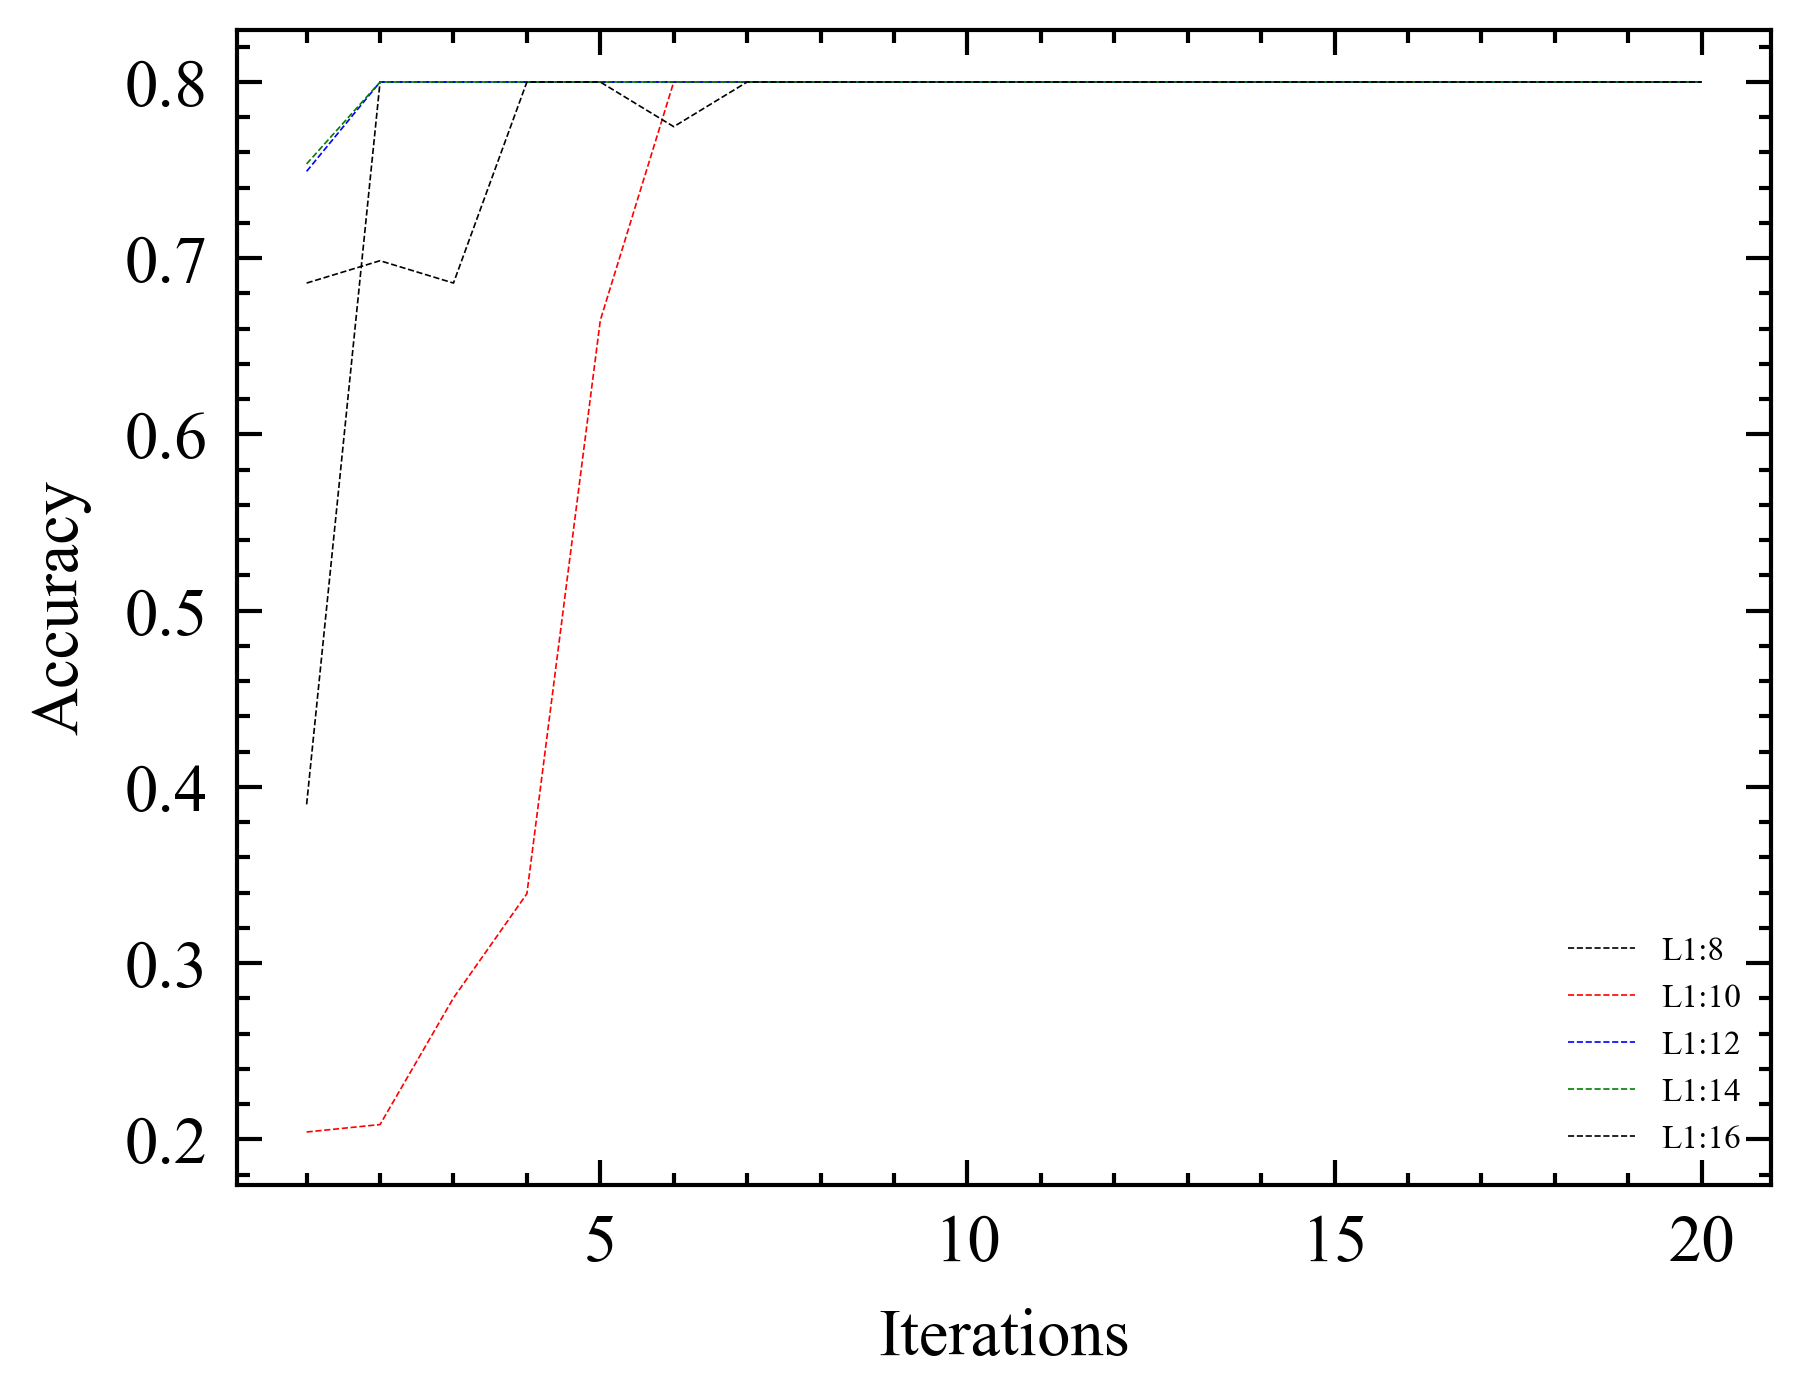

In [160]:
it = np.linspace(1,20,20)
plt.plot(it, average_acc_nodes_20[0], '--', label = 'L1:8', linewidth = 0.2)
plt.plot(it, average_acc_nodes_20[1], '--', label = 'L1:10', linewidth = 0.2)
plt.plot(it, average_acc_nodes_20[2], '--', label = 'L1:12', linewidth = 0.2)
plt.plot(it, average_acc_nodes_20[3], '--', label = 'L1:14', linewidth = 0.2)
plt.plot(it, average_acc_nodes_20[4], '--', label = 'L1:16', linewidth = 0.2)
plt.legend(prop = {'size':4})
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

### 2. Finding the best Optimizer function (100 and 500 epochs)

In [96]:
def NN_opt(model1, input1, ephs, X_t, y_t, X_test, y_test, node1, node2, node3, opt):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(node1, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(node2, input_dim = input, activation  = 'relu'))
    #model.add(layers.Dense(node2, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(node3 ,activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= opt, metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=30 )
    return history


optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
def NN_data_opt(X, y, tsize, epoch_no, node1, node2, node3, opt):
    accuracy = []
    loss     = []
    val_loss = []
    for i in opt:
        X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = tsize)
        input = X_train_b.shape[1] 
        nn1 = NN_opt(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b, node1, node2, node3, i)
        accuracy.append(nn1.history['accuracy'])
        loss.append(nn1.history['loss'])
        val_loss.append(nn1.history['val_loss'])
    dictionary = {'accuracy':accuracy, 'loss': loss, 'val_loss':val_loss}
    df = pd.DataFrame(dictionary)
    return df

In [97]:
df_bow_al_opt = NN_data_opt(X_y1y2_bow_al, y_y1y2_bow_al,0.8,20, 12,8,1,optimizers)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 12)                90768     
                                                                 
 dense_28 (Dense)            (None, 8)                 104       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
 flatten_9 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 1s 93ms/step - loss: 1.2679 - accuracy: 0.2211 - val_loss: 1.2732 - val_accuracy: 0.2333
Epoch 2/20
5/5 [===========================

In [99]:
df_bow_al_opt['Optimizers'] = optimizers
df_pickle_al_bow_opt = utils.save_as_pickle_file(df_bow_al_opt,'NN_investigations_y1y2_20epochs_Optimizer', dir_name_e)

In [100]:
df_unpickle_al_bow_opt = utils.load_pickle_file_to_df('NN_investigations_y1y2_20epochs_Optimizer', dir_name_e)
print(df_unpickle_al_bow_opt)

                                            accuracy  \
0  [0.2211267650127411, 0.2211267650127411, 0.221...   
1  [0.736619770526886, 0.7408450841903687, 0.7535...   
2  [0.5676056742668152, 0.8000000715255737, 0.800...   
3  [0.5464789271354675, 0.8000000715255737, 0.800...   
4  [0.7746479511260986, 0.8000000715255737, 0.800...   

                                                loss  \
0  [1.2679294347763062, 1.2616747617721558, 1.255...   
1  [0.7769646048545837, 0.6469855904579163, 0.626...   
2  [0.7498067021369934, 0.5328333973884583, 0.519...   
3  [1.5038137435913086, 0.5313153266906738, 0.550...   
4  [0.7290965914726257, 0.5324640274047852, 0.522...   

                                            val_loss Optimizers  
0  [1.2731927633285522, 1.2672232389450073, 1.261...   Adadelta  
1  [0.6042463779449463, 0.5985609292984009, 0.598...    Adagrad  
2  [0.524756669998169, 0.524907648563385, 0.51425...       Adam  
3  [0.5406790971755981, 0.5391495227813721, 0.531...    RMSpro

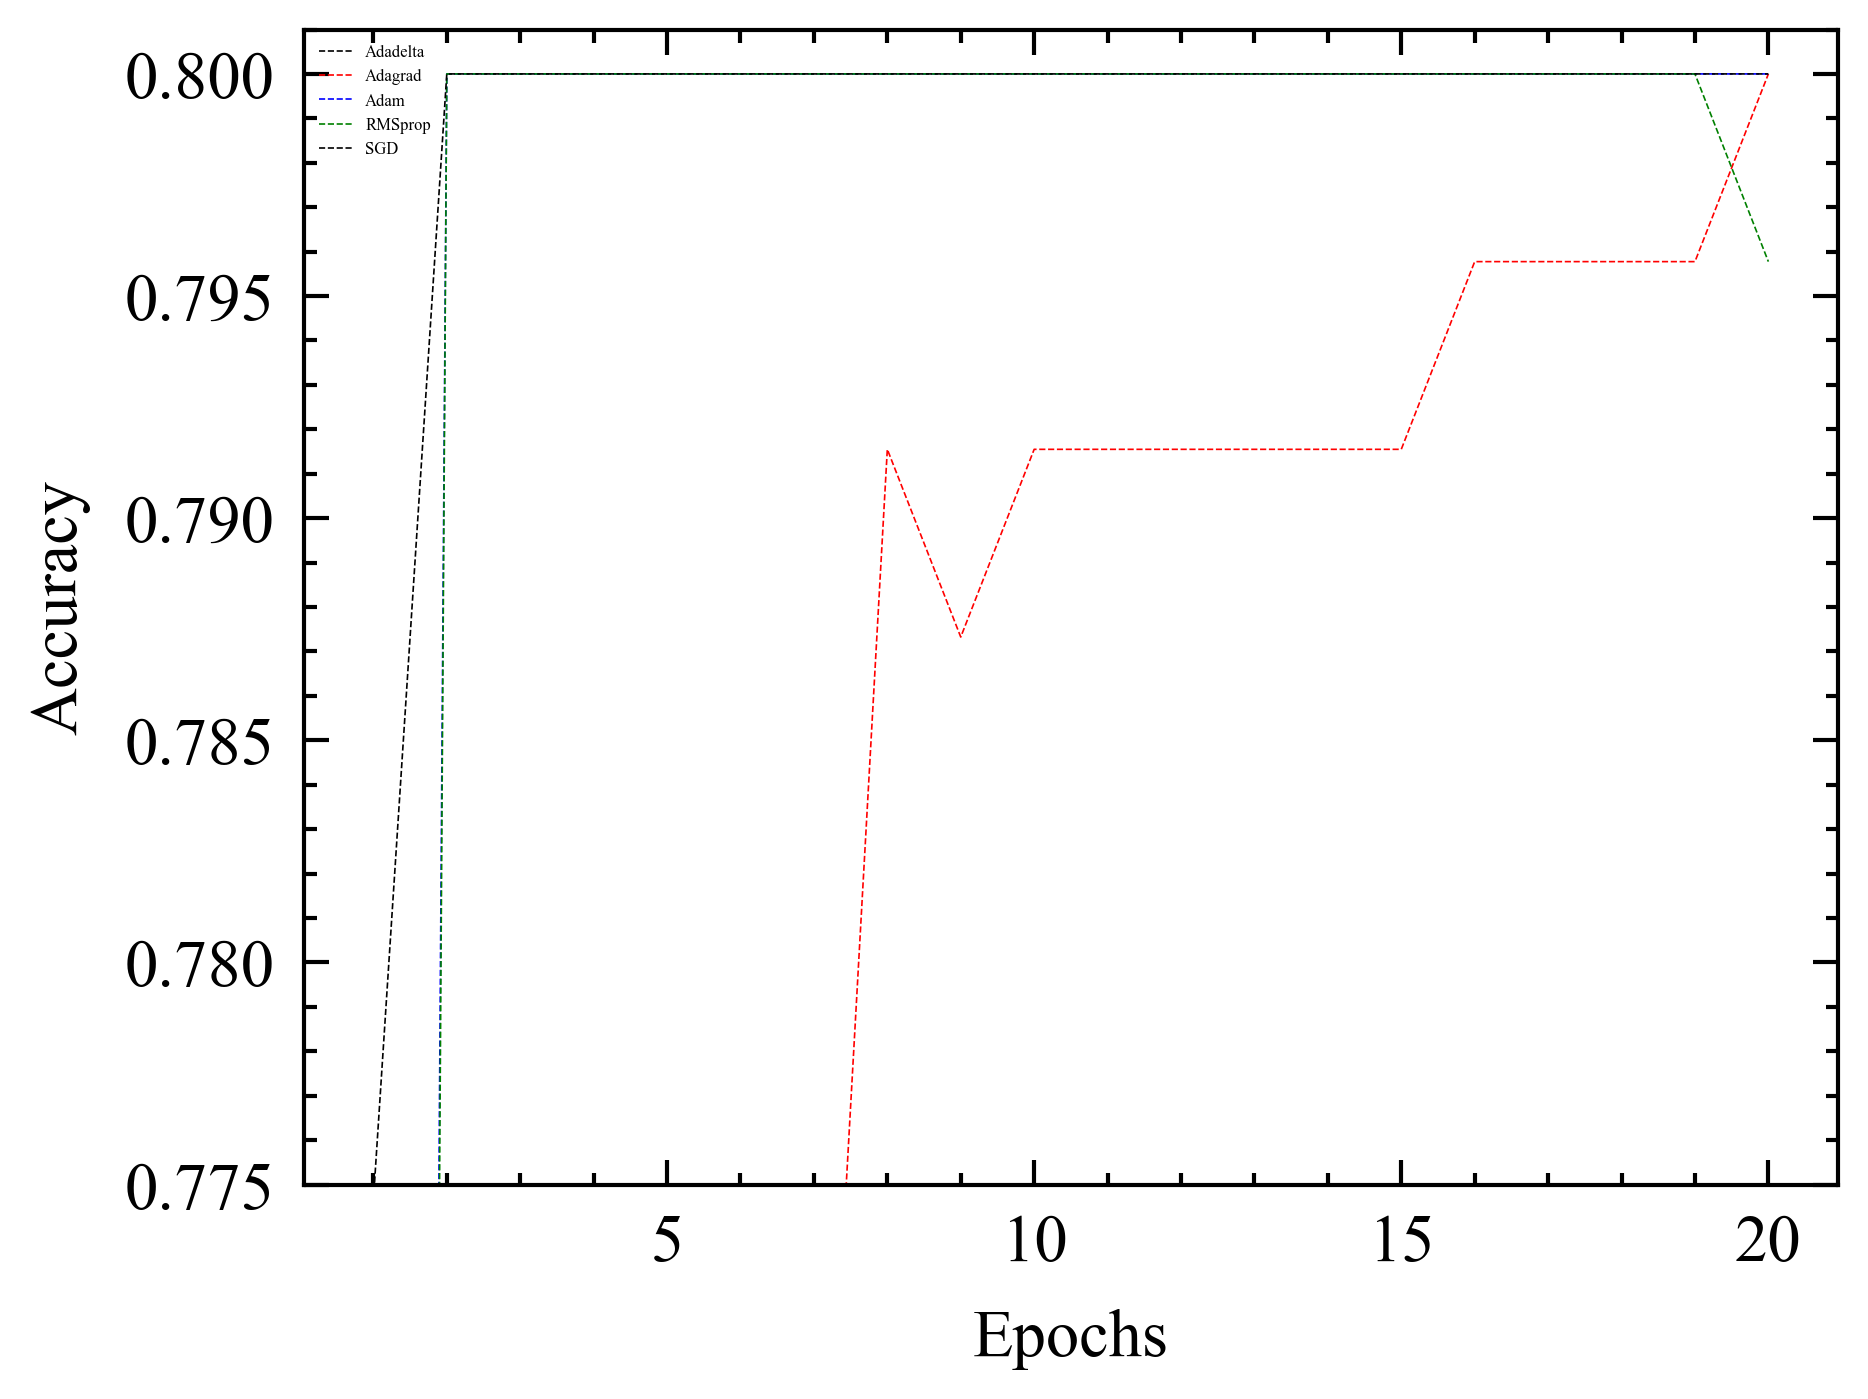

In [101]:
plt.plot(x, df_unpickle_al_bow_opt['accuracy'][0], '--', label = 'Adadelta', linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['accuracy'][1], '--', label = 'Adagrad',  linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['accuracy'][2], '--', label = 'Adam',  linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['accuracy'][3], '--', label = 'RMSprop', linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['accuracy'][4], '--', label = 'SGD',  linewidth = 0.2)
plt.legend(prop = {'size':2})
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.775, 0.801)
plt.show()

Text(0, 0.5, 'Accuracy')

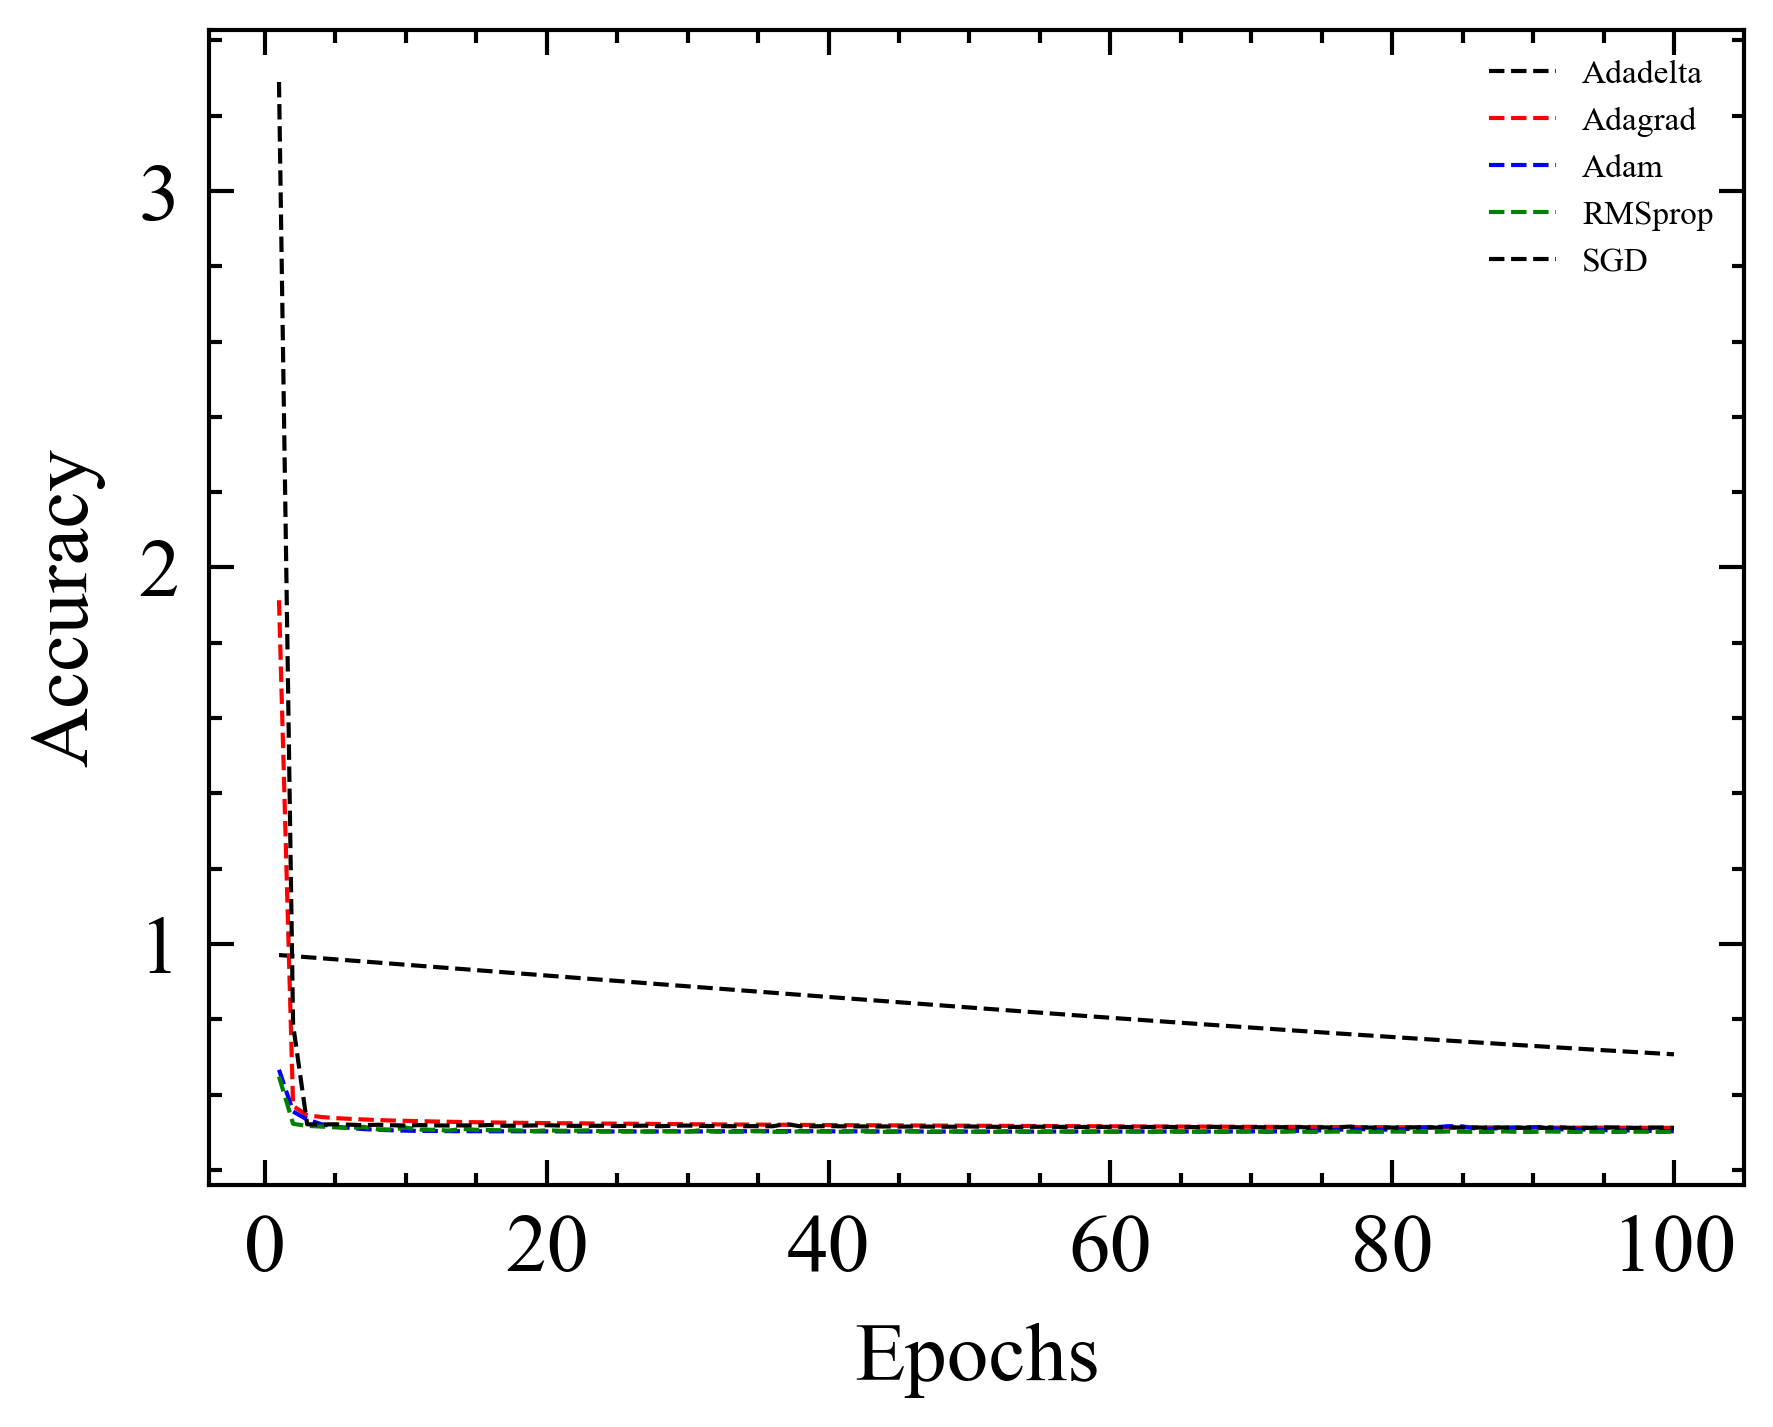

In [ ]:
plt.plot(x, df_unpickle_al_bow_opt['loss'][0], '--', label = 'Adadelta', linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['loss'][1], '--', label = 'Adagrad',  linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['loss'][2], '--', label = 'Adam',  linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['loss'][3], '--', label = 'RMSprop', linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['loss'][4], '--', label = 'SGD',  linewidth = 0.2)
plt.legend(prop = {'size':2})
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

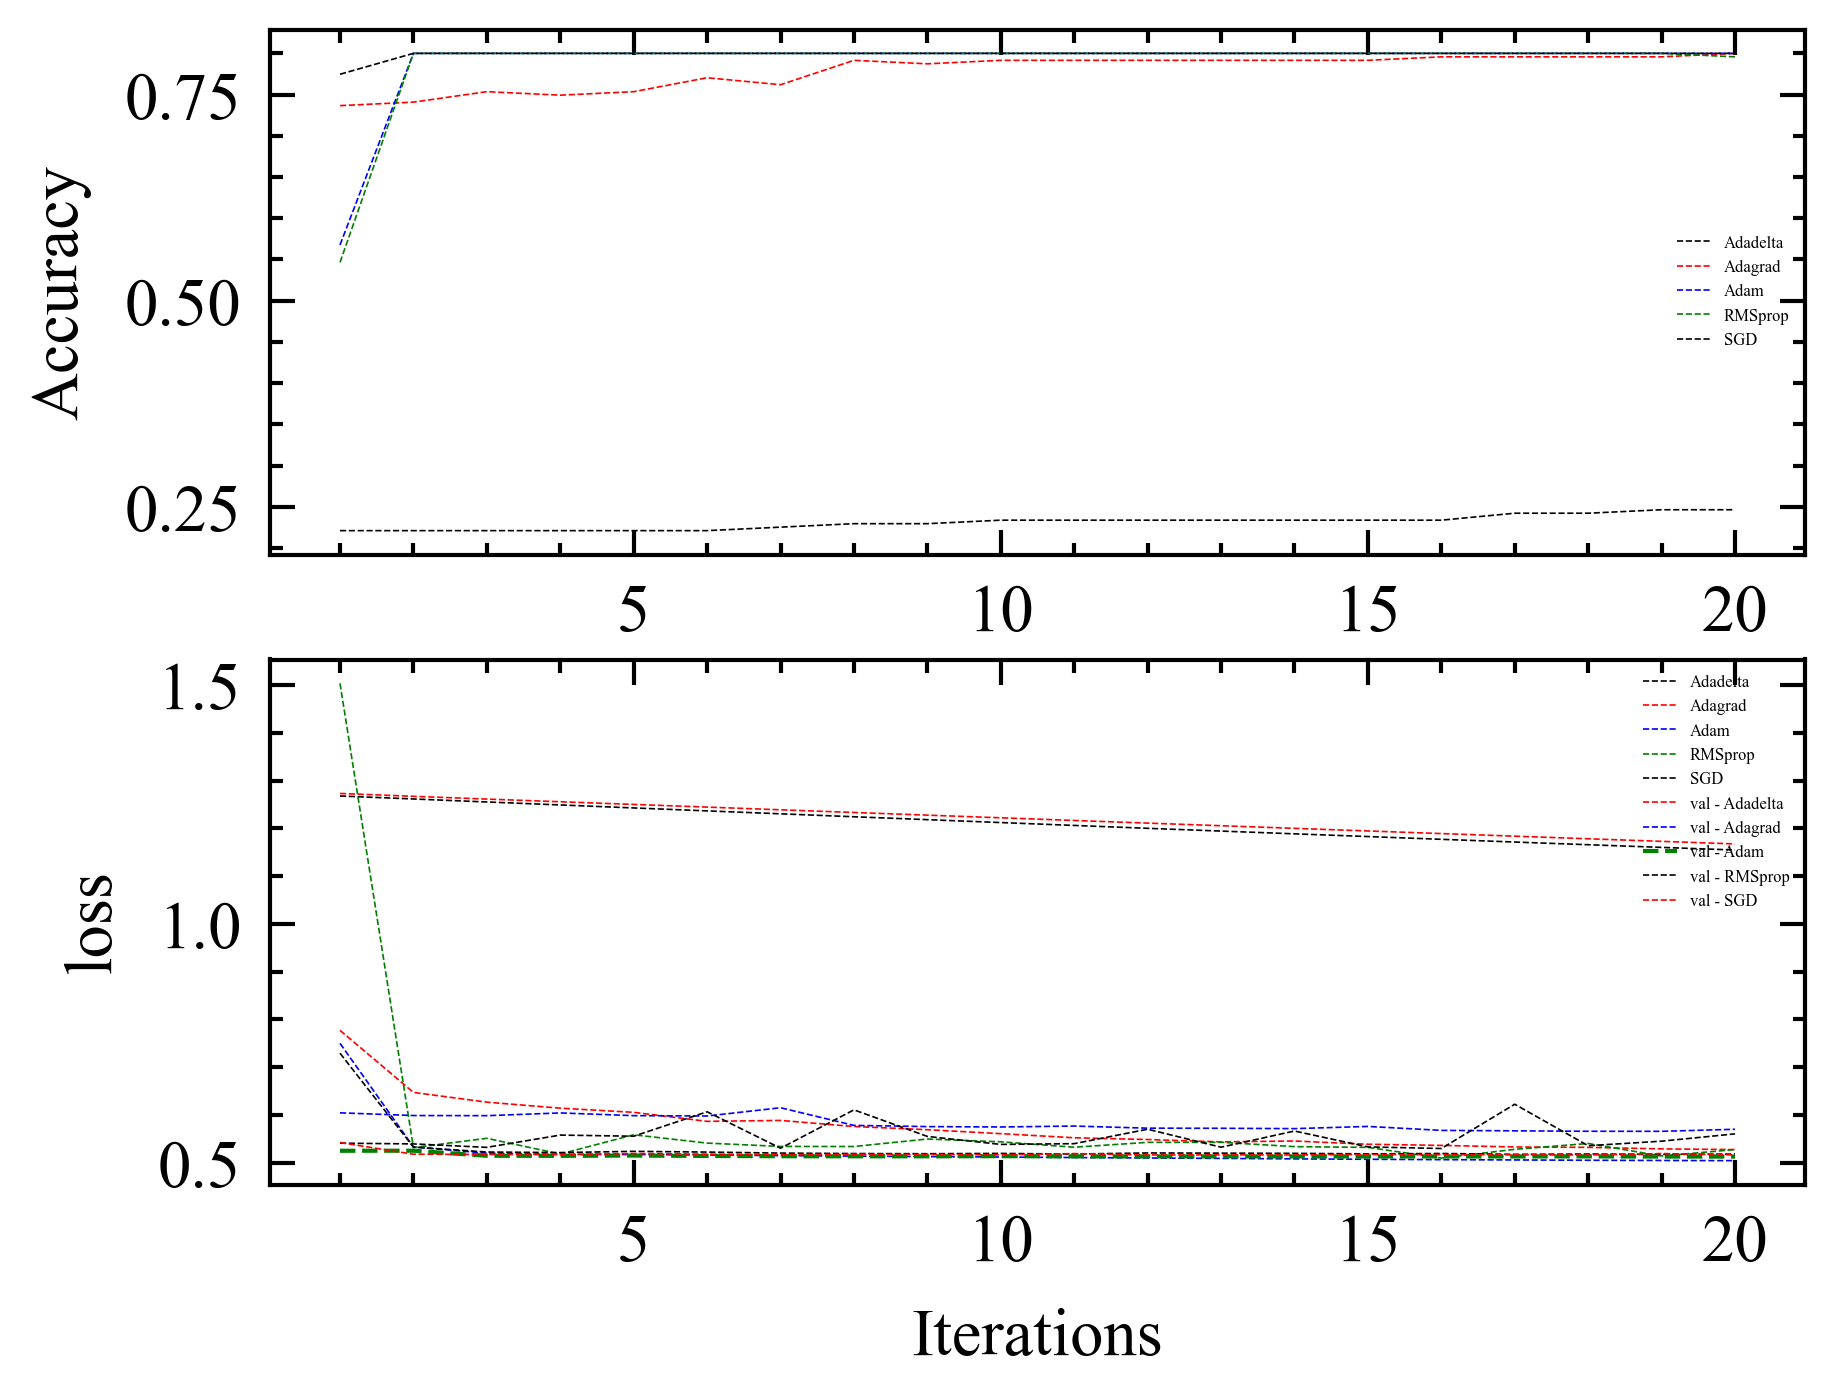

In [104]:
# Subplots of accuracy and loss graphs 
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(x, df_unpickle_al_bow_opt['accuracy'][0], '--', label = 'Adadelta', linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['accuracy'][1], '--', label = 'Adagrad',  linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['accuracy'][2], '--', label = 'Adam',  linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['accuracy'][3], '--', label = 'RMSprop', linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['accuracy'][4], '--', label = 'SGD',  linewidth = 0.2)
#plt.ylim(0.775, 0.801)
plt.legend( prop = {'size':2})
plt.ylabel('Accuracy')
plt.xlabel('Iterations')


plt.subplot(2,1,2)
plt.plot(x, df_unpickle_al_bow_opt['loss'][0], '--', label = 'Adadelta', linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['loss'][1], '--', label = 'Adagrad',  linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['loss'][2], '--', label = 'Adam',  linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['loss'][3], '--', label = 'RMSprop', linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['loss'][4], '--', label = 'SGD',  linewidth = 0.2)

# validation loss 
plt.plot(x, df_unpickle_al_bow_opt['val_loss'][0], '--', label = 'val - Adadelta', linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['val_loss'][1], '--', label = 'val - Adagrad',  linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['val_loss'][2], '--', label = 'val - Adam',  linewidth = 0.5)
plt.plot(x, df_unpickle_al_bow_opt['val_loss'][3], '--', label = 'val - RMSprop', linewidth = 0.2)
plt.plot(x, df_unpickle_al_bow_opt['val_loss'][4], '--', label = 'val - SGD',  linewidth = 0.2)

#plt.ylim(0.4,1.0)
plt.legend(prop = {'size':2})
plt.ylabel('loss')
plt.xlabel('Iterations')


# plt.subplot(3,1,3)
# plt.plot(x, df_unpickle_al_bow_opt['val_loss'][0], '--', label = 'val - Adadelta', linewidth = 0.2)
# plt.plot(x, df_unpickle_al_bow_opt['val_loss'][1], '--', label = 'val - Adagrad',  linewidth = 0.2)
# plt.plot(x, df_unpickle_al_bow_opt['val_loss'][2], '--', label = 'val - Adam',  linewidth = 0.5)
# plt.plot(x, df_unpickle_al_bow_opt['val_loss'][3], '--', label = 'val - RMSprop', linewidth = 0.2)
# plt.plot(x, df_unpickle_al_bow_opt['val_loss'][4], '--', label = 'val - SGD',  linewidth = 0.2)
# plt.ylim(0.4,1.5)
# plt.legend(prop = {'size':4})
# plt.ylabel(' Val loss')
# plt.xlabel('Iterations')

# plt.rcParams.update({'font.size': 10})
plt.show()

### Batch size investigation

In [121]:
def NN_batch(model1, input1, ephs, X_t, y_t, X_test, y_test, node1, node2, node3, bsize):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(node1, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(node2, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(node3 ,activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= 'Adam', metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=bsize)
    return history


Batchsize = [16,32,64,128,256]
def NN_data_batch(X, y,tsize, epoch_no, node1, node2, node3, batch_sizes):
    accuracy = []
    loss     = []
    val_loss = []
    times    = []
    for i in batch_sizes:
        
        X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = tsize)
        input = X_train_b.shape[1] 
        start_time = time()
        nn1 = NN_batch(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b, node1, node2, node3, i)
        accuracy.append(nn1.history['accuracy'])
        loss.append(nn1.history['loss'])
        val_loss.append(nn1.history['val_loss'])
        times.append(time()- start_time)

    dictionary = {'accuracy':accuracy, 'loss': loss, 'val_loss':val_loss, 'batch': batch_sizes, 'times':times}
    df = pd.DataFrame(dictionary)
    return df

In [112]:
Batchsize = [10,20,30,40]
Batchsize2 = [28,30,32,34,36]
df_bow_al_batch = NN_data_batch(X_y1y2_bow_al, y_y1y2_bow_al,0.8, 20, 12, 8, 1, Batchsize2)

Model: "sequential_95"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_285 (Dense)           (None, 12)                90768     
                                                                 
 dense_286 (Dense)           (None, 8)                 104       
                                                                 
 dense_287 (Dense)           (None, 1)                 9         
                                                                 
 flatten_95 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6/6 [==============================] - 1s 63ms/step - loss: 1.9320 - accuracy: 0.5803 - val_loss: 1.1764 - val_accuracy: 0.8000
Epoch 2/20
6/6 [==========================

In [113]:
df_pickle_bow_al_batch = utils.save_as_pickle_file(df_bow_al_batch,'NN_investigations_y1y2_20epochs_batch_investigation_new', dir_name_e)

In [118]:
df_unpickle_bow_al_batch= utils.load_pickle_file_to_df('NN_investigations_y1y2_20epochs_batch_investigation_new', dir_name_e)

In [120]:
x2 = df_unpickle_bow_al_batch['accuracy']
print(x2)

0    [0.580281674861908, 0.7957746982574463, 0.6394...
1    [0.7323943376541138, 0.7661972045898438, 0.766...
2    [0.7112675905227661, 0.783098578453064, 0.8000...
3    [0.5718310475349426, 0.7915493249893188, 0.698...
4    [0.7788732647895813, 0.7957746386528015, 0.800...
Name: accuracy, dtype: object


Text(0.5, 0, 'Iterations')

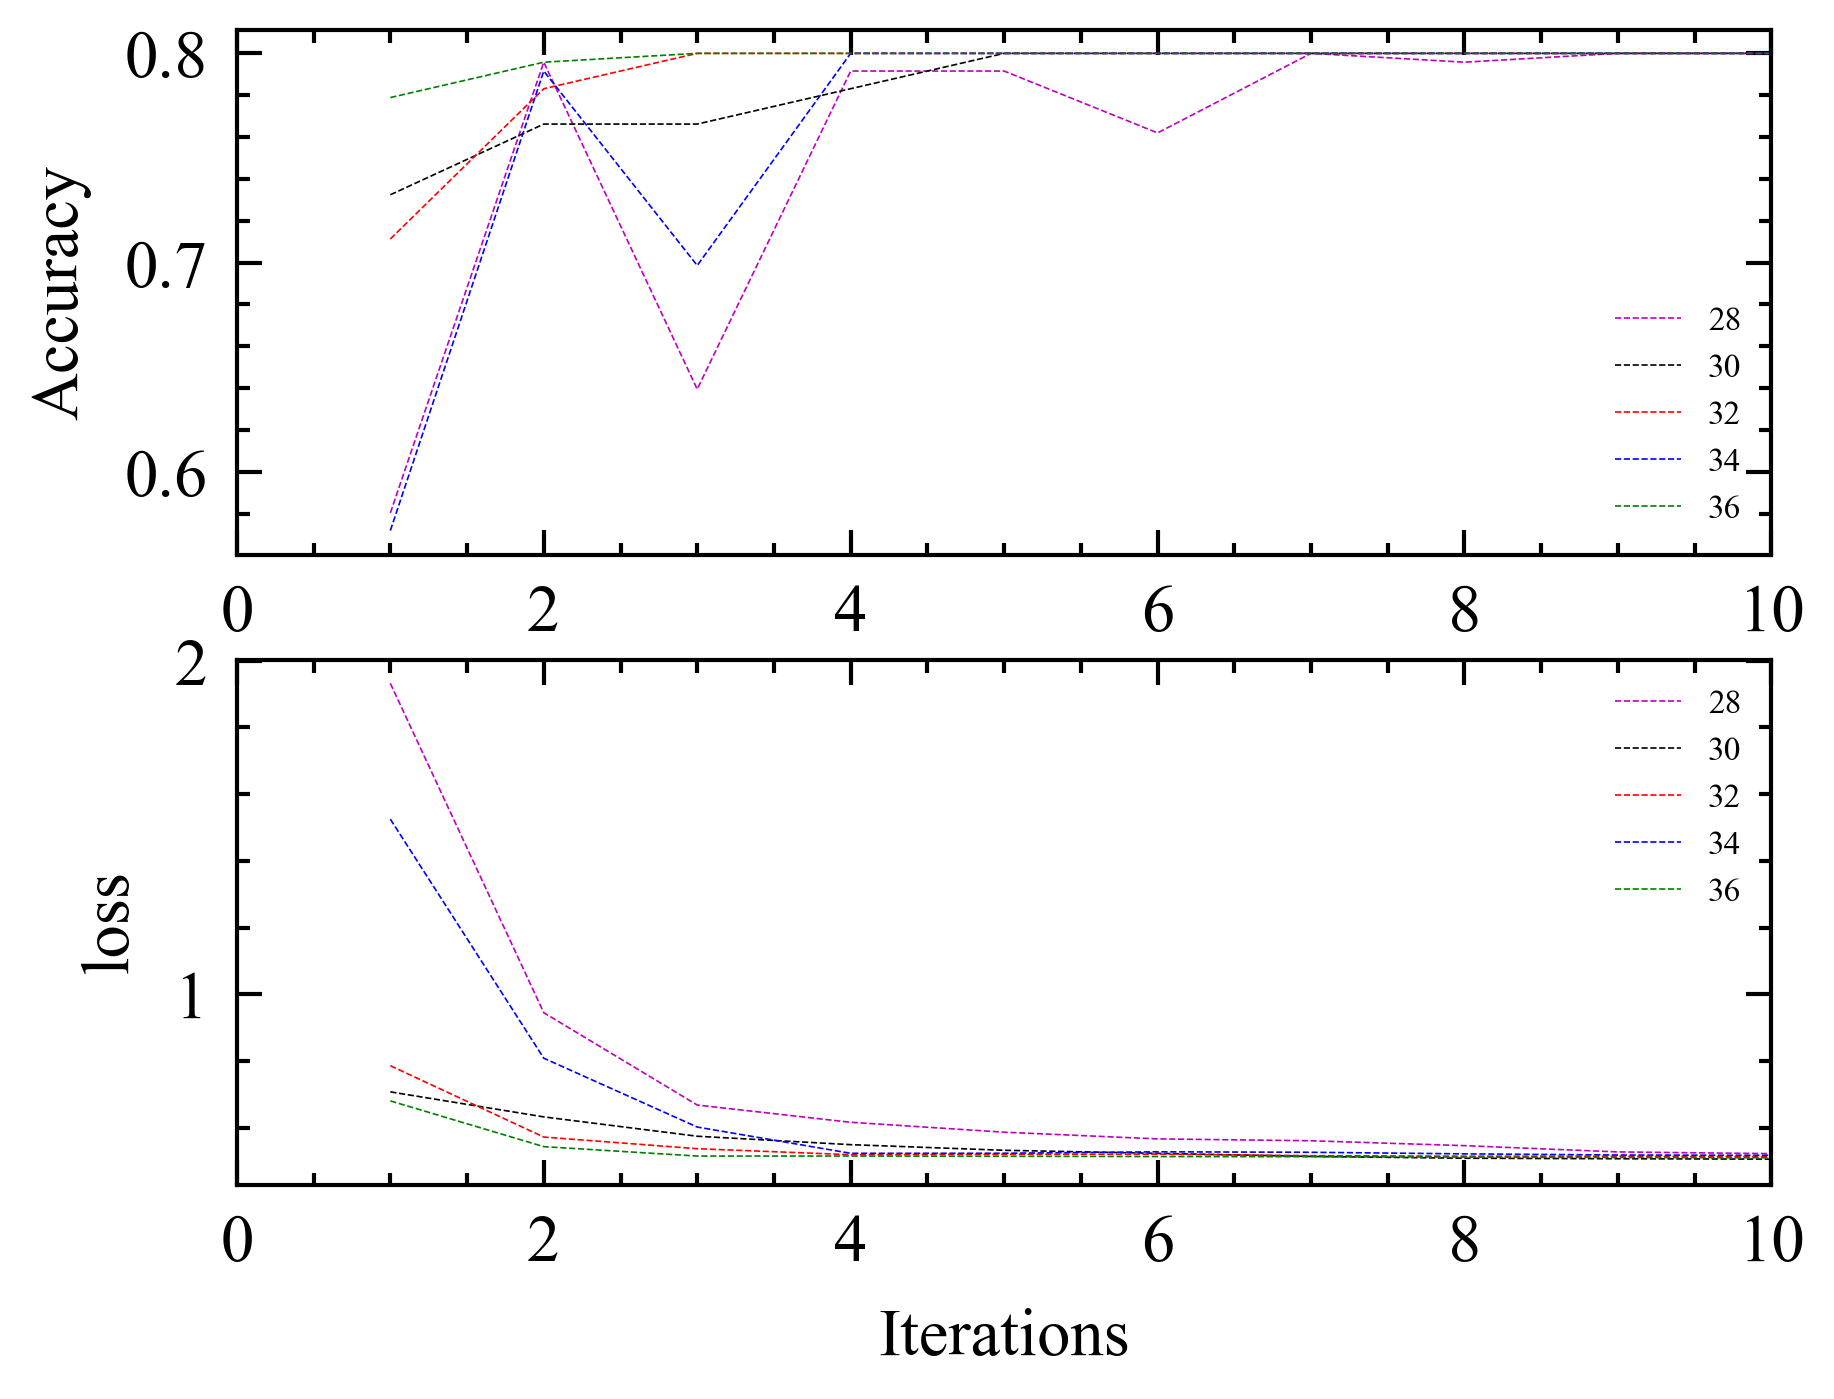

In [122]:
# Subplots of accuracy and loss graphs 
x = np.linspace(1,20,20)
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(x, df_unpickle_bow_al_batch['accuracy'][0], '--', label = '28', linewidth = 0.2, c = 'm')
plt.plot(x, df_unpickle_bow_al_batch['accuracy'][1], '--', label = '30',  linewidth = 0.2)
plt.plot(x, df_unpickle_bow_al_batch['accuracy'][2], '--', label = '32',  linewidth = 0.2)
plt.plot(x, df_unpickle_bow_al_batch['accuracy'][3], '--', label = '34', linewidth = 0.2)
plt.plot(x, df_unpickle_bow_al_batch['accuracy'][4], '--', label = '36', linewidth = 0.2)
#plt.ylim(0.5,0.85)
plt.xlim(0,10)
plt.legend( prop = {'size':4})
plt.ylabel('Accuracy')
plt.xlabel('Iterations')


plt.subplot(2,1,2)
plt.plot(x, df_unpickle_bow_al_batch['loss'][0], '--', label = '28', linewidth = 0.2, c = 'm')
plt.plot(x, df_unpickle_bow_al_batch['loss'][1], '--', label = '30',  linewidth = 0.2)
plt.plot(x, df_unpickle_bow_al_batch['loss'][2], '--', label = '32',  linewidth = 0.2)
plt.plot(x, df_unpickle_bow_al_batch['loss'][3], '--', label = '34', linewidth = 0.2)
plt.plot(x, df_unpickle_bow_al_batch['loss'][4], '--', label = '36', linewidth = 0.2)
#plt.ylim(0,2)
plt.xlim(0,10)
plt.legend(prop = {'size':4})
plt.ylabel('loss')
plt.xlabel('Iterations')


Text(0.5, 0, 'Batchsize')

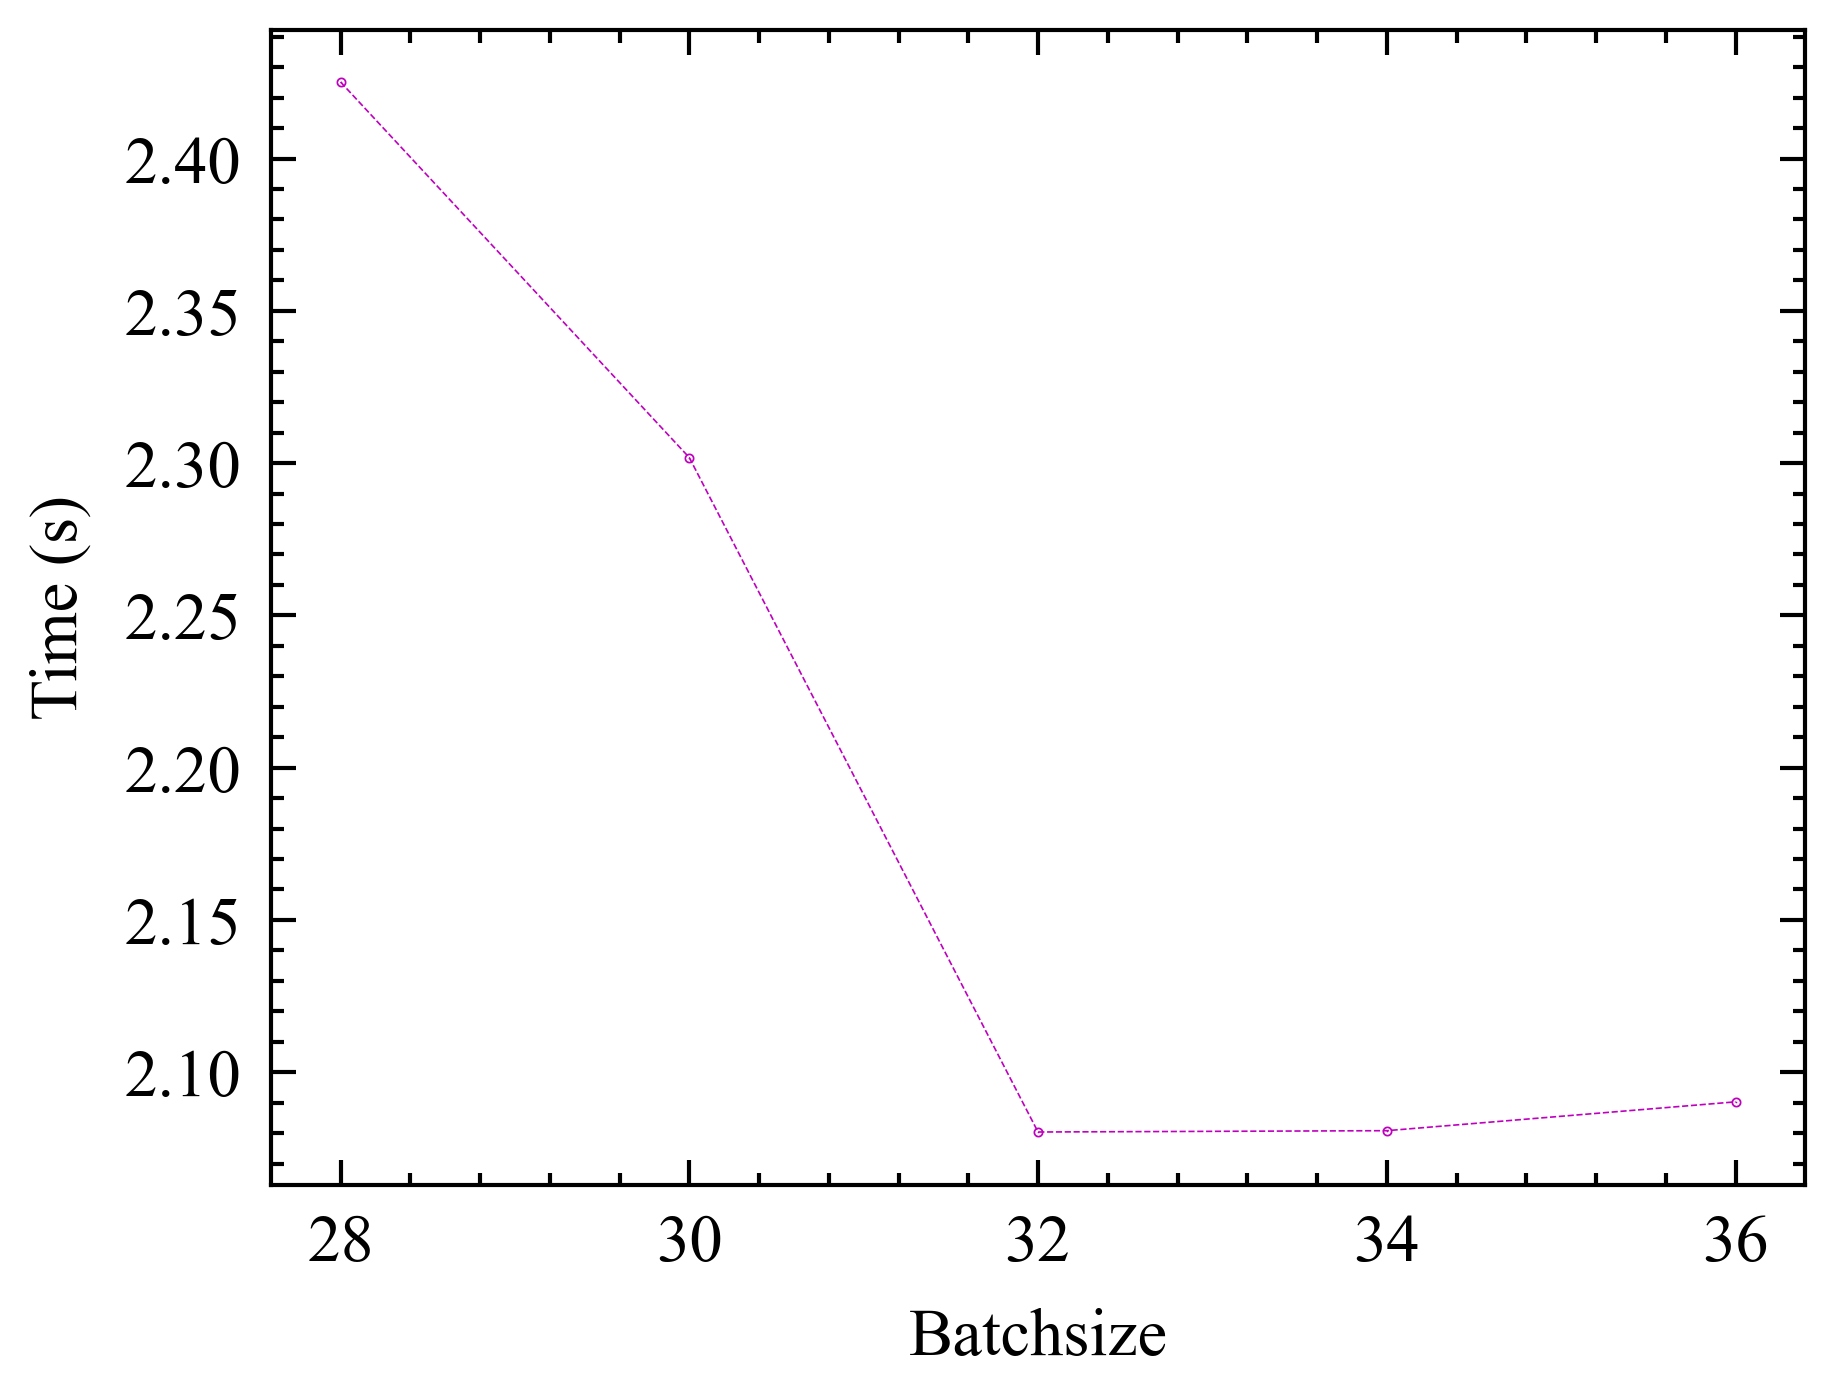

In [131]:
x2 = ['28','30','32','34','36']
plt.plot(x2, df_unpickle_bow_al_batch['times'], '--', linewidth = 0.2, c = 'm')
plt.plot(x2, df_unpickle_bow_al_batch['times'], 'o', markersize = 0.2, c = 'm')
plt.ylabel('Time (s)')
plt.xlabel('Batchsize')

### Learning rate

In [59]:
# have to build new NN as I do not want to mix keras and tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

In [62]:

def NN_opt(model1, input1, ephs, X_t, y_t, X_test, y_test, node1, node2, node3,lrate):
    maxlen = 100 
    model = model1
    model.add(Dense(node1, input_dim = input1, activation  = 'relu'))
    model.add(Dense(node2, input_dim = input1, activation  = 'relu'))
    model.add(Dense(node3,  activation = 'sigmoid'))
    model.add(layers.Flatten())
    opt = Adam(learning_rate= lrate)
    model.compile(loss= 'binary_crossentropy', optimizer= opt, metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=30 )

    return history


# optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
# def NN_data_opt(X, y, tsize, epoch_no, node1, node2, node3, opt):
#     accuracy = []
#     loss     = []
#     val_loss = []
#     for i in opt:
#         X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = tsize)
#         input = X_train_b.shape[1] 
#         nn1 = NN_opt(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b, node1, node2, node3, i)
#         accuracy.append(nn1.history['accuracy'])
#         loss.append(nn1.history['loss'])
#         val_loss.append(nn1.history['val_loss'])
#     dictionary = {'accuracy':accuracy, 'loss': loss, 'val_loss':val_loss}
#     df = pd.DataFrame(dictionary)
#     return df

In [61]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_y1y2_bow_al, y_y1y2_bow_al, train_size = 0.8)
print(X_train_b.shape[1])
type(X_train_b.shape[1])

7563


int

In [63]:

learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

lr_array = []
for i in range(len(learning_rates)):
    lr = NN_opt(Sequential(), X_train_b.shape[1], 100, X_train_b, y_train_b, X_test_b, y_test_b, 12, 8, 1, i)
    lr_array.append(lr)

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_216 (Dense)           (None, 12)                90768     
                                                                 
 dense_217 (Dense)           (None, 8)                 104       
                                                                 
 dense_218 (Dense)           (None, 1)                 9         
                                                                 
 flatten_72 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 1s 76ms/step - loss: 1.0987 - accuracy: 0.8000 - val_loss: 1.1515 - val_accuracy: 0.8000
Epoch 2/100
5/5 [========================

In [91]:
from scipy.stats import sem
average_acc = []
std        = []

for i in range(len(lr_array)):
    acc = lr_array[i].history['accuracy']
    dummy_acc = []
    
    for val in acc:
        dummy_acc.append(val)
    
    acc = np.sum(dummy_acc)/len(dummy_acc)
    error2  = np.std(dummy_acc)
    average_acc.append(acc)
    std.append(error2)

average_acc = np.flip(average_acc)
print(average_acc)
print(learning_rates)


[0.20126762 0.20126762 0.79873247 0.20126762 0.79873247 0.79873247
 0.79919725 0.80000007]
[1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07]


Text(0, 0.5, ' Accuracy')

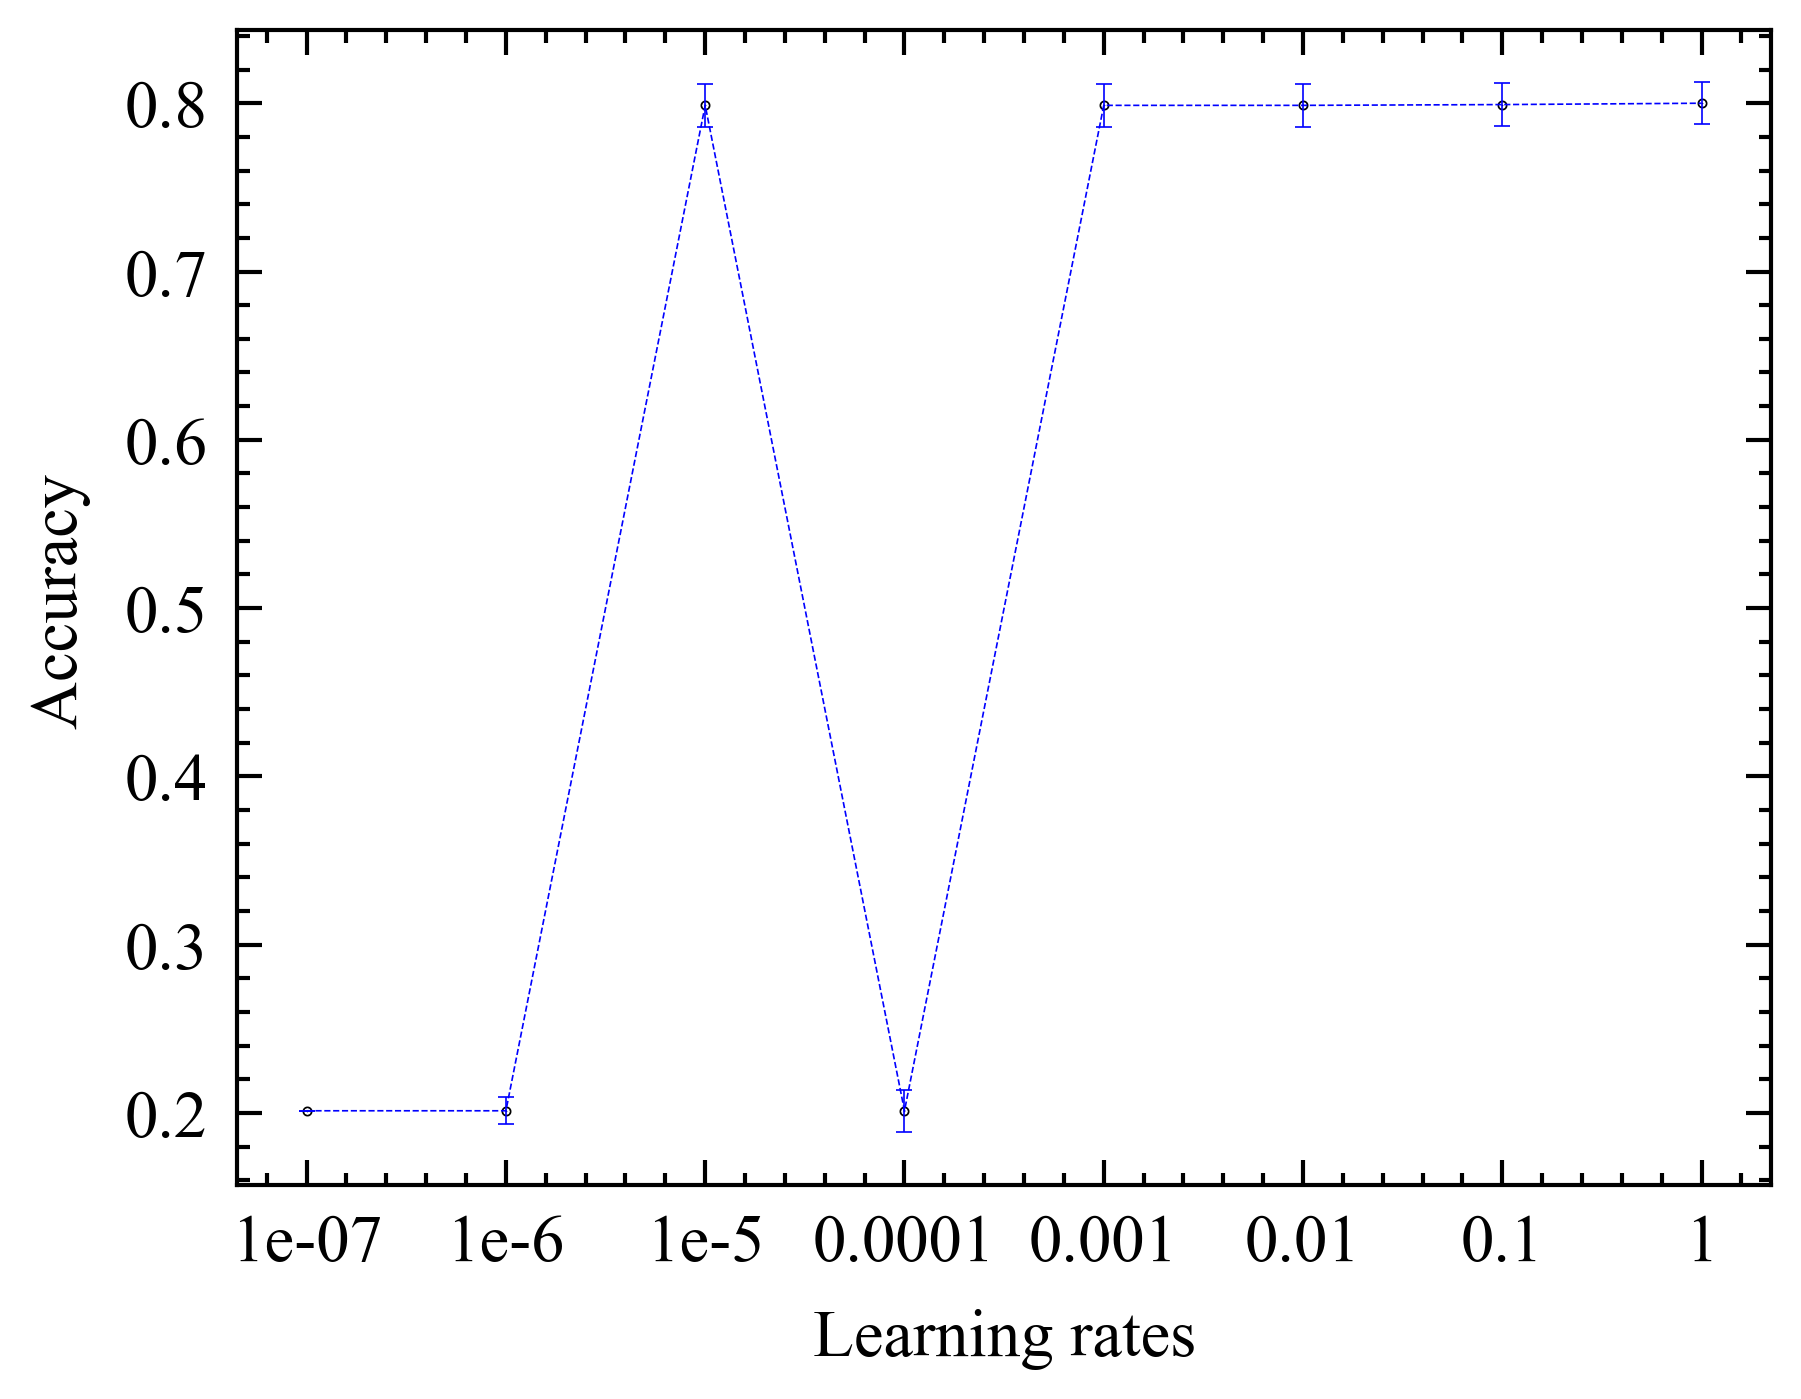

In [93]:
learning_rates = ['1e-07', '1e-6', '1e-5','0.0001','0.001', '0.01', '0.1','1']

plt.plot(learning_rates, average_acc,'o',  markersize = 0.2)
plt.errorbar(learning_rates, average_acc, yerr= std, linewidth = 0.2, capsize = 1, capthick=0.2, c = 'b')
plt.xlabel('Learning rates')
plt.ylabel(' Accuracy')

# 4. Bayesian Optimisation

###### Code reference: https://www.analyticsvidhya.com/blog/2021/05/tuning-the-hyperparameters-and-layers-of-neural-network-deep-learning/

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [ ]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y_y1y2_bow_al)
y_y1y2_bow_al = np.argmax(y_y1y2_bow_al, axis = 1)
#print(y_y1y2_bow_al)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_y1y2_bow_al, y_y1y2_bow_al , train_size = 0.7, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8

In [ ]:
# Create function
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim= 7563, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    
    
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn,X_train, y_train,  scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [ ]:
params_nn2 ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
    
}

In [ ]:
# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 89ms/step
| 1         | 0.1076    | 5.51      | 335.3     | 0.4361    | 0.2308    | 43.63     | 1.298     | 1.045     | 0.426     | 31.48     | 0.3377    | 6.935     |
1/1 [==============================] - 0s 138ms/step
| 2         | 0.1076    | 2.14      | 265.0     | 0.6696    | 0.1864    | 41.94     | 1.932     | 1.237     | 0.08322   | 91.07     | 0.794     | 5.884     |
1/1 [==============================] - 0s 80ms/step
| 3         | 0.1825    | 7.337     | 992.8     | 0.5773    | 0.2441    | 53.71     | 1.055     | 1.908     | 0.1143    | 83.55     | 0.6977    | 3.957     |
1/1 [==============================] - 0s 70ms/step
|

In [ ]:
params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
               'elu', 'exponential', LeakyReLU,'relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','Adam']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

{'activation': 'exponential',
 'batch_size': 993,
 'dropout': 0.5772738296076794,
 'dropout_rate': 0.2441300751109463,
 'epochs': 54,
 'layers1': 1,
 'layers2': 2,
 'learning_rate': 0.11427282446194219,
 'neurons': 84,
 'normalization': 0.6977277345956326,
 'optimizer': <keras.optimizers.optimizer_v2.adagrad.Adagrad at 0x159ad336ac0>}

In [ ]:
# Fitting Neural Network
def nn_cl_fun():
    nn = Sequential()
    nn.add(Dense(params_nn_['neurons'], input_dim=7563, activation=params_nn_['activation']))
    if params_nn_['normalization'] > 0.5:
        nn.add(BatchNormalization())
    for i in range(params_nn_['layers1']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    if params_nn_['dropout'] > 0.5:
        nn.add(Dropout(params_nn_['dropout_rate'], seed=123))
    for i in range(params_nn_['layers2']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=params_nn_['optimizer'], metrics=['accuracy'])
    return nn

es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
nn = KerasClassifier(build_fn=nn_cl_fun, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'],
                         verbose=0)


In [ ]:
nn2 = nn.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1)

Epoch 1/54
1/1 [==============================] - 1s 1s/step - loss: nan - accuracy: 0.1398 - val_loss: nan - val_accuracy: 0.0968
Epoch 2/54
1/1 [==============================] - 0s 50ms/step - loss: nan - accuracy: 0.1828 - val_loss: nan - val_accuracy: 0.0968
Epoch 3/54
1/1 [==============================] - 0s 50ms/step - loss: nan - accuracy: 0.1828 - val_loss: nan - val_accuracy: 0.0968
Epoch 4/54
1/1 [==============================] - 0s 61ms/step - loss: nan - accuracy: 0.1828 - val_loss: nan - val_accuracy: 0.0968
Epoch 5/54
1/1 [==============================] - 0s 52ms/step - loss: nan - accuracy: 0.1828 - val_loss: nan - val_accuracy: 0.0968
Epoch 6/54
1/1 [==============================] - 0s 49ms/step - loss: nan - accuracy: 0.1828 - val_loss: nan - val_accuracy: 0.0968
Epoch 7/54
1/1 [==============================] - 0s 48ms/step - loss: nan - accuracy: 0.1828 - val_loss: nan - val_accuracy: 0.0968
Epoch 8/54
1/1 [==============================] - 0s 45ms/step - loss: 

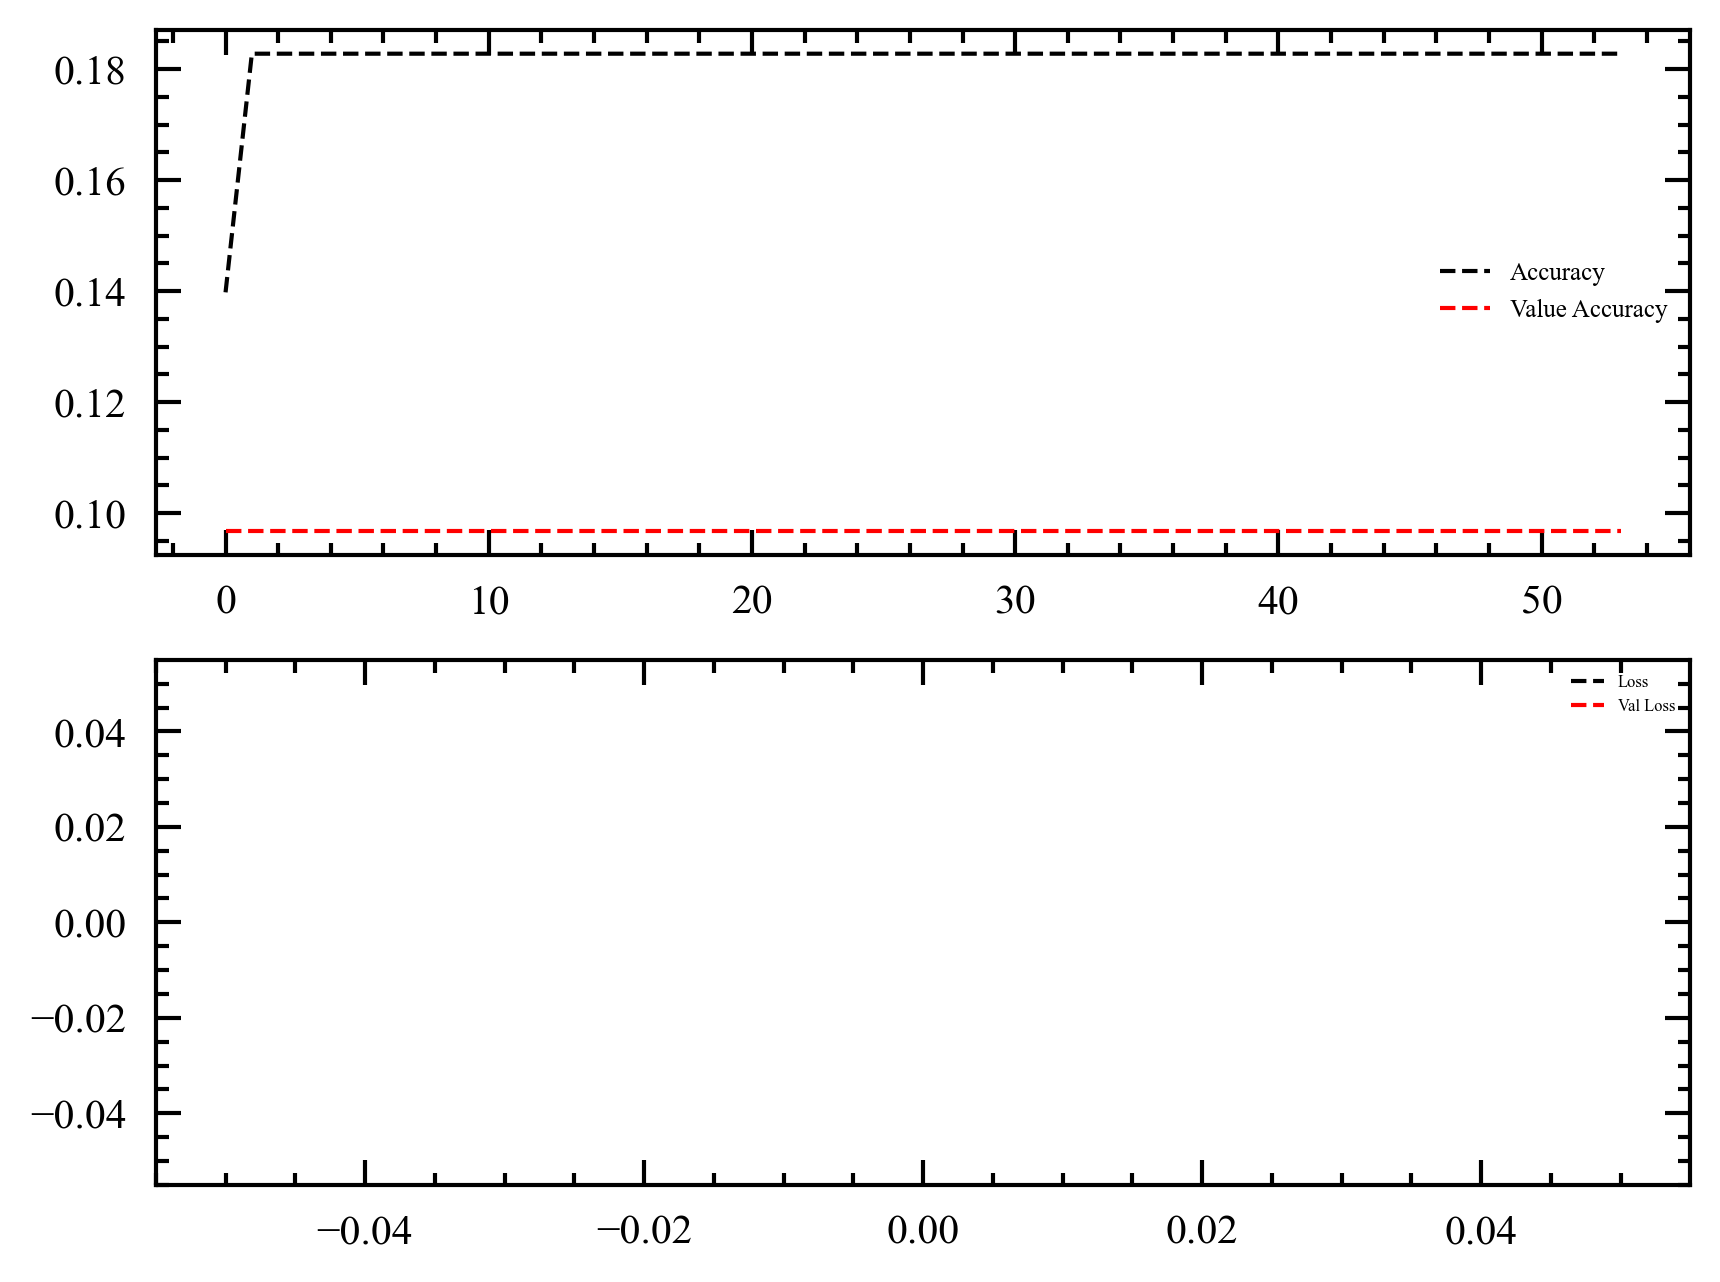

In [ ]:
plt.subplot(2,1,1)
plt.plot(nn2.history['accuracy'], '--', linewidth = 0.5, label = 'Accuracy')
plt.plot(nn2.history['val_accuracy'], '--', linewidth = 0.5, label = 'Value Accuracy')
plt.legend(prop = {'size':3})

plt.subplot(2,1,2)
plt.plot(nn2.history['loss'], '--', linewidth = 0.5, label = 'Loss')
plt.plot(nn2.history['val_loss'], '--', linewidth = 0.5, label = 'Val Loss')
plt.legend(prop = {'size':2})


# Finding the Best ANN hyperparameters using GridSearch CV

###### Code snippet adapted from: https://thinkingneuron.com/how-to-use-artificial-neural-networks-for-classification-in-python/

In [114]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [115]:
# Function to generate Deep ANN model

def NN_tune(Optimizer_Trial, Neurons_Trial):
    maxlen = 100 
    model = Sequential()
    model.add(layers.Dense(Neurons_Trial, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(Neurons_Trial, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(1 ,activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= Optimizer_Trial, metrics= ['accuracy'])
    #model.build(input1)
    #model.summary()
    #history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=bsize)
    return model
    


Batchsize = [16,32,64,128,256]
def NN_data_batch(X, y,tsize, epoch_no, node1, node2, node3, batch_sizes):
    accuracy = []
    loss     = []
    val_loss = []
    for i in batch_sizes:
        X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = tsize)
        input = X_train_b.shape[1] 
        nn1 = NN_batch(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b, node1, node2, node3, i)
        accuracy.append(nn1.history['accuracy'])
        loss.append(nn1.history['loss'])
        val_loss.append(nn1.history['val_loss'])
    dictionary = {'accuracy':accuracy, 'loss': loss, 'val_loss':val_loss, 'batch': batch_sizes}
    df = pd.DataFrame(dictionary)
    return df

In [116]:
# creating the Grid search space
# parameter trials

Parameter_Trials = { 'batch_size':[26,28,30,32,34],
                        'epochs':[5,10,20,30],
                        'Optimizer_Trial': ['adam', 'rmsprop', 'Adagrad'], 
                        'Neurons_Trial':[6,8,10,12,14]
                        }


In [117]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_y1y2_bow_al, y_y1y2_bow_al , train_size = 0.8)
input = X_train_b.shape[1]
# Function to generate Deep ANN model 
def make_classification_ann(Optimizer_Trial, Neurons_Trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    # Creating the classifier ANN model
    classifier = Sequential()
    classifier.add(Dense(units=Neurons_Trial, input_dim=input, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=Neurons_Trial, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer=Optimizer_Trial, loss='binary_crossentropy', metrics=['accuracy'])
            
    return classifier


In [118]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

classifier = KerasRegressor(build_fn = NN_tune)

C:\Users\EfiaA\AppData\Local\Temp\ipykernel_67444\2846688209.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasRegressor(build_fn = NN_tune)


In [119]:
grid_search = GridSearchCV(estimator=classifier, param_grid= Parameter_Trials)

In [120]:
#Measuring how much time it took to find the best params

import time
StartTime = time.time()

grid_search.fit(X_train_b, y_train_b)

EndTime = time.time()
print('############ Total time Taken:', round(EndTime-StartTime/60), 'Minutes #################')

# printing the best parameters
print('\n##### Best hyperparameters ####')
grid_search.best_params_


Epoch 1/5
5/5 [==============================] - 1s 10ms/step - loss: 0.7725 - accuracy: 0.6619
Epoch 2/5
5/5 [==============================] - 0s 9ms/step - loss: 0.5185 - accuracy: 0.8000
Epoch 3/5
5/5 [==============================] - 0s 9ms/step - loss: 0.5177 - accuracy: 0.8000
Epoch 4/5
5/5 [==============================] - 0s 4ms/step - loss: 0.5217 - accuracy: 0.8000
Epoch 5/5
2/2 [==============================] - 0s 4ms/step - loss: 0.5263 - accuracy: 0.8000
Epoch 1/5
5/5 [==============================] - 1s 3ms/step - loss: 1.3533 - accuracy: 0.5982
Epoch 2/5
5/5 [==============================] - 0s 4ms/step - loss: 0.5219 - accuracy: 0.8000
Epoch 3/5
5/5 [==============================] - 0s 5ms/step - loss: 0.5428 - accuracy: 0.8000
Epoch 4/5
5/5 [==============================] - 0s 6ms/step - loss: 0.5536 - accuracy: 0.8000
Epoch 5/5
2/2 [==============================] - 0s 5ms/step - loss: 0.5356 - accuracy: 0.8000
Epoch 1/5
5/5 [==============================] - 

{'Neurons_Trial': 12,
 'Optimizer_Trial': 'rmsprop',
 'batch_size': 30,
 'epochs': 20}

# Optimised Neural Network results 

In [124]:
def NN_invest(model1, input1, ephs, X_t, y_t, X_test, y_test, node1, node2, node3, opt,bsize):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(node1, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(node2, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(node3 ,activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= opt , metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=bsize )
    return history



def NN_data_invest(X, y, tsize,  epoch_no, node1, node2, node3, opt, bsize):
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = tsize )
    input = X_train_b.shape[1] 
    nn1 = NN_invest(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b, node1, node2, node3, opt, bsize)
    return pd.DataFrame(nn1.history)


In [125]:
optimised_al_bow = NN_data_invest(X_y1y2_bow_al,y_y1y2_bow_al , 0.8,  20, 12, 8, 1, 'Rmsprop', 30)

Model: "sequential_1524"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4572 (Dense)          (None, 12)                90768     
                                                                 
 dense_4573 (Dense)          (None, 8)                 104       
                                                                 
 dense_4574 (Dense)          (None, 1)                 9         
                                                                 
 flatten_1524 (Flatten)      (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 2s 94ms/step - loss: 0.5527 - accuracy: 0.8000 - val_loss: 0.5224 - val_accuracy: 0.8000
Epoch 2/20
5/5 [========================

In [126]:
df_optimised_bow_al = utils.save_as_pickle_file(optimised_al_bow,'optimised_al_bow_y1y2_20ephs_12_8_1', dir_name_e)
df_unpickle_optimised_bow_al = utils.load_pickle_file_to_df('optimised_al_bow_y1y2_20ephs_12_8_1', dir_name_e)

<AxesSubplot: >

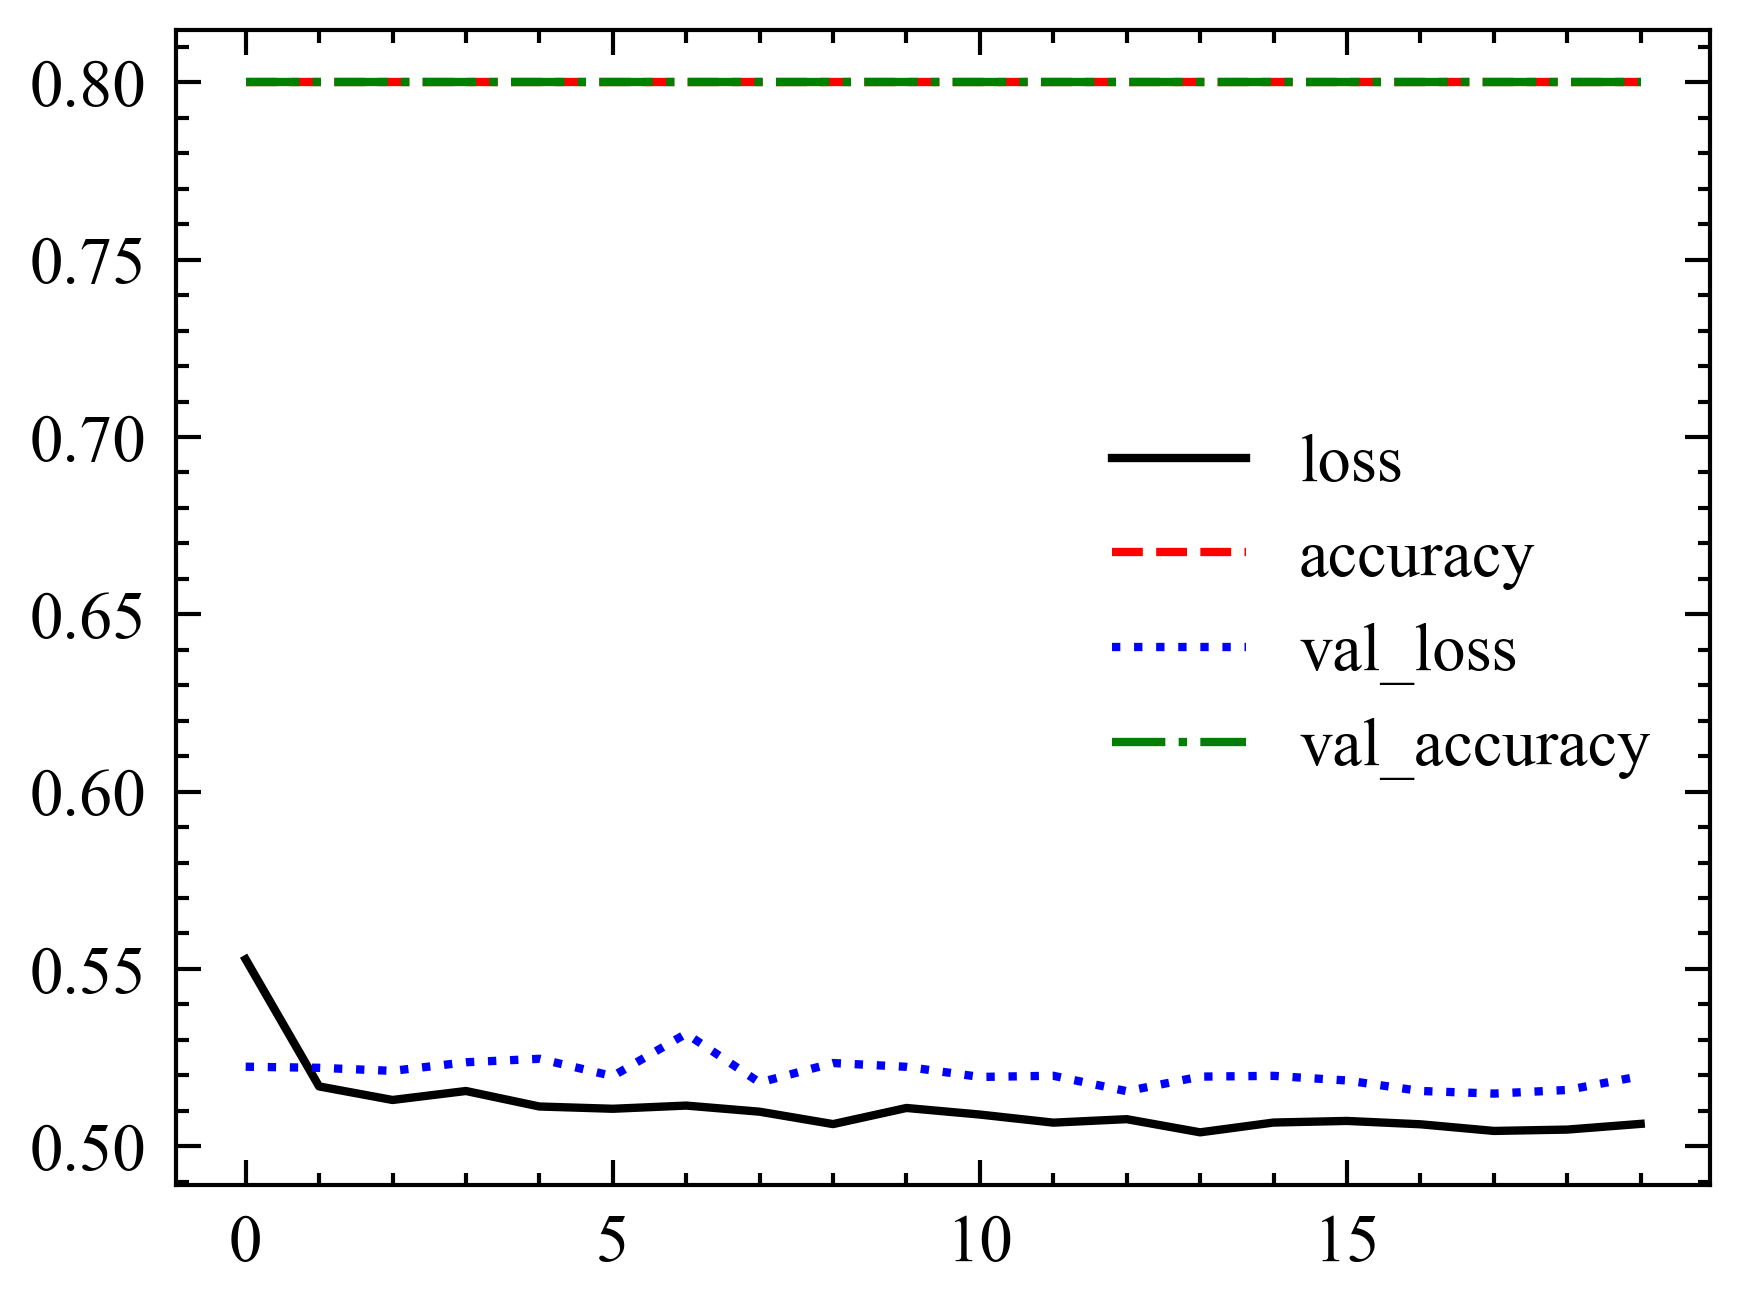

In [129]:
df_unpickle_optimised_bow_al.plot.line()

# Optimised y1y2 results 

In [23]:
def NN(model1, input1, ephs, X_t, y_t, X_test, y_test):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(12, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(8, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= 'rmsprop', metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=30 )
    return history



def NN_data(X, y,t_size,epoch_no, str_dataname,str_featext, str_year, dir):
    accuracies = []
    accuracies_sem = []
    loss = []
    val_loss = []
    dummy = []
    dummy_loss = []
    dummy_val_loss = []
    for i in t_size:
        X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = i)
        input = X_train_b.shape[1]
        #input = len(y_train_b)
        nn1 = NN(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b)
        dummy.append(nn1.history['accuracy'])
        dummy_loss.append(nn1.history['loss'])
        dummy_val_loss.append(nn1.history['loss'])


    for array in dummy:
        accuracies.append(np.sum(array)/len(array))
        accuracies_sem.append(sem(array))
    
    for array in dummy_loss:
        loss.append(np.sum(array)/len(array))
    
    for array in dummy_val_loss:
        val_loss.append(np.sum(array)/len(array))

    dict_rl = {'trainsize':t_size, 'accuracy':accuracies, 'sem': accuracies_sem, 'loss':loss, 'valloss': val_loss}
    acc_rl_bow = pd.DataFrame(dict_rl)
    utils.save_as_pickle_file(acc_rl_bow,'NN_{}_{}_{}_{}ephs_recent'. format(str_year, str_featext,str_dataname,'20'), dir)
    #name = 'NN_{}_{}_trainsize_accuracy_sem_{}ephs_{}'. format(str_dataname,str_featext,'20', str_year)
    return acc_rl_bow

In [27]:
ephs = 20 #no of epochs 
train_sizes = [0.5,0.6,0.7,0.8,0.9] 


# train nn for: Epistemology (reasoning level) data - tfidf - y1y2
opt_data_tf_rl = NN_data(X_y1y2_tf_rl, y_y1y2_tf_rl,train_sizes,ephs, 'EPISTEMOLOGY', 'TFIDF', 'y1y2', dir_name_e )

# train nn for: Epistemology (reasoning level) data - bow - y1y2
opt_data_bow_rl = NN_data(X_y1y2_bow_rl, y_y1y2_bow_rl, train_sizes, ephs, 'EPISTEMOLOGY', 'BOW', 'y1y2', dir_name_e )

# train nn for: Argument Level data - bow - y1y2
opt_data_bow_rl = NN_data(X_y1y2_bow_al, y_y1y2_bow_al, train_sizes, ephs, 'ARGUMENTLEVEL', 'BOW', 'y1y2', dir_name_e)

# train nn for Argument level data - tfidf - y1y2
opt_data_tf_rl = NN_data(X_y1y2_tf_al, y_y1y2_tf_al, train_sizes, ephs, 'ARGUMENTLEVEL', 'TFIDF', 'y1y2', dir_name_e)

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_156 (Dense)           (None, 12)                90768     
                                                                 
 dense_157 (Dense)           (None, 8)                 104       
                                                                 
 dense_158 (Dense)           (None, 1)                 9         
                                                                 
 flatten_52 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
3/3 [==============================] - 1s 152ms/step - loss: 0.6842 - accuracy: 0.7500 - val_loss: 0.6680 - val_accuracy: 0.7500
Epoch 2/20
3/3 [=========================

In [29]:
# Load pickled files 


# NN Dataframe: Epistemology - tfidf
df_unpic_opt_tf_rl = utils.load_pickle_file_to_df('NN_y1y2_TFIDF_EPISTEMOLOGY_20ephs_recent', dir_name_e)

# NN Dataframe: Epistemoogy - bow
df_unpic_opt_bow_rl = utils.load_pickle_file_to_df('NN_y1y2_BOW_EPISTEMOLOGY_20ephs_recent', dir_name_e)

# NN Dataframe: Argument level - bow 
df_unpic_opt_bow_al = utils.load_pickle_file_to_df('NN_y1y2_BOW_ARGUMENTLEVEL_20ephs_recent', dir_name_e)

# NN Dataframe: Argument level - tfidf
df_unpic_opt_tf_al = utils.load_pickle_file_to_df('NN_y1y2_TFIDF_ARGUMENTLEVEL_20ephs_recent', dir_name_e)


In [31]:
print(df_unpic_opt_tf_rl['accuracy'])

0    0.750000
1    0.743396
2    0.750000
3    0.744718
4    0.747656
Name: accuracy, dtype: float64


Text(0.5, 0, 'trainsize')

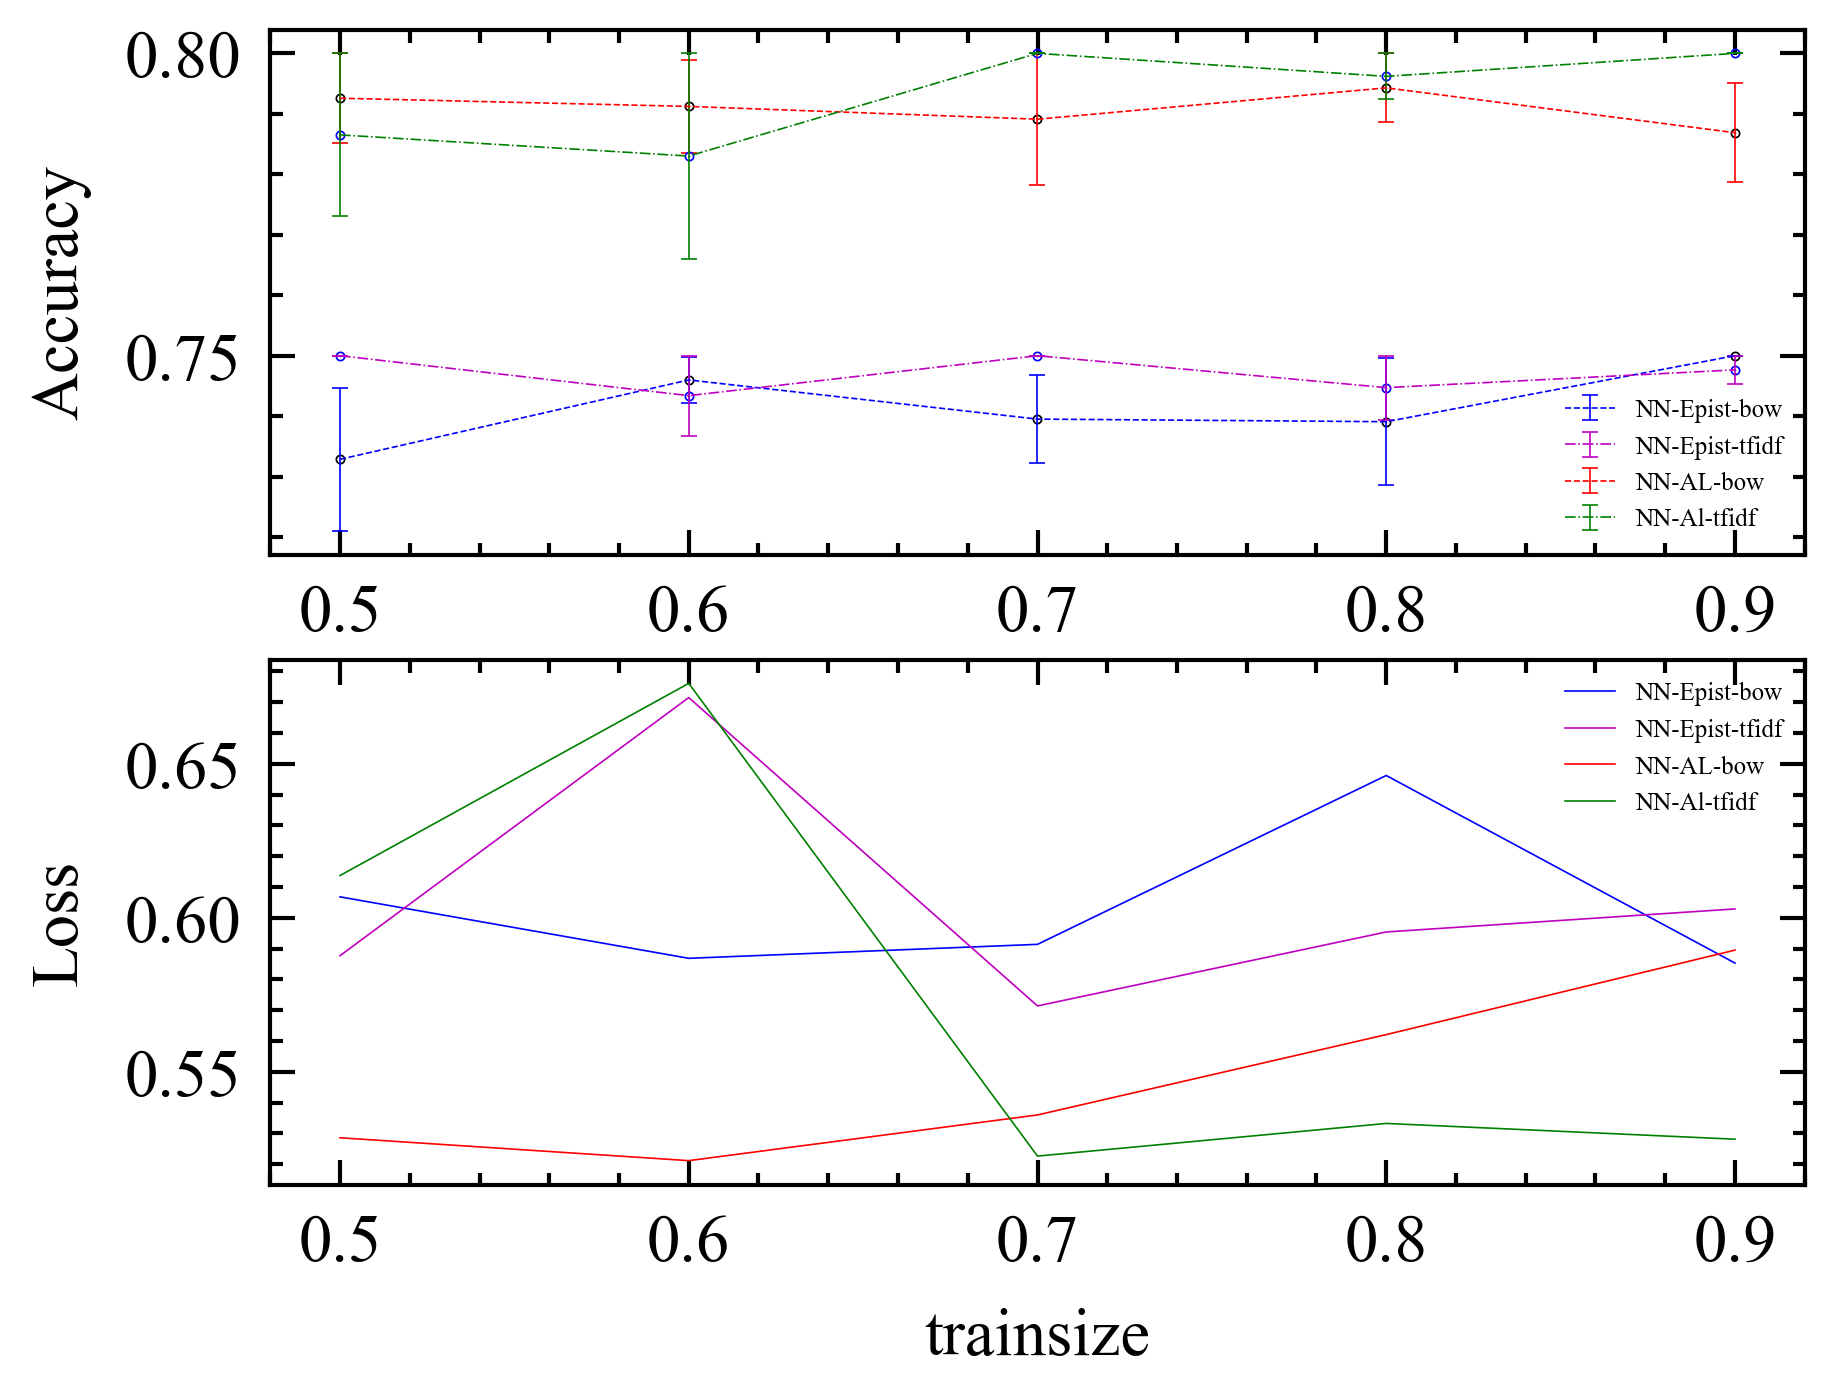

In [58]:
x = np.linspace(1,20,20)
plt.subplot(2,1,1)

plt.plot(train_sizes, df_unpic_opt_bow_rl['accuracy'],'o',  markersize = 0.2)
plt.errorbar(train_sizes, df_unpic_opt_bow_rl['accuracy'], yerr= df_unpic_opt_bow_rl['sem'] , linewidth = 0.2, capsize = 1, capthick=0.2, c = 'b', label = 'NN-Epist-bow')

plt.plot(train_sizes, df_unpic_opt_tf_rl['accuracy'], 'o', markersize = 0.2)
plt.errorbar(train_sizes, df_unpic_opt_tf_rl['accuracy'], yerr= df_unpic_opt_tf_rl['sem'] , linewidth = 0.2, capsize = 1, capthick=0.2, c = 'm', label = 'NN-Epist-tfidf')

plt.plot(train_sizes, df_unpic_opt_bow_al['accuracy'], 'o',  markersize = 0.2)
plt.errorbar(train_sizes, df_unpic_opt_bow_al['accuracy'], yerr= df_unpic_opt_bow_al['sem'] , linewidth = 0.2, capsize = 1, capthick=0.2, c= 'r', label = 'NN-AL-bow')

plt.plot(train_sizes, df_unpic_opt_tf_al['accuracy'], 'o', markersize = 0.2)
plt.errorbar(train_sizes, df_unpic_opt_tf_al['accuracy'], yerr= df_unpic_opt_tf_al['sem'] , linewidth = 0.2, capsize = 1, capthick=0.2, c = 'g', label = 'NN-Al-tfidf')



#plt.ylim(0.775, 0.801)
plt.legend( prop = {'size':3})
plt.ylabel('Accuracy')
plt.xlabel('Iterations')


plt.subplot(2,1,2)

plt.plot(train_sizes, df_unpic_opt_bow_rl['loss'],'-', label = 'NN-Epist-bow',  linewidth = 0.2, c = 'b')

plt.plot(train_sizes, df_unpic_opt_tf_rl['loss'], '-', label = 'NN-Epist-tfidf', linewidth = 0.2, c = 'm')


plt.plot(train_sizes, df_unpic_opt_bow_al['loss'], '-', label = 'NN-AL-bow',  linewidth = 0.2, c = 'r')

plt.plot(train_sizes, df_unpic_opt_tf_al['loss'], '-', label = 'NN-Al-tfidf', linewidth = 0.2, c = 'g')


#plt.ylim(0.775, 0.801)
plt.legend( prop = {'size':3})
plt.ylabel('Loss')
plt.xlabel('trainsize')